In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Visakhapatnam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3469,3472,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.32,0.39,0.71,...,1.33,3.44,1.42,12.44,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3470,3473,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.27,0.52,0.66,...,1.72,34.78,3.60,3.90,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3471,3474,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.26,0.14,0.42,...,1.00,4.50,0.49,10.60,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3472,3475,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.09,0.16,0.27,...,0.83,9.86,1.05,16.68,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3473,3476,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,7.90,0.12,0.19,...,0.49,10.44,0.81,14.28,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDVI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,6.809927,0.165418,0.642691,10.683745,153.418182,1239.952727,319.054545,10.000509,0.923091,0.924800,38.874036,1.968691,45.837018,-0.130356
std,1.037585,0.221806,0.380173,12.766050,149.612454,710.870368,207.867186,19.193245,0.772242,0.698839,45.426617,1.161285,37.485161,0.102325
min,4.850000,0.020000,0.040000,1.620000,36.000000,250.000000,59.000000,0.630000,0.120000,0.160000,2.760000,0.420000,3.900000,-0.548306
25%,5.920000,0.060000,0.365000,3.815000,88.000000,630.500000,149.000000,2.975000,0.480000,0.510000,15.260000,1.100000,18.230000,-0.105287
50%,6.610000,0.110000,0.610000,6.450000,119.000000,1068.000000,277.000000,4.970000,0.720000,0.730000,25.820000,1.840000,31.380000,-0.087824
75%,7.745000,0.180000,0.800000,11.660000,169.500000,1690.500000,441.000000,9.010000,1.030000,1.140000,41.520000,2.410000,65.640000,-0.081670
max,9.420000,2.520000,2.640000,101.770000,2037.000000,3617.000000,1156.000000,184.300000,5.580000,7.430000,354.700000,8.340000,256.880000,-0.061768


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black ', 'RED', '   Black', 'Red Sandy', 'Red', ' Red', 'Black  ',
       'Black', 'red sandy', 'red sandy\\', 'black sandy', 'blacksandy',
       'black sandy ', 'black', 'Red ', 'Black Sandy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', '   Black', 'Black  ', 'Black', 'black', 'Black '], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['RED', 'Red', ' Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'red sandy', 'red sandy\\'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['black sandy', 'blacksandy', 'black sandy', 'Black Sandy', 'black sandy '], 'Black Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Black Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 123,
 'Red Soil': 69,
 'Red Sandy Soil': 54,
 'Black Sandy Soil': 29}

<BarContainer object of 4 artists>

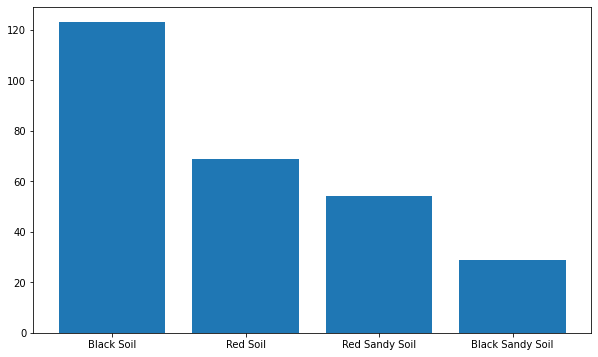

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Sugarcane ', 'Paddy/ Sugarcane', 'Paddy', 'Sugarcane',
       'suger cane ', 'paddy', 'SUGER CANE ', 'Ragi/Niger',
       'Maize/Paddy/Rajma', 'Maize/Rajma', 'Rajma/Maize',
       'Paddy/Maize/G.N', 'Maize', 'Groundnut', 'Turmeric', 'Ragi',
       'Paddy/Maize'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/ Sugarcane     81
Paddy/Maize/G.N      33
Sugarcane            24
Maize/Paddy/Rajma    20
Paddy                20
suger cane           18
Paddy/Maize          16
Ragi/Niger           15
Rajma/Maize          14
Maize/Rajma          10
SUGER CANE            8
paddy                 7
Sugarcane             5
Turmeric              1
Groundnut             1
Ragi                  1
Maize                 1
Name: Crop, dtype: int64

Paddy + SugarCane    163
Paddy + Maize         70
Maize + Rajma         24
Ragi                  16
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

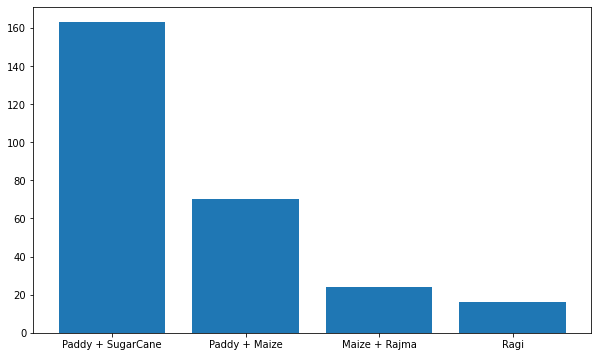

In [15]:
df['Crop'] = df['Crop'].replace(['Sugarcane ', 'Sugarcane', 'suger cane ', 'SUGER CANE '], 'SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy/ Sugarcane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy', 'paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Maize/Rajma', 'Rajma/Maize'], 'Maize + Rajma')
df['Crop'] = df['Crop'].replace(['Maize/Paddy/Rajma', 'Paddy/Maize/G.N', 'Maize', 'Paddy/Maize'], 'Paddy + Maize')
df['Crop'] = df['Crop'].replace(['Paddy + SugarCane', 'Paddy', 'SugarCane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace('Ragi/Niger', 'Ragi')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Turmeric')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
pH,1.000000,0.480688,-0.333383,0.212552,0.120609,0.635819,0.665875,0.375249,-0.112625,0.564074,-0.461003,-0.302912,-0.632308,0.209629
EC,0.480688,1.000000,-0.113811,0.189278,0.579347,0.304698,0.353923,0.905148,0.032202,0.542661,-0.160148,-0.055957,-0.275806,0.129014
OC,-0.333383,-0.113811,1.000000,-0.003450,0.216241,0.027773,-0.158163,-0.107069,0.541595,-0.030128,0.351817,0.446556,0.573010,-0.138165
P,0.212552,0.189278,-0.003450,1.000000,0.172696,0.205397,0.283987,0.143692,0.492402,0.210786,0.100140,0.104467,-0.227438,-0.263462
K,0.120609,0.579347,0.216241,0.172696,1.000000,0.062876,0.058264,0.468951,0.245236,0.173017,-0.063486,0.017689,0.071308,0.054358
Ca,0.635819,0.304698,0.027773,0.205397,0.062876,1.000000,0.806148,0.252167,0.005950,0.509460,-0.149374,0.107125,-0.313804,-0.007312
Mg,0.665875,0.353923,-0.158163,0.283987,0.058264,0.806148,1.000000,0.270701,-0.056657,0.590767,-0.130534,0.116103,-0.424087,-0.012252
S,0.375249,0.905148,-0.107069,0.143692,0.468951,0.252167,0.270701,1.000000,-0.007399,0.531710,-0.096959,0.005405,-0.218240,0.083113
Zn,-0.112625,0.032202,0.541595,0.492402,0.245236,0.005950,-0.056657,-0.007399,1.000000,-0.009086,0.416219,0.408112,0.287436,-0.256083
B,0.564074,0.542661,-0.030128,0.210786,0.173017,0.509460,0.590767,0.531710,-0.009086,1.000000,-0.149671,0.054915,-0.319448,0.179111


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'NDWI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe      NDWI  Black Sandy Soil  Black Soil  \
3469  8.32  0.39  0.71  8.15  3.44 -0.090595                 0           1   

      Red Sandy Soil  Red Soil  
3469               0         0  
3469    Paddy + SugarCane
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:6] = sc1.fit_transform(X[:, 0:6])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8695652173913043


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.79 %
Standard Deviation: 6.06 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8260869565217391


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.48 %
Standard Deviation: 6.26 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9130434782608695


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.88 %
Standard Deviation: 6.91 %


In [36]:
# pickle.dump(clf3, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8840579710144928


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 83.93 %
Standard Deviation: 7.39 %


In [42]:
# pickle.dump(clf4, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8921568627450981
Testing Accuracy:  0.8840579710144928


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.86 %
Standard Deviation: 7.99 %


# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.6867635	total: 143ms	remaining: 14.2s
1:	learn: 0.5515989	total: 144ms	remaining: 7.05s
2:	learn: 0.5159586	total: 144ms	remaining: 4.67s
3:	learn: 0.4755648	total: 145ms	remaining: 3.48s
4:	learn: 0.4379384	total: 146ms	remaining: 2.77s
5:	learn: 0.4013681	total: 146ms	remaining: 2.29s
6:	learn: 0.3857782	total: 147ms	remaining: 1.95s
7:	learn: 0.3656087	total: 147ms	remaining: 1.69s
8:	learn: 0.3404293	total: 148ms	remaining: 1.49s
9:	learn: 0.3301402	total: 148ms	remaining: 1.33s
10:	learn: 0.3138613	total: 149ms	remaining: 1.2s
11:	learn: 0.3049998	total: 150ms	remaining: 1.1s
12:	learn: 0.2839528	total: 150ms	remaining: 1s
13:	learn: 0.2735425	total: 151ms	remaining: 925ms
14:	learn: 0.2623699	total: 151ms	remaining: 857ms
15:	learn: 0.2425200	total: 152ms	remaining: 796ms
16:	learn: 0.2398599	total: 152ms	remaining: 743ms
17:	learn: 0.2348047	total: 153ms	remaining: 695ms
18:	learn: 0.2227705	total: 153ms	remaining: 652ms
19:	learn: 0.2122694	total: 154ms	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.6233934876
bestIteration = 99

Training on fold [1/5]

bestTest = 0.629464769
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5999044167
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5320920524
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5585801993
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3555613	test: 1.3595440	best: 1.3595440 (0)	total: 1.09ms	remaining: 1.09s
1:	learn: 1.3155321	test: 1.3263622	best: 1.3263622 (1)	total: 2.15ms	remaining: 1.07s
2:	learn: 1.2814529	test: 1.2998001	best: 1.2998001 (2)	total: 3.06ms	remaining: 1.02s
3:	learn: 1.2458875	test: 1.2728032	best: 1.2728032 (3)	total: 3.99ms	remaining: 995ms
4:	learn: 1.2200708	test: 1.2536234	best: 1.2536234 (4)	total: 5.13ms	remaining: 1.02s
5:	learn: 1.1931771	test: 1.2373174	best: 1.2373174 (5)	total: 6.46ms	remaining: 1.07s
6:	learn: 1.1629874	test: 1.2145104	best: 1.2145104 (6)	total: 8.05ms	remaining: 1.14s
7:	learn: 1.1371427	test: 1.1949617	best: 1.1949617 (7)	total: 9.19ms	remaining: 1.14s
8:	learn: 1.1108699	test: 1.1720621	best: 1.1720621 (8)	total: 10.2ms	remaining: 1.13s
9:	learn: 1.0884352	test: 1.1546893	best: 1.1546893 (9)	total: 11.8ms	remaining: 1.17s
10:	learn: 1.0677445	test: 1.1383640	best: 1.1383640 (10)	total: 13ms	remaining: 1.17s
11:	learn: 1.0467730	test: 1.1237566	best: 

139:	learn: 0.3056863	test: 0.6802201	best: 0.6796415 (138)	total: 152ms	remaining: 933ms
140:	learn: 0.3036844	test: 0.6795882	best: 0.6795882 (140)	total: 153ms	remaining: 933ms
141:	learn: 0.3019286	test: 0.6786535	best: 0.6786535 (141)	total: 154ms	remaining: 931ms
142:	learn: 0.3009373	test: 0.6781506	best: 0.6781506 (142)	total: 155ms	remaining: 932ms
143:	learn: 0.2991273	test: 0.6772436	best: 0.6772436 (143)	total: 157ms	remaining: 932ms
144:	learn: 0.2976280	test: 0.6761664	best: 0.6761664 (144)	total: 158ms	remaining: 931ms
145:	learn: 0.2959441	test: 0.6749484	best: 0.6749484 (145)	total: 159ms	remaining: 930ms
146:	learn: 0.2949788	test: 0.6746161	best: 0.6746161 (146)	total: 160ms	remaining: 931ms
147:	learn: 0.2930200	test: 0.6743218	best: 0.6743218 (147)	total: 162ms	remaining: 930ms
148:	learn: 0.2918558	test: 0.6737019	best: 0.6737019 (148)	total: 163ms	remaining: 929ms
149:	learn: 0.2903795	test: 0.6744697	best: 0.6737019 (148)	total: 164ms	remaining: 927ms
150:	learn

290:	learn: 0.1676469	test: 0.6355839	best: 0.6355839 (290)	total: 321ms	remaining: 782ms
291:	learn: 0.1671347	test: 0.6352796	best: 0.6352796 (291)	total: 322ms	remaining: 781ms
292:	learn: 0.1661687	test: 0.6348763	best: 0.6348763 (292)	total: 323ms	remaining: 780ms
293:	learn: 0.1656929	test: 0.6351570	best: 0.6348763 (292)	total: 324ms	remaining: 778ms
294:	learn: 0.1652643	test: 0.6346841	best: 0.6346841 (294)	total: 325ms	remaining: 777ms
295:	learn: 0.1649589	test: 0.6354781	best: 0.6346841 (294)	total: 326ms	remaining: 776ms
296:	learn: 0.1642903	test: 0.6353327	best: 0.6346841 (294)	total: 327ms	remaining: 774ms
297:	learn: 0.1639681	test: 0.6352064	best: 0.6346841 (294)	total: 328ms	remaining: 773ms
298:	learn: 0.1633782	test: 0.6352275	best: 0.6346841 (294)	total: 329ms	remaining: 772ms
299:	learn: 0.1626068	test: 0.6352236	best: 0.6346841 (294)	total: 330ms	remaining: 770ms
300:	learn: 0.1623106	test: 0.6346021	best: 0.6346021 (300)	total: 331ms	remaining: 769ms
301:	learn

457:	learn: 0.1040471	test: 0.6279007	best: 0.6257845 (426)	total: 496ms	remaining: 587ms
458:	learn: 0.1038041	test: 0.6282268	best: 0.6257845 (426)	total: 497ms	remaining: 585ms
459:	learn: 0.1034835	test: 0.6286436	best: 0.6257845 (426)	total: 498ms	remaining: 584ms
460:	learn: 0.1032334	test: 0.6288921	best: 0.6257845 (426)	total: 499ms	remaining: 583ms
461:	learn: 0.1030158	test: 0.6289608	best: 0.6257845 (426)	total: 500ms	remaining: 582ms
462:	learn: 0.1028554	test: 0.6294505	best: 0.6257845 (426)	total: 501ms	remaining: 581ms
463:	learn: 0.1025762	test: 0.6296365	best: 0.6257845 (426)	total: 502ms	remaining: 580ms
464:	learn: 0.1022798	test: 0.6298054	best: 0.6257845 (426)	total: 503ms	remaining: 579ms
465:	learn: 0.1019569	test: 0.6297936	best: 0.6257845 (426)	total: 504ms	remaining: 577ms
466:	learn: 0.1016460	test: 0.6300254	best: 0.6257845 (426)	total: 505ms	remaining: 576ms
467:	learn: 0.1014567	test: 0.6299441	best: 0.6257845 (426)	total: 506ms	remaining: 575ms
468:	learn

626:	learn: 0.0716451	test: 0.6377871	best: 0.6257845 (426)	total: 666ms	remaining: 396ms
627:	learn: 0.0715221	test: 0.6377011	best: 0.6257845 (426)	total: 668ms	remaining: 395ms
628:	learn: 0.0713238	test: 0.6380903	best: 0.6257845 (426)	total: 669ms	remaining: 394ms
629:	learn: 0.0712205	test: 0.6384132	best: 0.6257845 (426)	total: 670ms	remaining: 393ms
630:	learn: 0.0711216	test: 0.6390162	best: 0.6257845 (426)	total: 671ms	remaining: 392ms
631:	learn: 0.0710341	test: 0.6389690	best: 0.6257845 (426)	total: 672ms	remaining: 391ms
632:	learn: 0.0709458	test: 0.6389700	best: 0.6257845 (426)	total: 673ms	remaining: 390ms
633:	learn: 0.0708884	test: 0.6391016	best: 0.6257845 (426)	total: 674ms	remaining: 389ms
634:	learn: 0.0708215	test: 0.6391108	best: 0.6257845 (426)	total: 675ms	remaining: 388ms
635:	learn: 0.0706733	test: 0.6394642	best: 0.6257845 (426)	total: 676ms	remaining: 387ms
636:	learn: 0.0705010	test: 0.6394540	best: 0.6257845 (426)	total: 677ms	remaining: 386ms
637:	learn

779:	learn: 0.0553511	test: 0.6530460	best: 0.6257845 (426)	total: 838ms	remaining: 236ms
780:	learn: 0.0552098	test: 0.6527876	best: 0.6257845 (426)	total: 839ms	remaining: 235ms
781:	learn: 0.0551423	test: 0.6528579	best: 0.6257845 (426)	total: 840ms	remaining: 234ms
782:	learn: 0.0550730	test: 0.6531966	best: 0.6257845 (426)	total: 841ms	remaining: 233ms
783:	learn: 0.0550009	test: 0.6534274	best: 0.6257845 (426)	total: 843ms	remaining: 232ms
784:	learn: 0.0549615	test: 0.6536896	best: 0.6257845 (426)	total: 844ms	remaining: 231ms
785:	learn: 0.0549005	test: 0.6537060	best: 0.6257845 (426)	total: 845ms	remaining: 230ms
786:	learn: 0.0548011	test: 0.6539090	best: 0.6257845 (426)	total: 846ms	remaining: 229ms
787:	learn: 0.0547219	test: 0.6537241	best: 0.6257845 (426)	total: 847ms	remaining: 228ms
788:	learn: 0.0546614	test: 0.6539096	best: 0.6257845 (426)	total: 848ms	remaining: 227ms
789:	learn: 0.0546023	test: 0.6541195	best: 0.6257845 (426)	total: 849ms	remaining: 226ms
790:	learn

928:	learn: 0.0448178	test: 0.6679247	best: 0.6257845 (426)	total: 1.01s	remaining: 77.3ms
929:	learn: 0.0447597	test: 0.6681374	best: 0.6257845 (426)	total: 1.01s	remaining: 76.2ms
930:	learn: 0.0446977	test: 0.6681548	best: 0.6257845 (426)	total: 1.01s	remaining: 75.1ms
931:	learn: 0.0446254	test: 0.6684497	best: 0.6257845 (426)	total: 1.01s	remaining: 74.1ms
932:	learn: 0.0445777	test: 0.6684951	best: 0.6257845 (426)	total: 1.02s	remaining: 73ms
933:	learn: 0.0445237	test: 0.6686699	best: 0.6257845 (426)	total: 1.02s	remaining: 71.9ms
934:	learn: 0.0444757	test: 0.6686131	best: 0.6257845 (426)	total: 1.02s	remaining: 70.8ms
935:	learn: 0.0444278	test: 0.6688275	best: 0.6257845 (426)	total: 1.02s	remaining: 69.7ms
936:	learn: 0.0443719	test: 0.6687096	best: 0.6257845 (426)	total: 1.02s	remaining: 68.7ms
937:	learn: 0.0443279	test: 0.6686244	best: 0.6257845 (426)	total: 1.02s	remaining: 67.6ms
938:	learn: 0.0442536	test: 0.6688012	best: 0.6257845 (426)	total: 1.02s	remaining: 66.5ms
9

67:	learn: 0.2066963	test: 0.6962500	best: 0.6951172 (66)	total: 81.9ms	remaining: 1.12s
68:	learn: 0.2046504	test: 0.6945369	best: 0.6945369 (68)	total: 83.2ms	remaining: 1.12s
69:	learn: 0.2031119	test: 0.6934757	best: 0.6934757 (69)	total: 84.4ms	remaining: 1.12s
70:	learn: 0.1990449	test: 0.6922606	best: 0.6922606 (70)	total: 85.6ms	remaining: 1.12s
71:	learn: 0.1964993	test: 0.6907071	best: 0.6907071 (71)	total: 87ms	remaining: 1.12s
72:	learn: 0.1932111	test: 0.6872923	best: 0.6872923 (72)	total: 88.1ms	remaining: 1.12s
73:	learn: 0.1915945	test: 0.6899896	best: 0.6872923 (72)	total: 89.3ms	remaining: 1.12s
74:	learn: 0.1894686	test: 0.6928283	best: 0.6872923 (72)	total: 90.5ms	remaining: 1.11s
75:	learn: 0.1869124	test: 0.6907139	best: 0.6872923 (72)	total: 91.6ms	remaining: 1.11s
76:	learn: 0.1854527	test: 0.6908536	best: 0.6872923 (72)	total: 92.7ms	remaining: 1.11s
77:	learn: 0.1824452	test: 0.6903675	best: 0.6872923 (72)	total: 94ms	remaining: 1.11s
78:	learn: 0.1797494	test

216:	learn: 0.0611224	test: 0.6779603	best: 0.6586037 (102)	total: 254ms	remaining: 916ms
217:	learn: 0.0606147	test: 0.6773767	best: 0.6586037 (102)	total: 255ms	remaining: 916ms
218:	learn: 0.0600501	test: 0.6774110	best: 0.6586037 (102)	total: 256ms	remaining: 915ms
219:	learn: 0.0597630	test: 0.6782975	best: 0.6586037 (102)	total: 258ms	remaining: 914ms
220:	learn: 0.0596316	test: 0.6788097	best: 0.6586037 (102)	total: 259ms	remaining: 913ms
221:	learn: 0.0593108	test: 0.6804797	best: 0.6586037 (102)	total: 260ms	remaining: 912ms
222:	learn: 0.0590181	test: 0.6811109	best: 0.6586037 (102)	total: 261ms	remaining: 911ms
223:	learn: 0.0587815	test: 0.6802555	best: 0.6586037 (102)	total: 263ms	remaining: 909ms
224:	learn: 0.0584990	test: 0.6810103	best: 0.6586037 (102)	total: 264ms	remaining: 908ms
225:	learn: 0.0583485	test: 0.6803174	best: 0.6586037 (102)	total: 265ms	remaining: 907ms
226:	learn: 0.0581173	test: 0.6809919	best: 0.6586037 (102)	total: 266ms	remaining: 906ms
227:	learn

360:	learn: 0.0318452	test: 0.7176271	best: 0.6586037 (102)	total: 428ms	remaining: 757ms
361:	learn: 0.0317244	test: 0.7176721	best: 0.6586037 (102)	total: 429ms	remaining: 756ms
362:	learn: 0.0316144	test: 0.7183362	best: 0.6586037 (102)	total: 431ms	remaining: 756ms
363:	learn: 0.0315430	test: 0.7183751	best: 0.6586037 (102)	total: 432ms	remaining: 754ms
364:	learn: 0.0314331	test: 0.7185026	best: 0.6586037 (102)	total: 433ms	remaining: 753ms
365:	learn: 0.0312566	test: 0.7190267	best: 0.6586037 (102)	total: 434ms	remaining: 752ms
366:	learn: 0.0311436	test: 0.7195301	best: 0.6586037 (102)	total: 435ms	remaining: 751ms
367:	learn: 0.0310982	test: 0.7198673	best: 0.6586037 (102)	total: 437ms	remaining: 750ms
368:	learn: 0.0309672	test: 0.7198696	best: 0.6586037 (102)	total: 438ms	remaining: 749ms
369:	learn: 0.0308530	test: 0.7199238	best: 0.6586037 (102)	total: 439ms	remaining: 748ms
370:	learn: 0.0307495	test: 0.7203156	best: 0.6586037 (102)	total: 440ms	remaining: 747ms
371:	learn

503:	learn: 0.0211174	test: 0.7550410	best: 0.6586037 (102)	total: 601ms	remaining: 591ms
504:	learn: 0.0210851	test: 0.7554108	best: 0.6586037 (102)	total: 602ms	remaining: 590ms
505:	learn: 0.0210713	test: 0.7553348	best: 0.6586037 (102)	total: 603ms	remaining: 589ms
506:	learn: 0.0210159	test: 0.7555479	best: 0.6586037 (102)	total: 605ms	remaining: 588ms
507:	learn: 0.0209799	test: 0.7557815	best: 0.6586037 (102)	total: 606ms	remaining: 587ms
508:	learn: 0.0209388	test: 0.7562494	best: 0.6586037 (102)	total: 607ms	remaining: 586ms
509:	learn: 0.0208544	test: 0.7565163	best: 0.6586037 (102)	total: 608ms	remaining: 584ms
510:	learn: 0.0207934	test: 0.7571954	best: 0.6586037 (102)	total: 609ms	remaining: 583ms
511:	learn: 0.0207047	test: 0.7575672	best: 0.6586037 (102)	total: 611ms	remaining: 582ms
512:	learn: 0.0206590	test: 0.7579833	best: 0.6586037 (102)	total: 612ms	remaining: 581ms
513:	learn: 0.0206223	test: 0.7580600	best: 0.6586037 (102)	total: 613ms	remaining: 580ms
514:	learn

645:	learn: 0.0156322	test: 0.7835438	best: 0.6586037 (102)	total: 772ms	remaining: 423ms
646:	learn: 0.0156064	test: 0.7839290	best: 0.6586037 (102)	total: 773ms	remaining: 422ms
647:	learn: 0.0155886	test: 0.7836955	best: 0.6586037 (102)	total: 775ms	remaining: 421ms
648:	learn: 0.0155700	test: 0.7838797	best: 0.6586037 (102)	total: 776ms	remaining: 420ms
649:	learn: 0.0155275	test: 0.7840074	best: 0.6586037 (102)	total: 777ms	remaining: 418ms
650:	learn: 0.0154998	test: 0.7842258	best: 0.6586037 (102)	total: 778ms	remaining: 417ms
651:	learn: 0.0154831	test: 0.7845995	best: 0.6586037 (102)	total: 779ms	remaining: 416ms
652:	learn: 0.0154543	test: 0.7844526	best: 0.6586037 (102)	total: 781ms	remaining: 415ms
653:	learn: 0.0154251	test: 0.7843564	best: 0.6586037 (102)	total: 782ms	remaining: 414ms
654:	learn: 0.0154083	test: 0.7843593	best: 0.6586037 (102)	total: 783ms	remaining: 412ms
655:	learn: 0.0153870	test: 0.7844767	best: 0.6586037 (102)	total: 784ms	remaining: 411ms
656:	learn

782:	learn: 0.0124116	test: 0.8045246	best: 0.6586037 (102)	total: 944ms	remaining: 262ms
783:	learn: 0.0123965	test: 0.8046554	best: 0.6586037 (102)	total: 945ms	remaining: 260ms
784:	learn: 0.0123798	test: 0.8047573	best: 0.6586037 (102)	total: 946ms	remaining: 259ms
785:	learn: 0.0123612	test: 0.8046788	best: 0.6586037 (102)	total: 947ms	remaining: 258ms
786:	learn: 0.0123395	test: 0.8049804	best: 0.6586037 (102)	total: 949ms	remaining: 257ms
787:	learn: 0.0123191	test: 0.8055220	best: 0.6586037 (102)	total: 950ms	remaining: 256ms
788:	learn: 0.0123047	test: 0.8060414	best: 0.6586037 (102)	total: 951ms	remaining: 254ms
789:	learn: 0.0122800	test: 0.8059815	best: 0.6586037 (102)	total: 953ms	remaining: 253ms
790:	learn: 0.0122539	test: 0.8061703	best: 0.6586037 (102)	total: 954ms	remaining: 252ms
791:	learn: 0.0122418	test: 0.8060569	best: 0.6586037 (102)	total: 955ms	remaining: 251ms
792:	learn: 0.0122278	test: 0.8058964	best: 0.6586037 (102)	total: 956ms	remaining: 250ms
793:	learn

924:	learn: 0.0102009	test: 0.8226224	best: 0.6586037 (102)	total: 1.11s	remaining: 90.4ms
925:	learn: 0.0101893	test: 0.8225568	best: 0.6586037 (102)	total: 1.12s	remaining: 89.2ms
926:	learn: 0.0101805	test: 0.8224158	best: 0.6586037 (102)	total: 1.12s	remaining: 88ms
927:	learn: 0.0101616	test: 0.8227212	best: 0.6586037 (102)	total: 1.12s	remaining: 86.8ms
928:	learn: 0.0101555	test: 0.8229784	best: 0.6586037 (102)	total: 1.12s	remaining: 85.6ms
929:	learn: 0.0101468	test: 0.8230425	best: 0.6586037 (102)	total: 1.12s	remaining: 84.4ms
930:	learn: 0.0101337	test: 0.8232845	best: 0.6586037 (102)	total: 1.12s	remaining: 83.2ms
931:	learn: 0.0101156	test: 0.8235222	best: 0.6586037 (102)	total: 1.12s	remaining: 82ms
932:	learn: 0.0101028	test: 0.8236518	best: 0.6586037 (102)	total: 1.12s	remaining: 80.8ms
933:	learn: 0.0100947	test: 0.8238891	best: 0.6586037 (102)	total: 1.13s	remaining: 79.6ms
934:	learn: 0.0100809	test: 0.8242269	best: 0.6586037 (102)	total: 1.13s	remaining: 78.3ms
935

23:	learn: 0.8687897	test: 1.0034466	best: 1.0034466 (23)	total: 79.8ms	remaining: 3.25s
24:	learn: 0.8569142	test: 0.9940170	best: 0.9940170 (24)	total: 83.2ms	remaining: 3.25s
25:	learn: 0.8456208	test: 0.9856421	best: 0.9856421 (25)	total: 86.4ms	remaining: 3.24s
26:	learn: 0.8323462	test: 0.9765821	best: 0.9765821 (26)	total: 89.6ms	remaining: 3.23s
27:	learn: 0.8203573	test: 0.9691524	best: 0.9691524 (27)	total: 93ms	remaining: 3.23s
28:	learn: 0.8082297	test: 0.9619358	best: 0.9619358 (28)	total: 96.2ms	remaining: 3.22s
29:	learn: 0.7984801	test: 0.9550225	best: 0.9550225 (29)	total: 99.6ms	remaining: 3.22s
30:	learn: 0.7858063	test: 0.9459244	best: 0.9459244 (30)	total: 103ms	remaining: 3.22s
31:	learn: 0.7757655	test: 0.9391757	best: 0.9391757 (31)	total: 106ms	remaining: 3.22s
32:	learn: 0.7642676	test: 0.9310947	best: 0.9310947 (32)	total: 110ms	remaining: 3.21s
33:	learn: 0.7541293	test: 0.9238571	best: 0.9238571 (33)	total: 113ms	remaining: 3.21s
34:	learn: 0.7457992	test: 

132:	learn: 0.2988716	test: 0.6637649	best: 0.6637649 (132)	total: 436ms	remaining: 2.84s
133:	learn: 0.2970515	test: 0.6627348	best: 0.6627348 (133)	total: 439ms	remaining: 2.84s
134:	learn: 0.2953665	test: 0.6619683	best: 0.6619683 (134)	total: 442ms	remaining: 2.83s
135:	learn: 0.2931763	test: 0.6618541	best: 0.6618541 (135)	total: 445ms	remaining: 2.83s
136:	learn: 0.2910170	test: 0.6601910	best: 0.6601910 (136)	total: 448ms	remaining: 2.82s
137:	learn: 0.2890768	test: 0.6601010	best: 0.6601010 (137)	total: 451ms	remaining: 2.81s
138:	learn: 0.2871326	test: 0.6597601	best: 0.6597601 (138)	total: 454ms	remaining: 2.81s
139:	learn: 0.2853329	test: 0.6599961	best: 0.6597601 (138)	total: 457ms	remaining: 2.8s
140:	learn: 0.2834321	test: 0.6593373	best: 0.6593373 (140)	total: 460ms	remaining: 2.8s
141:	learn: 0.2822859	test: 0.6590361	best: 0.6590361 (141)	total: 463ms	remaining: 2.79s
142:	learn: 0.2797931	test: 0.6583453	best: 0.6583453 (142)	total: 465ms	remaining: 2.79s
143:	learn: 

250:	learn: 0.1560885	test: 0.6265657	best: 0.6258085 (247)	total: 793ms	remaining: 2.37s
251:	learn: 0.1554308	test: 0.6267123	best: 0.6258085 (247)	total: 796ms	remaining: 2.36s
252:	learn: 0.1548458	test: 0.6264902	best: 0.6258085 (247)	total: 799ms	remaining: 2.36s
253:	learn: 0.1540796	test: 0.6262184	best: 0.6258085 (247)	total: 802ms	remaining: 2.35s
254:	learn: 0.1533509	test: 0.6261601	best: 0.6258085 (247)	total: 805ms	remaining: 2.35s
255:	learn: 0.1525525	test: 0.6266097	best: 0.6258085 (247)	total: 808ms	remaining: 2.35s
256:	learn: 0.1518030	test: 0.6259589	best: 0.6258085 (247)	total: 810ms	remaining: 2.34s
257:	learn: 0.1511794	test: 0.6261688	best: 0.6258085 (247)	total: 813ms	remaining: 2.34s
258:	learn: 0.1504609	test: 0.6262359	best: 0.6258085 (247)	total: 816ms	remaining: 2.33s
259:	learn: 0.1496657	test: 0.6260006	best: 0.6258085 (247)	total: 819ms	remaining: 2.33s
260:	learn: 0.1491953	test: 0.6259044	best: 0.6258085 (247)	total: 822ms	remaining: 2.33s
261:	learn

367:	learn: 0.0984601	test: 0.6307300	best: 0.6255726 (261)	total: 1.15s	remaining: 1.97s
368:	learn: 0.0981580	test: 0.6309033	best: 0.6255726 (261)	total: 1.15s	remaining: 1.97s
369:	learn: 0.0978937	test: 0.6308235	best: 0.6255726 (261)	total: 1.15s	remaining: 1.96s
370:	learn: 0.0975458	test: 0.6308898	best: 0.6255726 (261)	total: 1.16s	remaining: 1.96s
371:	learn: 0.0971684	test: 0.6304310	best: 0.6255726 (261)	total: 1.16s	remaining: 1.96s
372:	learn: 0.0966744	test: 0.6304943	best: 0.6255726 (261)	total: 1.16s	remaining: 1.95s
373:	learn: 0.0963432	test: 0.6308648	best: 0.6255726 (261)	total: 1.17s	remaining: 1.95s
374:	learn: 0.0959688	test: 0.6307802	best: 0.6255726 (261)	total: 1.17s	remaining: 1.95s
375:	learn: 0.0956670	test: 0.6310136	best: 0.6255726 (261)	total: 1.17s	remaining: 1.94s
376:	learn: 0.0954084	test: 0.6312716	best: 0.6255726 (261)	total: 1.17s	remaining: 1.94s
377:	learn: 0.0950987	test: 0.6313044	best: 0.6255726 (261)	total: 1.18s	remaining: 1.94s
378:	learn

474:	learn: 0.0712449	test: 0.6341856	best: 0.6255726 (261)	total: 1.5s	remaining: 1.66s
475:	learn: 0.0710636	test: 0.6344756	best: 0.6255726 (261)	total: 1.5s	remaining: 1.66s
476:	learn: 0.0708637	test: 0.6345536	best: 0.6255726 (261)	total: 1.51s	remaining: 1.65s
477:	learn: 0.0706605	test: 0.6344304	best: 0.6255726 (261)	total: 1.51s	remaining: 1.65s
478:	learn: 0.0704441	test: 0.6346735	best: 0.6255726 (261)	total: 1.51s	remaining: 1.65s
479:	learn: 0.0702713	test: 0.6347498	best: 0.6255726 (261)	total: 1.52s	remaining: 1.64s
480:	learn: 0.0700573	test: 0.6344744	best: 0.6255726 (261)	total: 1.52s	remaining: 1.64s
481:	learn: 0.0698842	test: 0.6348634	best: 0.6255726 (261)	total: 1.52s	remaining: 1.64s
482:	learn: 0.0696836	test: 0.6349306	best: 0.6255726 (261)	total: 1.52s	remaining: 1.63s
483:	learn: 0.0695047	test: 0.6349776	best: 0.6255726 (261)	total: 1.53s	remaining: 1.63s
484:	learn: 0.0693665	test: 0.6350129	best: 0.6255726 (261)	total: 1.53s	remaining: 1.63s
485:	learn: 

599:	learn: 0.0528057	test: 0.6434674	best: 0.6255726 (261)	total: 1.86s	remaining: 1.24s
600:	learn: 0.0526996	test: 0.6433982	best: 0.6255726 (261)	total: 1.86s	remaining: 1.24s
601:	learn: 0.0525712	test: 0.6433618	best: 0.6255726 (261)	total: 1.87s	remaining: 1.24s
602:	learn: 0.0524358	test: 0.6435202	best: 0.6255726 (261)	total: 1.87s	remaining: 1.23s
603:	learn: 0.0522992	test: 0.6433510	best: 0.6255726 (261)	total: 1.87s	remaining: 1.23s
604:	learn: 0.0521763	test: 0.6435571	best: 0.6255726 (261)	total: 1.88s	remaining: 1.23s
605:	learn: 0.0520707	test: 0.6436929	best: 0.6255726 (261)	total: 1.88s	remaining: 1.22s
606:	learn: 0.0519033	test: 0.6435995	best: 0.6255726 (261)	total: 1.88s	remaining: 1.22s
607:	learn: 0.0518189	test: 0.6436864	best: 0.6255726 (261)	total: 1.89s	remaining: 1.22s
608:	learn: 0.0517213	test: 0.6436496	best: 0.6255726 (261)	total: 1.89s	remaining: 1.21s
609:	learn: 0.0515883	test: 0.6436790	best: 0.6255726 (261)	total: 1.89s	remaining: 1.21s
610:	learn

714:	learn: 0.0421770	test: 0.6528325	best: 0.6255726 (261)	total: 2.22s	remaining: 884ms
715:	learn: 0.0421024	test: 0.6528872	best: 0.6255726 (261)	total: 2.22s	remaining: 881ms
716:	learn: 0.0419893	test: 0.6528569	best: 0.6255726 (261)	total: 2.22s	remaining: 878ms
717:	learn: 0.0419327	test: 0.6528856	best: 0.6255726 (261)	total: 2.23s	remaining: 875ms
718:	learn: 0.0418466	test: 0.6529214	best: 0.6255726 (261)	total: 2.23s	remaining: 872ms
719:	learn: 0.0417708	test: 0.6531795	best: 0.6255726 (261)	total: 2.23s	remaining: 869ms
720:	learn: 0.0416928	test: 0.6534315	best: 0.6255726 (261)	total: 2.24s	remaining: 865ms
721:	learn: 0.0416176	test: 0.6535089	best: 0.6255726 (261)	total: 2.24s	remaining: 862ms
722:	learn: 0.0415312	test: 0.6534585	best: 0.6255726 (261)	total: 2.24s	remaining: 859ms
723:	learn: 0.0414540	test: 0.6537281	best: 0.6255726 (261)	total: 2.24s	remaining: 856ms
724:	learn: 0.0413468	test: 0.6538241	best: 0.6255726 (261)	total: 2.25s	remaining: 853ms
725:	learn

832:	learn: 0.0345052	test: 0.6604117	best: 0.6255726 (261)	total: 2.57s	remaining: 516ms
833:	learn: 0.0344463	test: 0.6605165	best: 0.6255726 (261)	total: 2.57s	remaining: 513ms
834:	learn: 0.0343994	test: 0.6606374	best: 0.6255726 (261)	total: 2.58s	remaining: 509ms
835:	learn: 0.0343544	test: 0.6605689	best: 0.6255726 (261)	total: 2.58s	remaining: 506ms
836:	learn: 0.0343083	test: 0.6607819	best: 0.6255726 (261)	total: 2.58s	remaining: 503ms
837:	learn: 0.0342619	test: 0.6609253	best: 0.6255726 (261)	total: 2.59s	remaining: 500ms
838:	learn: 0.0342002	test: 0.6610195	best: 0.6255726 (261)	total: 2.59s	remaining: 497ms
839:	learn: 0.0341432	test: 0.6609331	best: 0.6255726 (261)	total: 2.59s	remaining: 494ms
840:	learn: 0.0340990	test: 0.6609233	best: 0.6255726 (261)	total: 2.59s	remaining: 490ms
841:	learn: 0.0340387	test: 0.6611808	best: 0.6255726 (261)	total: 2.6s	remaining: 487ms
842:	learn: 0.0339844	test: 0.6610359	best: 0.6255726 (261)	total: 2.6s	remaining: 484ms
843:	learn: 

953:	learn: 0.0291135	test: 0.6692034	best: 0.6255726 (261)	total: 2.92s	remaining: 141ms
954:	learn: 0.0290751	test: 0.6692353	best: 0.6255726 (261)	total: 2.93s	remaining: 138ms
955:	learn: 0.0290364	test: 0.6691189	best: 0.6255726 (261)	total: 2.93s	remaining: 135ms
956:	learn: 0.0290057	test: 0.6691850	best: 0.6255726 (261)	total: 2.93s	remaining: 132ms
957:	learn: 0.0289781	test: 0.6691876	best: 0.6255726 (261)	total: 2.94s	remaining: 129ms
958:	learn: 0.0289399	test: 0.6692609	best: 0.6255726 (261)	total: 2.94s	remaining: 126ms
959:	learn: 0.0288943	test: 0.6691887	best: 0.6255726 (261)	total: 2.94s	remaining: 123ms
960:	learn: 0.0288635	test: 0.6693270	best: 0.6255726 (261)	total: 2.95s	remaining: 120ms
961:	learn: 0.0288255	test: 0.6692852	best: 0.6255726 (261)	total: 2.95s	remaining: 116ms
962:	learn: 0.0287849	test: 0.6693719	best: 0.6255726 (261)	total: 2.95s	remaining: 113ms
963:	learn: 0.0287478	test: 0.6695445	best: 0.6255726 (261)	total: 2.96s	remaining: 110ms
964:	learn

71:	learn: 0.1610423	test: 0.6448655	best: 0.6432134 (70)	total: 216ms	remaining: 2.78s
72:	learn: 0.1582933	test: 0.6454349	best: 0.6432134 (70)	total: 219ms	remaining: 2.78s
73:	learn: 0.1557251	test: 0.6463059	best: 0.6432134 (70)	total: 222ms	remaining: 2.77s
74:	learn: 0.1533878	test: 0.6457127	best: 0.6432134 (70)	total: 225ms	remaining: 2.77s
75:	learn: 0.1516585	test: 0.6466637	best: 0.6432134 (70)	total: 227ms	remaining: 2.76s
76:	learn: 0.1487248	test: 0.6441635	best: 0.6432134 (70)	total: 230ms	remaining: 2.76s
77:	learn: 0.1461169	test: 0.6454736	best: 0.6432134 (70)	total: 233ms	remaining: 2.75s
78:	learn: 0.1439249	test: 0.6451904	best: 0.6432134 (70)	total: 236ms	remaining: 2.75s
79:	learn: 0.1419667	test: 0.6467851	best: 0.6432134 (70)	total: 239ms	remaining: 2.74s
80:	learn: 0.1391938	test: 0.6471710	best: 0.6432134 (70)	total: 242ms	remaining: 2.75s
81:	learn: 0.1369685	test: 0.6451518	best: 0.6432134 (70)	total: 246ms	remaining: 2.75s
82:	learn: 0.1353148	test: 0.644

191:	learn: 0.0475101	test: 0.6611694	best: 0.6360091 (100)	total: 569ms	remaining: 2.39s
192:	learn: 0.0472304	test: 0.6612587	best: 0.6360091 (100)	total: 572ms	remaining: 2.39s
193:	learn: 0.0468936	test: 0.6612459	best: 0.6360091 (100)	total: 575ms	remaining: 2.39s
194:	learn: 0.0466278	test: 0.6611364	best: 0.6360091 (100)	total: 577ms	remaining: 2.38s
195:	learn: 0.0463009	test: 0.6607432	best: 0.6360091 (100)	total: 580ms	remaining: 2.38s
196:	learn: 0.0460098	test: 0.6616330	best: 0.6360091 (100)	total: 583ms	remaining: 2.38s
197:	learn: 0.0457158	test: 0.6622330	best: 0.6360091 (100)	total: 586ms	remaining: 2.37s
198:	learn: 0.0454722	test: 0.6621624	best: 0.6360091 (100)	total: 588ms	remaining: 2.37s
199:	learn: 0.0451955	test: 0.6614590	best: 0.6360091 (100)	total: 591ms	remaining: 2.36s
200:	learn: 0.0449348	test: 0.6618466	best: 0.6360091 (100)	total: 594ms	remaining: 2.36s
201:	learn: 0.0446729	test: 0.6618823	best: 0.6360091 (100)	total: 596ms	remaining: 2.36s
202:	learn

310:	learn: 0.0261760	test: 0.6807899	best: 0.6360091 (100)	total: 926ms	remaining: 2.05s
311:	learn: 0.0260483	test: 0.6807364	best: 0.6360091 (100)	total: 929ms	remaining: 2.05s
312:	learn: 0.0259642	test: 0.6803985	best: 0.6360091 (100)	total: 932ms	remaining: 2.04s
313:	learn: 0.0258579	test: 0.6806620	best: 0.6360091 (100)	total: 934ms	remaining: 2.04s
314:	learn: 0.0257404	test: 0.6812780	best: 0.6360091 (100)	total: 937ms	remaining: 2.04s
315:	learn: 0.0255999	test: 0.6816679	best: 0.6360091 (100)	total: 941ms	remaining: 2.04s
316:	learn: 0.0254813	test: 0.6819184	best: 0.6360091 (100)	total: 944ms	remaining: 2.03s
317:	learn: 0.0253881	test: 0.6817598	best: 0.6360091 (100)	total: 946ms	remaining: 2.03s
318:	learn: 0.0253222	test: 0.6817677	best: 0.6360091 (100)	total: 949ms	remaining: 2.03s
319:	learn: 0.0252196	test: 0.6818750	best: 0.6360091 (100)	total: 952ms	remaining: 2.02s
320:	learn: 0.0251351	test: 0.6818213	best: 0.6360091 (100)	total: 955ms	remaining: 2.02s
321:	learn

439:	learn: 0.0171906	test: 0.7022071	best: 0.6360091 (100)	total: 1.29s	remaining: 1.64s
440:	learn: 0.0171439	test: 0.7020279	best: 0.6360091 (100)	total: 1.29s	remaining: 1.64s
441:	learn: 0.0170897	test: 0.7020362	best: 0.6360091 (100)	total: 1.3s	remaining: 1.64s
442:	learn: 0.0170495	test: 0.7022296	best: 0.6360091 (100)	total: 1.3s	remaining: 1.64s
443:	learn: 0.0170022	test: 0.7022700	best: 0.6360091 (100)	total: 1.3s	remaining: 1.63s
444:	learn: 0.0169605	test: 0.7021273	best: 0.6360091 (100)	total: 1.31s	remaining: 1.63s
445:	learn: 0.0169242	test: 0.7024747	best: 0.6360091 (100)	total: 1.31s	remaining: 1.63s
446:	learn: 0.0168866	test: 0.7026873	best: 0.6360091 (100)	total: 1.31s	remaining: 1.62s
447:	learn: 0.0168429	test: 0.7027809	best: 0.6360091 (100)	total: 1.31s	remaining: 1.62s
448:	learn: 0.0168032	test: 0.7028058	best: 0.6360091 (100)	total: 1.32s	remaining: 1.61s
449:	learn: 0.0167537	test: 0.7031357	best: 0.6360091 (100)	total: 1.32s	remaining: 1.61s
450:	learn: 0

566:	learn: 0.0126185	test: 0.7175367	best: 0.6360091 (100)	total: 1.64s	remaining: 1.25s
567:	learn: 0.0125863	test: 0.7174336	best: 0.6360091 (100)	total: 1.65s	remaining: 1.25s
568:	learn: 0.0125692	test: 0.7176157	best: 0.6360091 (100)	total: 1.65s	remaining: 1.25s
569:	learn: 0.0125424	test: 0.7175011	best: 0.6360091 (100)	total: 1.65s	remaining: 1.25s
570:	learn: 0.0125179	test: 0.7177391	best: 0.6360091 (100)	total: 1.66s	remaining: 1.24s
571:	learn: 0.0124928	test: 0.7178010	best: 0.6360091 (100)	total: 1.66s	remaining: 1.24s
572:	learn: 0.0124676	test: 0.7179103	best: 0.6360091 (100)	total: 1.66s	remaining: 1.24s
573:	learn: 0.0124426	test: 0.7179679	best: 0.6360091 (100)	total: 1.66s	remaining: 1.24s
574:	learn: 0.0124046	test: 0.7181513	best: 0.6360091 (100)	total: 1.67s	remaining: 1.23s
575:	learn: 0.0123755	test: 0.7183977	best: 0.6360091 (100)	total: 1.67s	remaining: 1.23s
576:	learn: 0.0123484	test: 0.7187052	best: 0.6360091 (100)	total: 1.67s	remaining: 1.23s
577:	learn

694:	learn: 0.0099051	test: 0.7334931	best: 0.6360091 (100)	total: 2s	remaining: 877ms
695:	learn: 0.0098875	test: 0.7334828	best: 0.6360091 (100)	total: 2s	remaining: 874ms
696:	learn: 0.0098746	test: 0.7333983	best: 0.6360091 (100)	total: 2s	remaining: 871ms
697:	learn: 0.0098611	test: 0.7336071	best: 0.6360091 (100)	total: 2.01s	remaining: 869ms
698:	learn: 0.0098461	test: 0.7337077	best: 0.6360091 (100)	total: 2.01s	remaining: 866ms
699:	learn: 0.0098375	test: 0.7336686	best: 0.6360091 (100)	total: 2.01s	remaining: 863ms
700:	learn: 0.0098266	test: 0.7338604	best: 0.6360091 (100)	total: 2.02s	remaining: 860ms
701:	learn: 0.0098053	test: 0.7338485	best: 0.6360091 (100)	total: 2.02s	remaining: 857ms
702:	learn: 0.0097726	test: 0.7340745	best: 0.6360091 (100)	total: 2.02s	remaining: 854ms
703:	learn: 0.0097567	test: 0.7341156	best: 0.6360091 (100)	total: 2.02s	remaining: 851ms
704:	learn: 0.0097406	test: 0.7341359	best: 0.6360091 (100)	total: 2.03s	remaining: 848ms
705:	learn: 0.00972

820:	learn: 0.0081395	test: 0.7442338	best: 0.6360091 (100)	total: 2.36s	remaining: 515ms
821:	learn: 0.0081296	test: 0.7442145	best: 0.6360091 (100)	total: 2.36s	remaining: 512ms
822:	learn: 0.0081182	test: 0.7441742	best: 0.6360091 (100)	total: 2.37s	remaining: 509ms
823:	learn: 0.0081092	test: 0.7442354	best: 0.6360091 (100)	total: 2.37s	remaining: 507ms
824:	learn: 0.0080970	test: 0.7443566	best: 0.6360091 (100)	total: 2.38s	remaining: 504ms
825:	learn: 0.0080832	test: 0.7443956	best: 0.6360091 (100)	total: 2.38s	remaining: 501ms
826:	learn: 0.0080735	test: 0.7445728	best: 0.6360091 (100)	total: 2.38s	remaining: 498ms
827:	learn: 0.0080619	test: 0.7447195	best: 0.6360091 (100)	total: 2.38s	remaining: 495ms
828:	learn: 0.0080481	test: 0.7448756	best: 0.6360091 (100)	total: 2.39s	remaining: 493ms
829:	learn: 0.0080380	test: 0.7449132	best: 0.6360091 (100)	total: 2.39s	remaining: 490ms
830:	learn: 0.0080303	test: 0.7452160	best: 0.6360091 (100)	total: 2.4s	remaining: 487ms
831:	learn:

934:	learn: 0.0070340	test: 0.7530819	best: 0.6360091 (100)	total: 2.71s	remaining: 189ms
935:	learn: 0.0070265	test: 0.7529886	best: 0.6360091 (100)	total: 2.72s	remaining: 186ms
936:	learn: 0.0070186	test: 0.7530474	best: 0.6360091 (100)	total: 2.72s	remaining: 183ms
937:	learn: 0.0070090	test: 0.7531372	best: 0.6360091 (100)	total: 2.72s	remaining: 180ms
938:	learn: 0.0070012	test: 0.7531777	best: 0.6360091 (100)	total: 2.72s	remaining: 177ms
939:	learn: 0.0069889	test: 0.7533359	best: 0.6360091 (100)	total: 2.73s	remaining: 174ms
940:	learn: 0.0069790	test: 0.7533114	best: 0.6360091 (100)	total: 2.73s	remaining: 171ms
941:	learn: 0.0069705	test: 0.7533847	best: 0.6360091 (100)	total: 2.73s	remaining: 168ms
942:	learn: 0.0069656	test: 0.7535569	best: 0.6360091 (100)	total: 2.74s	remaining: 165ms
943:	learn: 0.0069601	test: 0.7536830	best: 0.6360091 (100)	total: 2.74s	remaining: 163ms
944:	learn: 0.0069484	test: 0.7537239	best: 0.6360091 (100)	total: 2.74s	remaining: 160ms
945:	learn

28:	learn: 0.9109691	test: 1.0567599	best: 1.0567599 (28)	total: 1.68s	remaining: 56.3s
29:	learn: 0.9014509	test: 1.0508692	best: 1.0508692 (29)	total: 1.73s	remaining: 55.9s
30:	learn: 0.8916378	test: 1.0439815	best: 1.0439815 (30)	total: 1.78s	remaining: 55.5s
31:	learn: 0.8825174	test: 1.0381804	best: 1.0381804 (31)	total: 1.82s	remaining: 55.2s
32:	learn: 0.8719784	test: 1.0313416	best: 1.0313416 (32)	total: 1.87s	remaining: 54.8s
33:	learn: 0.8615861	test: 1.0238091	best: 1.0238091 (33)	total: 1.9s	remaining: 53.9s
34:	learn: 0.8507430	test: 1.0159163	best: 1.0159163 (34)	total: 1.94s	remaining: 53.5s
35:	learn: 0.8429016	test: 1.0112437	best: 1.0112437 (35)	total: 1.99s	remaining: 53.2s
36:	learn: 0.8324635	test: 1.0048199	best: 1.0048199 (36)	total: 2.03s	remaining: 52.9s
37:	learn: 0.8228776	test: 0.9992128	best: 0.9992128 (37)	total: 2.09s	remaining: 52.8s
38:	learn: 0.8109136	test: 0.9922943	best: 0.9922943 (38)	total: 2.12s	remaining: 52.1s
39:	learn: 0.8027624	test: 0.9882

122:	learn: 0.3748447	test: 0.7139364	best: 0.7139364 (122)	total: 6.26s	remaining: 44.7s
123:	learn: 0.3728161	test: 0.7123475	best: 0.7123475 (123)	total: 6.32s	remaining: 44.7s
124:	learn: 0.3699112	test: 0.7097958	best: 0.7097958 (124)	total: 6.35s	remaining: 44.5s
125:	learn: 0.3681145	test: 0.7090076	best: 0.7090076 (125)	total: 6.41s	remaining: 44.4s
126:	learn: 0.3659910	test: 0.7079396	best: 0.7079396 (126)	total: 6.46s	remaining: 44.4s
127:	learn: 0.3638221	test: 0.7065327	best: 0.7065327 (127)	total: 6.51s	remaining: 44.4s
128:	learn: 0.3618499	test: 0.7054961	best: 0.7054961 (128)	total: 6.56s	remaining: 44.3s
129:	learn: 0.3594551	test: 0.7047310	best: 0.7047310 (129)	total: 6.6s	remaining: 44.2s
130:	learn: 0.3572122	test: 0.7031169	best: 0.7031169 (130)	total: 6.65s	remaining: 44.1s
131:	learn: 0.3549135	test: 0.7025344	best: 0.7025344 (131)	total: 6.7s	remaining: 44s
132:	learn: 0.3509391	test: 0.7006835	best: 0.7006835 (132)	total: 6.7s	remaining: 43.7s
133:	learn: 0.3

218:	learn: 0.2086839	test: 0.6225310	best: 0.6225310 (218)	total: 11s	remaining: 39.2s
219:	learn: 0.2074289	test: 0.6221886	best: 0.6221886 (219)	total: 11s	remaining: 39.1s
220:	learn: 0.2065406	test: 0.6216106	best: 0.6216106 (220)	total: 11.1s	remaining: 39s
221:	learn: 0.2056319	test: 0.6213690	best: 0.6213690 (221)	total: 11.1s	remaining: 38.9s
222:	learn: 0.2042769	test: 0.6208106	best: 0.6208106 (222)	total: 11.2s	remaining: 38.9s
223:	learn: 0.2034401	test: 0.6204219	best: 0.6204219 (223)	total: 11.2s	remaining: 38.8s
224:	learn: 0.2024050	test: 0.6201184	best: 0.6201184 (224)	total: 11.2s	remaining: 38.7s
225:	learn: 0.2015071	test: 0.6194529	best: 0.6194529 (225)	total: 11.3s	remaining: 38.7s
226:	learn: 0.2002726	test: 0.6188872	best: 0.6188872 (226)	total: 11.3s	remaining: 38.6s
227:	learn: 0.1992290	test: 0.6183092	best: 0.6183092 (227)	total: 11.4s	remaining: 38.6s
228:	learn: 0.1983718	test: 0.6179119	best: 0.6179119 (228)	total: 11.4s	remaining: 38.5s
229:	learn: 0.19

312:	learn: 0.1345315	test: 0.5855447	best: 0.5855447 (312)	total: 15.5s	remaining: 34s
313:	learn: 0.1340693	test: 0.5853286	best: 0.5853286 (313)	total: 15.6s	remaining: 34s
314:	learn: 0.1336562	test: 0.5853733	best: 0.5853286 (313)	total: 15.6s	remaining: 33.9s
315:	learn: 0.1332008	test: 0.5851229	best: 0.5851229 (315)	total: 15.6s	remaining: 33.9s
316:	learn: 0.1324976	test: 0.5847323	best: 0.5847323 (316)	total: 15.7s	remaining: 33.8s
317:	learn: 0.1319223	test: 0.5846027	best: 0.5846027 (317)	total: 15.7s	remaining: 33.8s
318:	learn: 0.1314874	test: 0.5842648	best: 0.5842648 (318)	total: 15.8s	remaining: 33.7s
319:	learn: 0.1310144	test: 0.5842614	best: 0.5842614 (319)	total: 15.8s	remaining: 33.7s
320:	learn: 0.1303902	test: 0.5842137	best: 0.5842137 (320)	total: 15.9s	remaining: 33.6s
321:	learn: 0.1298194	test: 0.5840194	best: 0.5840194 (321)	total: 15.9s	remaining: 33.6s
322:	learn: 0.1293002	test: 0.5838237	best: 0.5838237 (322)	total: 16s	remaining: 33.5s
323:	learn: 0.12

408:	learn: 0.0952515	test: 0.5701668	best: 0.5701668 (408)	total: 20.1s	remaining: 29s
409:	learn: 0.0950268	test: 0.5700004	best: 0.5700004 (409)	total: 20.1s	remaining: 29s
410:	learn: 0.0946872	test: 0.5697140	best: 0.5697140 (410)	total: 20.2s	remaining: 28.9s
411:	learn: 0.0944397	test: 0.5695947	best: 0.5695947 (411)	total: 20.2s	remaining: 28.9s
412:	learn: 0.0941943	test: 0.5693901	best: 0.5693901 (412)	total: 20.3s	remaining: 28.8s
413:	learn: 0.0939612	test: 0.5692665	best: 0.5692665 (413)	total: 20.3s	remaining: 28.8s
414:	learn: 0.0936749	test: 0.5691785	best: 0.5691785 (414)	total: 20.4s	remaining: 28.7s
415:	learn: 0.0933327	test: 0.5691976	best: 0.5691785 (414)	total: 20.4s	remaining: 28.6s
416:	learn: 0.0930543	test: 0.5688986	best: 0.5688986 (416)	total: 20.4s	remaining: 28.6s
417:	learn: 0.0926962	test: 0.5688423	best: 0.5688423 (417)	total: 20.5s	remaining: 28.5s
418:	learn: 0.0924442	test: 0.5688193	best: 0.5688193 (418)	total: 20.5s	remaining: 28.5s
419:	learn: 0.

501:	learn: 0.0724440	test: 0.5621232	best: 0.5620476 (500)	total: 24.2s	remaining: 24s
502:	learn: 0.0722949	test: 0.5620557	best: 0.5620476 (500)	total: 24.3s	remaining: 24s
503:	learn: 0.0721271	test: 0.5620572	best: 0.5620476 (500)	total: 24.3s	remaining: 23.9s
504:	learn: 0.0719340	test: 0.5619036	best: 0.5619036 (504)	total: 24.4s	remaining: 23.9s
505:	learn: 0.0717700	test: 0.5618479	best: 0.5618479 (505)	total: 24.4s	remaining: 23.8s
506:	learn: 0.0715769	test: 0.5619348	best: 0.5618479 (505)	total: 24.4s	remaining: 23.8s
507:	learn: 0.0713762	test: 0.5617353	best: 0.5617353 (507)	total: 24.5s	remaining: 23.7s
508:	learn: 0.0711614	test: 0.5617199	best: 0.5617199 (508)	total: 24.5s	remaining: 23.7s
509:	learn: 0.0709866	test: 0.5618148	best: 0.5617199 (508)	total: 24.6s	remaining: 23.6s
510:	learn: 0.0707935	test: 0.5617867	best: 0.5617199 (508)	total: 24.6s	remaining: 23.6s
511:	learn: 0.0705756	test: 0.5619156	best: 0.5617199 (508)	total: 24.7s	remaining: 23.5s
512:	learn: 0.

593:	learn: 0.0584925	test: 0.5586934	best: 0.5583504 (582)	total: 28.5s	remaining: 19.5s
594:	learn: 0.0583763	test: 0.5586640	best: 0.5583504 (582)	total: 28.5s	remaining: 19.4s
595:	learn: 0.0582485	test: 0.5586231	best: 0.5583504 (582)	total: 28.6s	remaining: 19.4s
596:	learn: 0.0581037	test: 0.5585141	best: 0.5583504 (582)	total: 28.6s	remaining: 19.3s
597:	learn: 0.0579925	test: 0.5585768	best: 0.5583504 (582)	total: 28.7s	remaining: 19.3s
598:	learn: 0.0578855	test: 0.5585612	best: 0.5583504 (582)	total: 28.7s	remaining: 19.2s
599:	learn: 0.0577509	test: 0.5584676	best: 0.5583504 (582)	total: 28.8s	remaining: 19.2s
600:	learn: 0.0576291	test: 0.5585984	best: 0.5583504 (582)	total: 28.8s	remaining: 19.1s
601:	learn: 0.0575085	test: 0.5585359	best: 0.5583504 (582)	total: 28.8s	remaining: 19.1s
602:	learn: 0.0574050	test: 0.5584854	best: 0.5583504 (582)	total: 28.9s	remaining: 19s
603:	learn: 0.0572924	test: 0.5583546	best: 0.5583504 (582)	total: 28.9s	remaining: 19s
604:	learn: 0.

688:	learn: 0.0486738	test: 0.5584912	best: 0.5583237 (686)	total: 32.7s	remaining: 14.8s
689:	learn: 0.0486005	test: 0.5585077	best: 0.5583237 (686)	total: 32.8s	remaining: 14.7s
690:	learn: 0.0485077	test: 0.5585450	best: 0.5583237 (686)	total: 32.8s	remaining: 14.7s
691:	learn: 0.0484217	test: 0.5584897	best: 0.5583237 (686)	total: 32.9s	remaining: 14.6s
692:	learn: 0.0483401	test: 0.5584301	best: 0.5583237 (686)	total: 32.9s	remaining: 14.6s
693:	learn: 0.0482507	test: 0.5583472	best: 0.5583237 (686)	total: 33s	remaining: 14.5s
694:	learn: 0.0481424	test: 0.5583376	best: 0.5583237 (686)	total: 33s	remaining: 14.5s
695:	learn: 0.0480682	test: 0.5583144	best: 0.5583144 (695)	total: 33s	remaining: 14.4s
696:	learn: 0.0479866	test: 0.5583369	best: 0.5583144 (695)	total: 33.1s	remaining: 14.4s
697:	learn: 0.0479045	test: 0.5584764	best: 0.5583144 (695)	total: 33.1s	remaining: 14.3s
698:	learn: 0.0478225	test: 0.5584608	best: 0.5583144 (695)	total: 33.2s	remaining: 14.3s
699:	learn: 0.04

782:	learn: 0.0415602	test: 0.5587106	best: 0.5581463 (704)	total: 36.9s	remaining: 10.2s
783:	learn: 0.0414906	test: 0.5586736	best: 0.5581463 (704)	total: 36.9s	remaining: 10.2s
784:	learn: 0.0414300	test: 0.5586785	best: 0.5581463 (704)	total: 37s	remaining: 10.1s
785:	learn: 0.0413818	test: 0.5586604	best: 0.5581463 (704)	total: 37s	remaining: 10.1s
786:	learn: 0.0413107	test: 0.5586204	best: 0.5581463 (704)	total: 37s	remaining: 10s
787:	learn: 0.0412354	test: 0.5585311	best: 0.5581463 (704)	total: 37.1s	remaining: 9.98s
788:	learn: 0.0411727	test: 0.5584584	best: 0.5581463 (704)	total: 37.1s	remaining: 9.93s
789:	learn: 0.0411039	test: 0.5584842	best: 0.5581463 (704)	total: 37.2s	remaining: 9.88s
790:	learn: 0.0410419	test: 0.5585579	best: 0.5581463 (704)	total: 37.2s	remaining: 9.84s
791:	learn: 0.0409531	test: 0.5584680	best: 0.5581463 (704)	total: 37.3s	remaining: 9.79s
792:	learn: 0.0408879	test: 0.5584245	best: 0.5581463 (704)	total: 37.3s	remaining: 9.74s
793:	learn: 0.0408

876:	learn: 0.0363633	test: 0.5592110	best: 0.5581463 (704)	total: 41.1s	remaining: 5.76s
877:	learn: 0.0363061	test: 0.5592479	best: 0.5581463 (704)	total: 41.2s	remaining: 5.72s
878:	learn: 0.0362602	test: 0.5593046	best: 0.5581463 (704)	total: 41.2s	remaining: 5.67s
879:	learn: 0.0362093	test: 0.5593403	best: 0.5581463 (704)	total: 41.2s	remaining: 5.62s
880:	learn: 0.0361632	test: 0.5594086	best: 0.5581463 (704)	total: 41.3s	remaining: 5.58s
881:	learn: 0.0360902	test: 0.5594157	best: 0.5581463 (704)	total: 41.3s	remaining: 5.53s
882:	learn: 0.0360300	test: 0.5594343	best: 0.5581463 (704)	total: 41.4s	remaining: 5.48s
883:	learn: 0.0359874	test: 0.5594602	best: 0.5581463 (704)	total: 41.4s	remaining: 5.43s
884:	learn: 0.0359426	test: 0.5594369	best: 0.5581463 (704)	total: 41.5s	remaining: 5.39s
885:	learn: 0.0358858	test: 0.5595249	best: 0.5581463 (704)	total: 41.5s	remaining: 5.34s
886:	learn: 0.0358274	test: 0.5594138	best: 0.5581463 (704)	total: 41.6s	remaining: 5.29s
887:	learn

968:	learn: 0.0321141	test: 0.5600593	best: 0.5581463 (704)	total: 45.1s	remaining: 1.44s
969:	learn: 0.0320743	test: 0.5601078	best: 0.5581463 (704)	total: 45.2s	remaining: 1.4s
970:	learn: 0.0320364	test: 0.5600738	best: 0.5581463 (704)	total: 45.2s	remaining: 1.35s
971:	learn: 0.0319936	test: 0.5600697	best: 0.5581463 (704)	total: 45.3s	remaining: 1.3s
972:	learn: 0.0319496	test: 0.5600554	best: 0.5581463 (704)	total: 45.3s	remaining: 1.26s
973:	learn: 0.0318958	test: 0.5601195	best: 0.5581463 (704)	total: 45.3s	remaining: 1.21s
974:	learn: 0.0318617	test: 0.5600918	best: 0.5581463 (704)	total: 45.4s	remaining: 1.16s
975:	learn: 0.0318270	test: 0.5600678	best: 0.5581463 (704)	total: 45.4s	remaining: 1.12s
976:	learn: 0.0317904	test: 0.5600849	best: 0.5581463 (704)	total: 45.5s	remaining: 1.07s
977:	learn: 0.0317397	test: 0.5600478	best: 0.5581463 (704)	total: 45.5s	remaining: 1.02s
978:	learn: 0.0316929	test: 0.5599713	best: 0.5581463 (704)	total: 45.6s	remaining: 977ms
979:	learn: 

64:	learn: 0.2124523	test: 0.6135831	best: 0.6135831 (64)	total: 2.76s	remaining: 39.7s
65:	learn: 0.2087306	test: 0.6096718	best: 0.6096718 (65)	total: 2.81s	remaining: 39.8s
66:	learn: 0.2051825	test: 0.6078254	best: 0.6078254 (66)	total: 2.85s	remaining: 39.8s
67:	learn: 0.2017383	test: 0.6061004	best: 0.6061004 (67)	total: 2.9s	remaining: 39.8s
68:	learn: 0.1984655	test: 0.6057139	best: 0.6057139 (68)	total: 2.95s	remaining: 39.8s
69:	learn: 0.1947968	test: 0.6039710	best: 0.6039710 (69)	total: 3s	remaining: 39.8s
70:	learn: 0.1911618	test: 0.6005533	best: 0.6005533 (70)	total: 3.05s	remaining: 39.9s
71:	learn: 0.1869836	test: 0.5969599	best: 0.5969599 (71)	total: 3.09s	remaining: 39.9s
72:	learn: 0.1833322	test: 0.5930338	best: 0.5930338 (72)	total: 3.14s	remaining: 39.9s
73:	learn: 0.1805594	test: 0.5916767	best: 0.5916767 (73)	total: 3.18s	remaining: 39.8s
74:	learn: 0.1781910	test: 0.5910822	best: 0.5910822 (74)	total: 3.23s	remaining: 39.9s
75:	learn: 0.1756224	test: 0.5907949

160:	learn: 0.0665487	test: 0.5493885	best: 0.5491254 (149)	total: 7.6s	remaining: 39.6s
161:	learn: 0.0659359	test: 0.5499262	best: 0.5491254 (149)	total: 7.64s	remaining: 39.5s
162:	learn: 0.0653874	test: 0.5503378	best: 0.5491254 (149)	total: 7.69s	remaining: 39.5s
163:	learn: 0.0648704	test: 0.5506383	best: 0.5491254 (149)	total: 7.73s	remaining: 39.4s
164:	learn: 0.0644496	test: 0.5502296	best: 0.5491254 (149)	total: 7.78s	remaining: 39.4s
165:	learn: 0.0639716	test: 0.5501842	best: 0.5491254 (149)	total: 7.83s	remaining: 39.3s
166:	learn: 0.0635719	test: 0.5503010	best: 0.5491254 (149)	total: 7.88s	remaining: 39.3s
167:	learn: 0.0630940	test: 0.5504121	best: 0.5491254 (149)	total: 7.92s	remaining: 39.2s
168:	learn: 0.0626903	test: 0.5503595	best: 0.5491254 (149)	total: 7.97s	remaining: 39.2s
169:	learn: 0.0622269	test: 0.5498786	best: 0.5491254 (149)	total: 8.01s	remaining: 39.1s
170:	learn: 0.0617804	test: 0.5493448	best: 0.5491254 (149)	total: 8.05s	remaining: 39.1s
171:	learn:

253:	learn: 0.0378368	test: 0.5483118	best: 0.5479943 (212)	total: 12.8s	remaining: 37.6s
254:	learn: 0.0376942	test: 0.5482856	best: 0.5479943 (212)	total: 12.9s	remaining: 37.7s
255:	learn: 0.0375025	test: 0.5483792	best: 0.5479943 (212)	total: 13s	remaining: 37.7s
256:	learn: 0.0372813	test: 0.5487479	best: 0.5479943 (212)	total: 13s	remaining: 37.7s
257:	learn: 0.0371303	test: 0.5487995	best: 0.5479943 (212)	total: 13.1s	remaining: 37.7s
258:	learn: 0.0369618	test: 0.5488084	best: 0.5479943 (212)	total: 13.2s	remaining: 37.7s
259:	learn: 0.0368164	test: 0.5489265	best: 0.5479943 (212)	total: 13.2s	remaining: 37.7s
260:	learn: 0.0366786	test: 0.5490165	best: 0.5479943 (212)	total: 13.3s	remaining: 37.6s
261:	learn: 0.0365082	test: 0.5491636	best: 0.5479943 (212)	total: 13.4s	remaining: 37.6s
262:	learn: 0.0363374	test: 0.5493188	best: 0.5479943 (212)	total: 13.4s	remaining: 37.6s
263:	learn: 0.0361753	test: 0.5490365	best: 0.5479943 (212)	total: 13.5s	remaining: 37.6s
264:	learn: 0.

346:	learn: 0.0258405	test: 0.5519068	best: 0.5479943 (212)	total: 17.9s	remaining: 33.7s
347:	learn: 0.0257006	test: 0.5521214	best: 0.5479943 (212)	total: 17.9s	remaining: 33.6s
348:	learn: 0.0256245	test: 0.5521546	best: 0.5479943 (212)	total: 18s	remaining: 33.6s
349:	learn: 0.0255483	test: 0.5520744	best: 0.5479943 (212)	total: 18s	remaining: 33.5s
350:	learn: 0.0254485	test: 0.5524050	best: 0.5479943 (212)	total: 18.1s	remaining: 33.4s
351:	learn: 0.0253586	test: 0.5524682	best: 0.5479943 (212)	total: 18.1s	remaining: 33.3s
352:	learn: 0.0252702	test: 0.5525924	best: 0.5479943 (212)	total: 18.1s	remaining: 33.2s
353:	learn: 0.0252031	test: 0.5525950	best: 0.5479943 (212)	total: 18.2s	remaining: 33.2s
354:	learn: 0.0251255	test: 0.5526122	best: 0.5479943 (212)	total: 18.2s	remaining: 33.1s
355:	learn: 0.0250403	test: 0.5526028	best: 0.5479943 (212)	total: 18.3s	remaining: 33s
356:	learn: 0.0249409	test: 0.5527124	best: 0.5479943 (212)	total: 18.3s	remaining: 33s
357:	learn: 0.0248

439:	learn: 0.0194852	test: 0.5564219	best: 0.5479943 (212)	total: 22.3s	remaining: 28.4s
440:	learn: 0.0194406	test: 0.5564292	best: 0.5479943 (212)	total: 22.3s	remaining: 28.3s
441:	learn: 0.0193865	test: 0.5567455	best: 0.5479943 (212)	total: 22.4s	remaining: 28.3s
442:	learn: 0.0193053	test: 0.5571681	best: 0.5479943 (212)	total: 22.4s	remaining: 28.2s
443:	learn: 0.0192624	test: 0.5573656	best: 0.5479943 (212)	total: 22.4s	remaining: 28.1s
444:	learn: 0.0192131	test: 0.5573221	best: 0.5479943 (212)	total: 22.5s	remaining: 28.1s
445:	learn: 0.0191751	test: 0.5573873	best: 0.5479943 (212)	total: 22.6s	remaining: 28s
446:	learn: 0.0191215	test: 0.5575445	best: 0.5479943 (212)	total: 22.6s	remaining: 28s
447:	learn: 0.0190681	test: 0.5576273	best: 0.5479943 (212)	total: 22.6s	remaining: 27.9s
448:	learn: 0.0190201	test: 0.5577021	best: 0.5479943 (212)	total: 22.7s	remaining: 27.8s
449:	learn: 0.0189709	test: 0.5578248	best: 0.5479943 (212)	total: 22.7s	remaining: 27.8s
450:	learn: 0.

532:	learn: 0.0155986	test: 0.5622323	best: 0.5479943 (212)	total: 27s	remaining: 23.7s
533:	learn: 0.0155695	test: 0.5623302	best: 0.5479943 (212)	total: 27.1s	remaining: 23.6s
534:	learn: 0.0155431	test: 0.5623900	best: 0.5479943 (212)	total: 27.1s	remaining: 23.6s
535:	learn: 0.0155005	test: 0.5624865	best: 0.5479943 (212)	total: 27.2s	remaining: 23.5s
536:	learn: 0.0154681	test: 0.5626033	best: 0.5479943 (212)	total: 27.2s	remaining: 23.5s
537:	learn: 0.0154318	test: 0.5626284	best: 0.5479943 (212)	total: 27.3s	remaining: 23.4s
538:	learn: 0.0153867	test: 0.5626846	best: 0.5479943 (212)	total: 27.4s	remaining: 23.4s
539:	learn: 0.0153578	test: 0.5626317	best: 0.5479943 (212)	total: 27.4s	remaining: 23.3s
540:	learn: 0.0153279	test: 0.5627560	best: 0.5479943 (212)	total: 27.5s	remaining: 23.3s
541:	learn: 0.0152769	test: 0.5627443	best: 0.5479943 (212)	total: 27.5s	remaining: 23.3s
542:	learn: 0.0152488	test: 0.5628041	best: 0.5479943 (212)	total: 27.6s	remaining: 23.2s
543:	learn: 

627:	learn: 0.0130211	test: 0.5657935	best: 0.5479943 (212)	total: 32.1s	remaining: 19s
628:	learn: 0.0130023	test: 0.5658677	best: 0.5479943 (212)	total: 32.1s	remaining: 19s
629:	learn: 0.0129781	test: 0.5659393	best: 0.5479943 (212)	total: 32.2s	remaining: 18.9s
630:	learn: 0.0129544	test: 0.5660077	best: 0.5479943 (212)	total: 32.2s	remaining: 18.8s
631:	learn: 0.0129234	test: 0.5660732	best: 0.5479943 (212)	total: 32.3s	remaining: 18.8s
632:	learn: 0.0129012	test: 0.5662386	best: 0.5479943 (212)	total: 32.3s	remaining: 18.7s
633:	learn: 0.0128834	test: 0.5663103	best: 0.5479943 (212)	total: 32.4s	remaining: 18.7s
634:	learn: 0.0128605	test: 0.5663774	best: 0.5479943 (212)	total: 32.4s	remaining: 18.6s
635:	learn: 0.0128374	test: 0.5664622	best: 0.5479943 (212)	total: 32.5s	remaining: 18.6s
636:	learn: 0.0128159	test: 0.5664275	best: 0.5479943 (212)	total: 32.5s	remaining: 18.5s
637:	learn: 0.0127976	test: 0.5664904	best: 0.5479943 (212)	total: 32.6s	remaining: 18.5s
638:	learn: 0.

723:	learn: 0.0111786	test: 0.5705387	best: 0.5479943 (212)	total: 36.7s	remaining: 14s
724:	learn: 0.0111636	test: 0.5705909	best: 0.5479943 (212)	total: 36.7s	remaining: 13.9s
725:	learn: 0.0111509	test: 0.5705905	best: 0.5479943 (212)	total: 36.8s	remaining: 13.9s
726:	learn: 0.0111280	test: 0.5705394	best: 0.5479943 (212)	total: 36.8s	remaining: 13.8s
727:	learn: 0.0111144	test: 0.5706254	best: 0.5479943 (212)	total: 36.9s	remaining: 13.8s
728:	learn: 0.0111015	test: 0.5706666	best: 0.5479943 (212)	total: 36.9s	remaining: 13.7s
729:	learn: 0.0110843	test: 0.5706352	best: 0.5479943 (212)	total: 37s	remaining: 13.7s
730:	learn: 0.0110675	test: 0.5706681	best: 0.5479943 (212)	total: 37s	remaining: 13.6s
731:	learn: 0.0110548	test: 0.5706677	best: 0.5479943 (212)	total: 37.1s	remaining: 13.6s
732:	learn: 0.0110388	test: 0.5707310	best: 0.5479943 (212)	total: 37.1s	remaining: 13.5s
733:	learn: 0.0110236	test: 0.5707660	best: 0.5479943 (212)	total: 37.2s	remaining: 13.5s
734:	learn: 0.01

819:	learn: 0.0097539	test: 0.5749343	best: 0.5479943 (212)	total: 41.3s	remaining: 9.06s
820:	learn: 0.0097356	test: 0.5750202	best: 0.5479943 (212)	total: 41.3s	remaining: 9.01s
821:	learn: 0.0097217	test: 0.5750540	best: 0.5479943 (212)	total: 41.4s	remaining: 8.96s
822:	learn: 0.0097114	test: 0.5751055	best: 0.5479943 (212)	total: 41.4s	remaining: 8.91s
823:	learn: 0.0097012	test: 0.5751463	best: 0.5479943 (212)	total: 41.5s	remaining: 8.86s
824:	learn: 0.0096869	test: 0.5751482	best: 0.5479943 (212)	total: 41.5s	remaining: 8.81s
825:	learn: 0.0096721	test: 0.5752353	best: 0.5479943 (212)	total: 41.6s	remaining: 8.76s
826:	learn: 0.0096620	test: 0.5753477	best: 0.5479943 (212)	total: 41.6s	remaining: 8.71s
827:	learn: 0.0096501	test: 0.5754225	best: 0.5479943 (212)	total: 41.7s	remaining: 8.65s
828:	learn: 0.0096377	test: 0.5754912	best: 0.5479943 (212)	total: 41.7s	remaining: 8.6s
829:	learn: 0.0096285	test: 0.5755214	best: 0.5479943 (212)	total: 41.8s	remaining: 8.55s
830:	learn:

915:	learn: 0.0086644	test: 0.5790947	best: 0.5479943 (212)	total: 45.8s	remaining: 4.2s
916:	learn: 0.0086509	test: 0.5791054	best: 0.5479943 (212)	total: 45.8s	remaining: 4.14s
917:	learn: 0.0086370	test: 0.5791618	best: 0.5479943 (212)	total: 45.8s	remaining: 4.09s
918:	learn: 0.0086286	test: 0.5791819	best: 0.5479943 (212)	total: 45.9s	remaining: 4.04s
919:	learn: 0.0086196	test: 0.5792382	best: 0.5479943 (212)	total: 45.9s	remaining: 3.99s
920:	learn: 0.0086090	test: 0.5793556	best: 0.5479943 (212)	total: 46s	remaining: 3.94s
921:	learn: 0.0085993	test: 0.5794144	best: 0.5479943 (212)	total: 46s	remaining: 3.89s
922:	learn: 0.0085874	test: 0.5795582	best: 0.5479943 (212)	total: 46.1s	remaining: 3.84s
923:	learn: 0.0085777	test: 0.5795879	best: 0.5479943 (212)	total: 46.1s	remaining: 3.79s
924:	learn: 0.0085697	test: 0.5795634	best: 0.5479943 (212)	total: 46.2s	remaining: 3.74s
925:	learn: 0.0085555	test: 0.5796252	best: 0.5479943 (212)	total: 46.2s	remaining: 3.69s
926:	learn: 0.0

7:	learn: 0.9200125	test: 1.0485204	best: 1.0485204 (7)	total: 256ms	remaining: 31.7s
8:	learn: 0.8654069	test: 1.0070173	best: 1.0070173 (8)	total: 260ms	remaining: 28.7s
9:	learn: 0.8335700	test: 0.9877092	best: 0.9877092 (9)	total: 293ms	remaining: 29.1s
10:	learn: 0.8032408	test: 0.9720782	best: 0.9720782 (10)	total: 327ms	remaining: 29.4s
11:	learn: 0.7690392	test: 0.9488506	best: 0.9488506 (11)	total: 360ms	remaining: 29.7s
12:	learn: 0.7427372	test: 0.9284678	best: 0.9284678 (12)	total: 431ms	remaining: 32.7s
13:	learn: 0.7195964	test: 0.9118639	best: 0.9118639 (13)	total: 483ms	remaining: 34s
14:	learn: 0.6962839	test: 0.9006767	best: 0.9006767 (14)	total: 524ms	remaining: 34.4s
15:	learn: 0.6778947	test: 0.8883411	best: 0.8883411 (15)	total: 565ms	remaining: 34.7s
16:	learn: 0.6561048	test: 0.8681450	best: 0.8681450 (16)	total: 610ms	remaining: 35.3s
17:	learn: 0.6393977	test: 0.8570300	best: 0.8570300 (17)	total: 648ms	remaining: 35.4s
18:	learn: 0.6182075	test: 0.8438397	bes

102:	learn: 0.1351680	test: 0.4970300	best: 0.4970300 (102)	total: 3.58s	remaining: 31.2s
103:	learn: 0.1336342	test: 0.4962233	best: 0.4962233 (103)	total: 3.62s	remaining: 31.2s
104:	learn: 0.1321319	test: 0.4955216	best: 0.4955216 (104)	total: 3.65s	remaining: 31.1s
105:	learn: 0.1304751	test: 0.4939648	best: 0.4939648 (105)	total: 3.69s	remaining: 31.1s
106:	learn: 0.1291377	test: 0.4932337	best: 0.4932337 (106)	total: 3.72s	remaining: 31s
107:	learn: 0.1274586	test: 0.4916498	best: 0.4916498 (107)	total: 3.75s	remaining: 31s
108:	learn: 0.1257817	test: 0.4906889	best: 0.4906889 (108)	total: 3.77s	remaining: 30.8s
109:	learn: 0.1240200	test: 0.4883678	best: 0.4883678 (109)	total: 3.8s	remaining: 30.7s
110:	learn: 0.1226806	test: 0.4876781	best: 0.4876781 (110)	total: 3.83s	remaining: 30.7s
111:	learn: 0.1214538	test: 0.4860662	best: 0.4860662 (111)	total: 3.88s	remaining: 30.7s
112:	learn: 0.1201986	test: 0.4850467	best: 0.4850467 (112)	total: 3.91s	remaining: 30.7s
113:	learn: 0.1

195:	learn: 0.0589075	test: 0.4327503	best: 0.4327503 (195)	total: 6.58s	remaining: 27s
196:	learn: 0.0585612	test: 0.4325065	best: 0.4325065 (196)	total: 6.61s	remaining: 27s
197:	learn: 0.0582107	test: 0.4323430	best: 0.4323430 (197)	total: 6.65s	remaining: 26.9s
198:	learn: 0.0577866	test: 0.4316471	best: 0.4316471 (198)	total: 6.68s	remaining: 26.9s
199:	learn: 0.0573782	test: 0.4309384	best: 0.4309384 (199)	total: 6.71s	remaining: 26.8s
200:	learn: 0.0570841	test: 0.4308375	best: 0.4308375 (200)	total: 6.74s	remaining: 26.8s
201:	learn: 0.0567223	test: 0.4303625	best: 0.4303625 (201)	total: 6.77s	remaining: 26.8s
202:	learn: 0.0563595	test: 0.4298175	best: 0.4298175 (202)	total: 6.81s	remaining: 26.7s
203:	learn: 0.0560602	test: 0.4294827	best: 0.4294827 (203)	total: 6.84s	remaining: 26.7s
204:	learn: 0.0557894	test: 0.4292884	best: 0.4292884 (204)	total: 6.87s	remaining: 26.7s
205:	learn: 0.0554545	test: 0.4287909	best: 0.4287909 (205)	total: 6.91s	remaining: 26.6s
206:	learn: 0.

294:	learn: 0.0351200	test: 0.4069455	best: 0.4069455 (294)	total: 9.65s	remaining: 23.1s
295:	learn: 0.0349793	test: 0.4067544	best: 0.4067544 (295)	total: 9.68s	remaining: 23s
296:	learn: 0.0348287	test: 0.4064972	best: 0.4064972 (296)	total: 9.71s	remaining: 23s
297:	learn: 0.0346819	test: 0.4063744	best: 0.4063744 (297)	total: 9.74s	remaining: 23s
298:	learn: 0.0345606	test: 0.4064410	best: 0.4063744 (297)	total: 9.78s	remaining: 22.9s
299:	learn: 0.0344089	test: 0.4063125	best: 0.4063125 (299)	total: 9.81s	remaining: 22.9s
300:	learn: 0.0342800	test: 0.4062011	best: 0.4062011 (300)	total: 9.84s	remaining: 22.9s
301:	learn: 0.0341709	test: 0.4062177	best: 0.4062011 (300)	total: 9.87s	remaining: 22.8s
302:	learn: 0.0340049	test: 0.4061140	best: 0.4061140 (302)	total: 9.91s	remaining: 22.8s
303:	learn: 0.0338535	test: 0.4061348	best: 0.4061140 (302)	total: 9.94s	remaining: 22.8s
304:	learn: 0.0337128	test: 0.4061326	best: 0.4061140 (302)	total: 9.97s	remaining: 22.7s
305:	learn: 0.03

387:	learn: 0.0253629	test: 0.3956185	best: 0.3956185 (387)	total: 12.8s	remaining: 20.1s
388:	learn: 0.0252921	test: 0.3955214	best: 0.3955214 (388)	total: 12.8s	remaining: 20.1s
389:	learn: 0.0252306	test: 0.3954905	best: 0.3954905 (389)	total: 12.9s	remaining: 20.1s
390:	learn: 0.0251538	test: 0.3952024	best: 0.3952024 (390)	total: 12.9s	remaining: 20.1s
391:	learn: 0.0250716	test: 0.3952556	best: 0.3952024 (390)	total: 12.9s	remaining: 20.1s
392:	learn: 0.0249870	test: 0.3950596	best: 0.3950596 (392)	total: 13s	remaining: 20s
393:	learn: 0.0249197	test: 0.3950597	best: 0.3950596 (392)	total: 13s	remaining: 20s
394:	learn: 0.0248460	test: 0.3949952	best: 0.3949952 (394)	total: 13.1s	remaining: 20s
395:	learn: 0.0247563	test: 0.3949006	best: 0.3949006 (395)	total: 13.1s	remaining: 20s
396:	learn: 0.0246761	test: 0.3948960	best: 0.3948960 (396)	total: 13.1s	remaining: 20s
397:	learn: 0.0245967	test: 0.3946548	best: 0.3946548 (397)	total: 13.2s	remaining: 19.9s
398:	learn: 0.0244128	te

482:	learn: 0.0193748	test: 0.3853083	best: 0.3853083 (482)	total: 16.1s	remaining: 17.2s
483:	learn: 0.0193317	test: 0.3852970	best: 0.3852970 (483)	total: 16.1s	remaining: 17.2s
484:	learn: 0.0192839	test: 0.3852716	best: 0.3852716 (484)	total: 16.1s	remaining: 17.1s
485:	learn: 0.0192482	test: 0.3852078	best: 0.3852078 (485)	total: 16.2s	remaining: 17.1s
486:	learn: 0.0191926	test: 0.3849628	best: 0.3849628 (486)	total: 16.2s	remaining: 17.1s
487:	learn: 0.0191524	test: 0.3849099	best: 0.3849099 (487)	total: 16.2s	remaining: 17s
488:	learn: 0.0191146	test: 0.3847610	best: 0.3847610 (488)	total: 16.3s	remaining: 17s
489:	learn: 0.0190679	test: 0.3847166	best: 0.3847166 (489)	total: 16.3s	remaining: 16.9s
490:	learn: 0.0190203	test: 0.3847065	best: 0.3847065 (490)	total: 16.3s	remaining: 16.9s
491:	learn: 0.0189843	test: 0.3847259	best: 0.3847065 (490)	total: 16.3s	remaining: 16.9s
492:	learn: 0.0189369	test: 0.3846935	best: 0.3846935 (492)	total: 16.4s	remaining: 16.8s
493:	learn: 0.

580:	learn: 0.0154113	test: 0.3788223	best: 0.3788223 (580)	total: 19.3s	remaining: 13.9s
581:	learn: 0.0153753	test: 0.3788391	best: 0.3788223 (580)	total: 19.4s	remaining: 13.9s
582:	learn: 0.0153529	test: 0.3788183	best: 0.3788183 (582)	total: 19.4s	remaining: 13.9s
583:	learn: 0.0153124	test: 0.3787282	best: 0.3787282 (583)	total: 19.4s	remaining: 13.8s
584:	learn: 0.0152865	test: 0.3787245	best: 0.3787245 (584)	total: 19.5s	remaining: 13.8s
585:	learn: 0.0152604	test: 0.3786732	best: 0.3786732 (585)	total: 19.5s	remaining: 13.8s
586:	learn: 0.0152249	test: 0.3786204	best: 0.3786204 (586)	total: 19.6s	remaining: 13.8s
587:	learn: 0.0151982	test: 0.3785828	best: 0.3785828 (587)	total: 19.6s	remaining: 13.7s
588:	learn: 0.0151691	test: 0.3785256	best: 0.3785256 (588)	total: 19.6s	remaining: 13.7s
589:	learn: 0.0151445	test: 0.3785205	best: 0.3785205 (589)	total: 19.7s	remaining: 13.7s
590:	learn: 0.0151137	test: 0.3785577	best: 0.3785205 (589)	total: 19.7s	remaining: 13.6s
591:	learn

673:	learn: 0.0129737	test: 0.3750286	best: 0.3750286 (673)	total: 22.4s	remaining: 10.8s
674:	learn: 0.0129523	test: 0.3749755	best: 0.3749755 (674)	total: 22.5s	remaining: 10.8s
675:	learn: 0.0129258	test: 0.3750627	best: 0.3749755 (674)	total: 22.5s	remaining: 10.8s
676:	learn: 0.0129007	test: 0.3750232	best: 0.3749755 (674)	total: 22.5s	remaining: 10.7s
677:	learn: 0.0128529	test: 0.3745055	best: 0.3745055 (677)	total: 22.5s	remaining: 10.7s
678:	learn: 0.0128289	test: 0.3744188	best: 0.3744188 (678)	total: 22.5s	remaining: 10.6s
679:	learn: 0.0128057	test: 0.3744041	best: 0.3744041 (679)	total: 22.6s	remaining: 10.6s
680:	learn: 0.0127886	test: 0.3743814	best: 0.3743814 (680)	total: 22.6s	remaining: 10.6s
681:	learn: 0.0127707	test: 0.3743562	best: 0.3743562 (681)	total: 22.6s	remaining: 10.5s
682:	learn: 0.0127514	test: 0.3743577	best: 0.3743562 (681)	total: 22.6s	remaining: 10.5s
683:	learn: 0.0127317	test: 0.3744028	best: 0.3743562 (681)	total: 22.7s	remaining: 10.5s
684:	learn

769:	learn: 0.0110953	test: 0.3722394	best: 0.3721850 (765)	total: 25.4s	remaining: 7.6s
770:	learn: 0.0110823	test: 0.3722032	best: 0.3721850 (765)	total: 25.5s	remaining: 7.57s
771:	learn: 0.0110687	test: 0.3721650	best: 0.3721650 (771)	total: 25.5s	remaining: 7.54s
772:	learn: 0.0110562	test: 0.3721289	best: 0.3721289 (772)	total: 25.5s	remaining: 7.5s
773:	learn: 0.0110422	test: 0.3720431	best: 0.3720431 (773)	total: 25.6s	remaining: 7.47s
774:	learn: 0.0110266	test: 0.3720355	best: 0.3720355 (774)	total: 25.6s	remaining: 7.43s
775:	learn: 0.0110132	test: 0.3720711	best: 0.3720355 (774)	total: 25.6s	remaining: 7.4s
776:	learn: 0.0109909	test: 0.3719045	best: 0.3719045 (776)	total: 25.6s	remaining: 7.36s
777:	learn: 0.0109774	test: 0.3718553	best: 0.3718553 (777)	total: 25.7s	remaining: 7.33s
778:	learn: 0.0109641	test: 0.3718411	best: 0.3718411 (778)	total: 25.7s	remaining: 7.29s
779:	learn: 0.0109512	test: 0.3718424	best: 0.3718411 (778)	total: 25.7s	remaining: 7.26s
780:	learn: 0

865:	learn: 0.0096674	test: 0.3702968	best: 0.3702911 (863)	total: 28.5s	remaining: 4.4s
866:	learn: 0.0096557	test: 0.3703238	best: 0.3702911 (863)	total: 28.5s	remaining: 4.37s
867:	learn: 0.0096437	test: 0.3703231	best: 0.3702911 (863)	total: 28.5s	remaining: 4.34s
868:	learn: 0.0096337	test: 0.3703160	best: 0.3702911 (863)	total: 28.6s	remaining: 4.31s
869:	learn: 0.0096215	test: 0.3702664	best: 0.3702664 (869)	total: 28.6s	remaining: 4.28s
870:	learn: 0.0096102	test: 0.3702757	best: 0.3702664 (869)	total: 28.6s	remaining: 4.24s
871:	learn: 0.0096005	test: 0.3702274	best: 0.3702274 (871)	total: 28.7s	remaining: 4.21s
872:	learn: 0.0095882	test: 0.3702282	best: 0.3702274 (871)	total: 28.7s	remaining: 4.18s
873:	learn: 0.0095764	test: 0.3701567	best: 0.3701567 (873)	total: 28.7s	remaining: 4.14s
874:	learn: 0.0095666	test: 0.3701565	best: 0.3701565 (874)	total: 28.8s	remaining: 4.11s
875:	learn: 0.0095500	test: 0.3701264	best: 0.3701264 (875)	total: 28.8s	remaining: 4.08s
876:	learn:

958:	learn: 0.0086111	test: 0.3680321	best: 0.3680321 (958)	total: 31.5s	remaining: 1.35s
959:	learn: 0.0086013	test: 0.3679874	best: 0.3679874 (959)	total: 31.6s	remaining: 1.31s
960:	learn: 0.0085895	test: 0.3679922	best: 0.3679874 (959)	total: 31.6s	remaining: 1.28s
961:	learn: 0.0085803	test: 0.3679706	best: 0.3679706 (961)	total: 31.6s	remaining: 1.25s
962:	learn: 0.0085731	test: 0.3679671	best: 0.3679671 (962)	total: 31.6s	remaining: 1.22s
963:	learn: 0.0085614	test: 0.3679724	best: 0.3679671 (962)	total: 31.7s	remaining: 1.18s
964:	learn: 0.0085529	test: 0.3679890	best: 0.3679671 (962)	total: 31.7s	remaining: 1.15s
965:	learn: 0.0085444	test: 0.3680057	best: 0.3679671 (962)	total: 31.7s	remaining: 1.12s
966:	learn: 0.0085365	test: 0.3679984	best: 0.3679671 (962)	total: 31.8s	remaining: 1.08s
967:	learn: 0.0085289	test: 0.3680022	best: 0.3679671 (962)	total: 31.8s	remaining: 1.05s
968:	learn: 0.0085162	test: 0.3679303	best: 0.3679303 (968)	total: 31.8s	remaining: 1.02s
969:	learn

51:	learn: 0.3041047	test: 0.5834168	best: 0.5834168 (51)	total: 1.57s	remaining: 28.7s
52:	learn: 0.2985378	test: 0.5809193	best: 0.5809193 (52)	total: 1.61s	remaining: 28.7s
53:	learn: 0.2937199	test: 0.5756218	best: 0.5756218 (53)	total: 1.64s	remaining: 28.7s
54:	learn: 0.2877258	test: 0.5712979	best: 0.5712979 (54)	total: 1.67s	remaining: 28.7s
55:	learn: 0.2826478	test: 0.5681181	best: 0.5681181 (55)	total: 1.7s	remaining: 28.7s
56:	learn: 0.2764179	test: 0.5637684	best: 0.5637684 (56)	total: 1.73s	remaining: 28.7s
57:	learn: 0.2719188	test: 0.5609372	best: 0.5609372 (57)	total: 1.76s	remaining: 28.7s
58:	learn: 0.2681716	test: 0.5598811	best: 0.5598811 (58)	total: 1.8s	remaining: 28.7s
59:	learn: 0.2634537	test: 0.5550080	best: 0.5550080 (59)	total: 1.83s	remaining: 28.7s
60:	learn: 0.2591303	test: 0.5521775	best: 0.5521775 (60)	total: 1.86s	remaining: 28.7s
61:	learn: 0.2551441	test: 0.5492605	best: 0.5492605 (61)	total: 1.87s	remaining: 28.3s
62:	learn: 0.2505847	test: 0.54680

147:	learn: 0.0886209	test: 0.4308982	best: 0.4308982 (147)	total: 4.62s	remaining: 26.6s
148:	learn: 0.0877831	test: 0.4302966	best: 0.4302966 (148)	total: 4.63s	remaining: 26.5s
149:	learn: 0.0871329	test: 0.4297754	best: 0.4297754 (149)	total: 4.67s	remaining: 26.4s
150:	learn: 0.0864014	test: 0.4291181	best: 0.4291181 (150)	total: 4.7s	remaining: 26.4s
151:	learn: 0.0856883	test: 0.4288066	best: 0.4288066 (151)	total: 4.73s	remaining: 26.4s
152:	learn: 0.0849563	test: 0.4284161	best: 0.4284161 (152)	total: 4.76s	remaining: 26.4s
153:	learn: 0.0839643	test: 0.4275081	best: 0.4275081 (153)	total: 4.79s	remaining: 26.3s
154:	learn: 0.0833822	test: 0.4271526	best: 0.4271526 (154)	total: 4.83s	remaining: 26.3s
155:	learn: 0.0828123	test: 0.4267575	best: 0.4267575 (155)	total: 4.86s	remaining: 26.3s
156:	learn: 0.0822082	test: 0.4266762	best: 0.4266762 (156)	total: 4.89s	remaining: 26.3s
157:	learn: 0.0814981	test: 0.4262899	best: 0.4262899 (157)	total: 4.92s	remaining: 26.3s
158:	learn:

240:	learn: 0.0465083	test: 0.3981059	best: 0.3981059 (240)	total: 7.46s	remaining: 23.5s
241:	learn: 0.0462704	test: 0.3980262	best: 0.3980262 (241)	total: 7.49s	remaining: 23.5s
242:	learn: 0.0460415	test: 0.3977839	best: 0.3977839 (242)	total: 7.53s	remaining: 23.4s
243:	learn: 0.0458239	test: 0.3974832	best: 0.3974832 (243)	total: 7.56s	remaining: 23.4s
244:	learn: 0.0455872	test: 0.3969997	best: 0.3969997 (244)	total: 7.59s	remaining: 23.4s
245:	learn: 0.0453673	test: 0.3968818	best: 0.3968818 (245)	total: 7.62s	remaining: 23.4s
246:	learn: 0.0451503	test: 0.3966218	best: 0.3966218 (246)	total: 7.65s	remaining: 23.3s
247:	learn: 0.0449389	test: 0.3965567	best: 0.3965567 (247)	total: 7.68s	remaining: 23.3s
248:	learn: 0.0447219	test: 0.3962641	best: 0.3962641 (248)	total: 7.72s	remaining: 23.3s
249:	learn: 0.0444742	test: 0.3960949	best: 0.3960949 (249)	total: 7.75s	remaining: 23.3s
250:	learn: 0.0442638	test: 0.3958544	best: 0.3958544 (250)	total: 7.79s	remaining: 23.2s
251:	learn

332:	learn: 0.0313787	test: 0.3851226	best: 0.3851226 (332)	total: 10.3s	remaining: 20.7s
333:	learn: 0.0312776	test: 0.3850295	best: 0.3850295 (333)	total: 10.4s	remaining: 20.7s
334:	learn: 0.0311634	test: 0.3850971	best: 0.3850295 (333)	total: 10.4s	remaining: 20.6s
335:	learn: 0.0310503	test: 0.3851186	best: 0.3850295 (333)	total: 10.4s	remaining: 20.6s
336:	learn: 0.0309522	test: 0.3849401	best: 0.3849401 (336)	total: 10.5s	remaining: 20.6s
337:	learn: 0.0308028	test: 0.3845285	best: 0.3845285 (337)	total: 10.5s	remaining: 20.5s
338:	learn: 0.0306965	test: 0.3844347	best: 0.3844347 (338)	total: 10.5s	remaining: 20.5s
339:	learn: 0.0306034	test: 0.3844077	best: 0.3844077 (339)	total: 10.5s	remaining: 20.5s
340:	learn: 0.0304866	test: 0.3842631	best: 0.3842631 (340)	total: 10.6s	remaining: 20.4s
341:	learn: 0.0303669	test: 0.3840206	best: 0.3840206 (341)	total: 10.6s	remaining: 20.4s
342:	learn: 0.0302469	test: 0.3839564	best: 0.3839564 (342)	total: 10.6s	remaining: 20.4s
343:	learn

430:	learn: 0.0230329	test: 0.3780855	best: 0.3779706 (426)	total: 13.4s	remaining: 17.7s
431:	learn: 0.0229816	test: 0.3780588	best: 0.3779706 (426)	total: 13.4s	remaining: 17.6s
432:	learn: 0.0229239	test: 0.3780094	best: 0.3779706 (426)	total: 13.4s	remaining: 17.6s
433:	learn: 0.0228685	test: 0.3780071	best: 0.3779706 (426)	total: 13.5s	remaining: 17.6s
434:	learn: 0.0227808	test: 0.3780156	best: 0.3779706 (426)	total: 13.5s	remaining: 17.5s
435:	learn: 0.0227181	test: 0.3780159	best: 0.3779706 (426)	total: 13.5s	remaining: 17.5s
436:	learn: 0.0226504	test: 0.3778941	best: 0.3778941 (436)	total: 13.6s	remaining: 17.5s
437:	learn: 0.0225959	test: 0.3778094	best: 0.3778094 (437)	total: 13.6s	remaining: 17.5s
438:	learn: 0.0225336	test: 0.3778837	best: 0.3778094 (437)	total: 13.6s	remaining: 17.4s
439:	learn: 0.0224347	test: 0.3777519	best: 0.3777519 (439)	total: 13.7s	remaining: 17.4s
440:	learn: 0.0223773	test: 0.3776934	best: 0.3776934 (440)	total: 13.7s	remaining: 17.4s
441:	learn

524:	learn: 0.0182939	test: 0.3752119	best: 0.3752119 (524)	total: 16.4s	remaining: 14.8s
525:	learn: 0.0182600	test: 0.3751430	best: 0.3751430 (525)	total: 16.4s	remaining: 14.8s
526:	learn: 0.0182047	test: 0.3751826	best: 0.3751430 (525)	total: 16.5s	remaining: 14.8s
527:	learn: 0.0181751	test: 0.3752316	best: 0.3751430 (525)	total: 16.5s	remaining: 14.8s
528:	learn: 0.0181250	test: 0.3752275	best: 0.3751430 (525)	total: 16.5s	remaining: 14.7s
529:	learn: 0.0180916	test: 0.3752159	best: 0.3751430 (525)	total: 16.6s	remaining: 14.7s
530:	learn: 0.0180567	test: 0.3752118	best: 0.3751430 (525)	total: 16.6s	remaining: 14.7s
531:	learn: 0.0180171	test: 0.3752323	best: 0.3751430 (525)	total: 16.6s	remaining: 14.6s
532:	learn: 0.0179845	test: 0.3751638	best: 0.3751430 (525)	total: 16.7s	remaining: 14.6s
533:	learn: 0.0179490	test: 0.3750951	best: 0.3750951 (533)	total: 16.7s	remaining: 14.6s
534:	learn: 0.0179102	test: 0.3750431	best: 0.3750431 (534)	total: 16.7s	remaining: 14.6s
535:	learn

622:	learn: 0.0150726	test: 0.3734003	best: 0.3732469 (607)	total: 19.7s	remaining: 11.9s
623:	learn: 0.0150504	test: 0.3733876	best: 0.3732469 (607)	total: 19.7s	remaining: 11.9s
624:	learn: 0.0150213	test: 0.3733767	best: 0.3732469 (607)	total: 19.7s	remaining: 11.8s
625:	learn: 0.0149970	test: 0.3734233	best: 0.3732469 (607)	total: 19.8s	remaining: 11.8s
626:	learn: 0.0149637	test: 0.3734864	best: 0.3732469 (607)	total: 19.8s	remaining: 11.8s
627:	learn: 0.0149390	test: 0.3734036	best: 0.3732469 (607)	total: 19.8s	remaining: 11.7s
628:	learn: 0.0149133	test: 0.3733589	best: 0.3732469 (607)	total: 19.9s	remaining: 11.7s
629:	learn: 0.0148870	test: 0.3733004	best: 0.3732469 (607)	total: 19.9s	remaining: 11.7s
630:	learn: 0.0148625	test: 0.3732952	best: 0.3732469 (607)	total: 19.9s	remaining: 11.7s
631:	learn: 0.0148361	test: 0.3732928	best: 0.3732469 (607)	total: 20s	remaining: 11.6s
632:	learn: 0.0148037	test: 0.3733211	best: 0.3732469 (607)	total: 20s	remaining: 11.6s
633:	learn: 0.

717:	learn: 0.0128373	test: 0.3730834	best: 0.3730549 (715)	total: 22.8s	remaining: 8.95s
718:	learn: 0.0128195	test: 0.3731222	best: 0.3730549 (715)	total: 22.8s	remaining: 8.92s
719:	learn: 0.0128025	test: 0.3731485	best: 0.3730549 (715)	total: 22.9s	remaining: 8.89s
720:	learn: 0.0127796	test: 0.3731434	best: 0.3730549 (715)	total: 22.9s	remaining: 8.85s
721:	learn: 0.0127583	test: 0.3730488	best: 0.3730488 (721)	total: 22.9s	remaining: 8.82s
722:	learn: 0.0127387	test: 0.3730388	best: 0.3730388 (722)	total: 22.9s	remaining: 8.79s
723:	learn: 0.0127225	test: 0.3730193	best: 0.3730193 (723)	total: 23s	remaining: 8.76s
724:	learn: 0.0127019	test: 0.3730700	best: 0.3730193 (723)	total: 23s	remaining: 8.73s
725:	learn: 0.0126840	test: 0.3731050	best: 0.3730193 (723)	total: 23s	remaining: 8.7s
726:	learn: 0.0126651	test: 0.3731032	best: 0.3730193 (723)	total: 23.1s	remaining: 8.67s
727:	learn: 0.0126367	test: 0.3731572	best: 0.3730193 (723)	total: 23.1s	remaining: 8.63s
728:	learn: 0.012

813:	learn: 0.0111988	test: 0.3722761	best: 0.3722761 (813)	total: 26s	remaining: 5.94s
814:	learn: 0.0111837	test: 0.3722211	best: 0.3722211 (814)	total: 26s	remaining: 5.91s
815:	learn: 0.0111697	test: 0.3722041	best: 0.3722041 (815)	total: 26.1s	remaining: 5.87s
816:	learn: 0.0111550	test: 0.3722236	best: 0.3722041 (815)	total: 26.1s	remaining: 5.84s
817:	learn: 0.0111386	test: 0.3722021	best: 0.3722021 (817)	total: 26.1s	remaining: 5.81s
818:	learn: 0.0111216	test: 0.3722040	best: 0.3722021 (817)	total: 26.2s	remaining: 5.78s
819:	learn: 0.0111082	test: 0.3721941	best: 0.3721941 (819)	total: 26.2s	remaining: 5.75s
820:	learn: 0.0110938	test: 0.3722680	best: 0.3721941 (819)	total: 26.2s	remaining: 5.72s
821:	learn: 0.0110806	test: 0.3722916	best: 0.3721941 (819)	total: 26.3s	remaining: 5.69s
822:	learn: 0.0110668	test: 0.3723132	best: 0.3721941 (819)	total: 26.3s	remaining: 5.66s
823:	learn: 0.0110554	test: 0.3723430	best: 0.3721941 (819)	total: 26.3s	remaining: 5.62s
824:	learn: 0.

907:	learn: 0.0099382	test: 0.3713878	best: 0.3712490 (903)	total: 29.3s	remaining: 2.97s
908:	learn: 0.0099273	test: 0.3714006	best: 0.3712490 (903)	total: 29.4s	remaining: 2.94s
909:	learn: 0.0099142	test: 0.3714181	best: 0.3712490 (903)	total: 29.4s	remaining: 2.91s
910:	learn: 0.0099022	test: 0.3714384	best: 0.3712490 (903)	total: 29.4s	remaining: 2.88s
911:	learn: 0.0098894	test: 0.3714699	best: 0.3712490 (903)	total: 29.5s	remaining: 2.84s
912:	learn: 0.0098790	test: 0.3714564	best: 0.3712490 (903)	total: 29.5s	remaining: 2.81s
913:	learn: 0.0098634	test: 0.3714267	best: 0.3712490 (903)	total: 29.5s	remaining: 2.78s
914:	learn: 0.0098433	test: 0.3713702	best: 0.3712490 (903)	total: 29.6s	remaining: 2.75s
915:	learn: 0.0098313	test: 0.3713591	best: 0.3712490 (903)	total: 29.6s	remaining: 2.71s
916:	learn: 0.0098206	test: 0.3713433	best: 0.3712490 (903)	total: 29.6s	remaining: 2.68s
917:	learn: 0.0098107	test: 0.3713319	best: 0.3712490 (903)	total: 29.7s	remaining: 2.65s
918:	learn

3:	learn: 1.1475784	test: 1.2036380	best: 1.2036380 (3)	total: 142ms	remaining: 35.3s
4:	learn: 1.0941560	test: 1.1579351	best: 1.1579351 (4)	total: 177ms	remaining: 35.2s
5:	learn: 1.0487159	test: 1.1179607	best: 1.1179607 (5)	total: 212ms	remaining: 35s
6:	learn: 1.0141861	test: 1.0932603	best: 1.0932603 (6)	total: 247ms	remaining: 35.1s
7:	learn: 0.9759232	test: 1.0610221	best: 1.0610221 (7)	total: 283ms	remaining: 35.1s
8:	learn: 0.9472301	test: 1.0362909	best: 1.0362909 (8)	total: 302ms	remaining: 33.2s
9:	learn: 0.9139388	test: 1.0114539	best: 1.0114539 (9)	total: 320ms	remaining: 31.7s
10:	learn: 0.8761650	test: 0.9749787	best: 0.9749787 (10)	total: 357ms	remaining: 32.1s
11:	learn: 0.8486310	test: 0.9530757	best: 0.9530757 (11)	total: 394ms	remaining: 32.4s
12:	learn: 0.8216125	test: 0.9325385	best: 0.9325385 (12)	total: 430ms	remaining: 32.7s
13:	learn: 0.7990974	test: 0.9187947	best: 0.9187947 (13)	total: 466ms	remaining: 32.8s
14:	learn: 0.7772683	test: 0.9026705	best: 0.902

103:	learn: 0.1437565	test: 0.4182356	best: 0.4182356 (103)	total: 3.44s	remaining: 29.7s
104:	learn: 0.1416234	test: 0.4163440	best: 0.4163440 (104)	total: 3.48s	remaining: 29.6s
105:	learn: 0.1395813	test: 0.4147542	best: 0.4147542 (105)	total: 3.51s	remaining: 29.6s
106:	learn: 0.1377724	test: 0.4127755	best: 0.4127755 (106)	total: 3.54s	remaining: 29.5s
107:	learn: 0.1361704	test: 0.4116728	best: 0.4116728 (107)	total: 3.57s	remaining: 29.5s
108:	learn: 0.1346594	test: 0.4104350	best: 0.4104350 (108)	total: 3.6s	remaining: 29.5s
109:	learn: 0.1331047	test: 0.4090327	best: 0.4090327 (109)	total: 3.64s	remaining: 29.5s
110:	learn: 0.1311742	test: 0.4067611	best: 0.4067611 (110)	total: 3.68s	remaining: 29.4s
111:	learn: 0.1296687	test: 0.4057845	best: 0.4057845 (111)	total: 3.71s	remaining: 29.4s
112:	learn: 0.1278336	test: 0.4042973	best: 0.4042973 (112)	total: 3.75s	remaining: 29.4s
113:	learn: 0.1263351	test: 0.4029353	best: 0.4029353 (113)	total: 3.78s	remaining: 29.4s
114:	learn:

198:	learn: 0.0618134	test: 0.3522633	best: 0.3522633 (198)	total: 6.75s	remaining: 27.2s
199:	learn: 0.0612973	test: 0.3519217	best: 0.3519217 (199)	total: 6.78s	remaining: 27.1s
200:	learn: 0.0609491	test: 0.3516588	best: 0.3516588 (200)	total: 6.81s	remaining: 27.1s
201:	learn: 0.0605299	test: 0.3511622	best: 0.3511622 (201)	total: 6.84s	remaining: 27s
202:	learn: 0.0601335	test: 0.3510015	best: 0.3510015 (202)	total: 6.88s	remaining: 27s
203:	learn: 0.0597128	test: 0.3508678	best: 0.3508678 (203)	total: 6.91s	remaining: 27s
204:	learn: 0.0594103	test: 0.3507077	best: 0.3507077 (204)	total: 6.94s	remaining: 26.9s
205:	learn: 0.0588268	test: 0.3502134	best: 0.3502134 (205)	total: 6.95s	remaining: 26.8s
206:	learn: 0.0585594	test: 0.3500809	best: 0.3500809 (206)	total: 6.98s	remaining: 26.7s
207:	learn: 0.0582874	test: 0.3498280	best: 0.3498280 (207)	total: 7.01s	remaining: 26.7s
208:	learn: 0.0579856	test: 0.3496248	best: 0.3496248 (208)	total: 7.04s	remaining: 26.7s
209:	learn: 0.05

295:	learn: 0.0371615	test: 0.3339818	best: 0.3339818 (295)	total: 9.94s	remaining: 23.6s
296:	learn: 0.0370105	test: 0.3338138	best: 0.3338138 (296)	total: 9.97s	remaining: 23.6s
297:	learn: 0.0368712	test: 0.3336818	best: 0.3336818 (297)	total: 10s	remaining: 23.6s
298:	learn: 0.0367231	test: 0.3335030	best: 0.3335030 (298)	total: 10s	remaining: 23.5s
299:	learn: 0.0365854	test: 0.3334268	best: 0.3334268 (299)	total: 10.1s	remaining: 23.5s
300:	learn: 0.0364535	test: 0.3332821	best: 0.3332821 (300)	total: 10.1s	remaining: 23.5s
301:	learn: 0.0362908	test: 0.3332368	best: 0.3332368 (301)	total: 10.1s	remaining: 23.4s
302:	learn: 0.0361272	test: 0.3329956	best: 0.3329956 (302)	total: 10.2s	remaining: 23.4s
303:	learn: 0.0358589	test: 0.3330184	best: 0.3329956 (302)	total: 10.2s	remaining: 23.4s
304:	learn: 0.0357073	test: 0.3329812	best: 0.3329812 (304)	total: 10.2s	remaining: 23.3s
305:	learn: 0.0355684	test: 0.3328039	best: 0.3328039 (305)	total: 10.3s	remaining: 23.3s
306:	learn: 0.

388:	learn: 0.0265590	test: 0.3267689	best: 0.3267689 (388)	total: 13.2s	remaining: 20.8s
389:	learn: 0.0264941	test: 0.3268285	best: 0.3267689 (388)	total: 13.3s	remaining: 20.8s
390:	learn: 0.0264150	test: 0.3268493	best: 0.3267689 (388)	total: 13.3s	remaining: 20.7s
391:	learn: 0.0263504	test: 0.3268325	best: 0.3267689 (388)	total: 13.3s	remaining: 20.7s
392:	learn: 0.0262740	test: 0.3267377	best: 0.3267377 (392)	total: 13.4s	remaining: 20.7s
393:	learn: 0.0262045	test: 0.3266510	best: 0.3266510 (393)	total: 13.4s	remaining: 20.6s
394:	learn: 0.0261307	test: 0.3266792	best: 0.3266510 (393)	total: 13.4s	remaining: 20.6s
395:	learn: 0.0260627	test: 0.3266583	best: 0.3266510 (393)	total: 13.5s	remaining: 20.5s
396:	learn: 0.0259801	test: 0.3265618	best: 0.3265618 (396)	total: 13.5s	remaining: 20.5s
397:	learn: 0.0259198	test: 0.3265476	best: 0.3265476 (397)	total: 13.5s	remaining: 20.5s
398:	learn: 0.0258504	test: 0.3264377	best: 0.3264377 (398)	total: 13.6s	remaining: 20.4s
399:	learn

482:	learn: 0.0206457	test: 0.3229817	best: 0.3229817 (482)	total: 16.4s	remaining: 17.6s
483:	learn: 0.0206040	test: 0.3229913	best: 0.3229817 (482)	total: 16.5s	remaining: 17.6s
484:	learn: 0.0205618	test: 0.3230044	best: 0.3229817 (482)	total: 16.5s	remaining: 17.5s
485:	learn: 0.0205105	test: 0.3229780	best: 0.3229780 (485)	total: 16.5s	remaining: 17.5s
486:	learn: 0.0204721	test: 0.3229251	best: 0.3229251 (486)	total: 16.6s	remaining: 17.5s
487:	learn: 0.0204273	test: 0.3227811	best: 0.3227811 (487)	total: 16.6s	remaining: 17.4s
488:	learn: 0.0203839	test: 0.3227835	best: 0.3227811 (487)	total: 16.7s	remaining: 17.4s
489:	learn: 0.0203382	test: 0.3227448	best: 0.3227448 (489)	total: 16.7s	remaining: 17.4s
490:	learn: 0.0202785	test: 0.3227060	best: 0.3227060 (490)	total: 16.7s	remaining: 17.4s
491:	learn: 0.0202203	test: 0.3226508	best: 0.3226508 (491)	total: 16.8s	remaining: 17.3s
492:	learn: 0.0201721	test: 0.3226903	best: 0.3226508 (491)	total: 16.8s	remaining: 17.3s
493:	learn

577:	learn: 0.0167822	test: 0.3209803	best: 0.3208420 (571)	total: 19.8s	remaining: 14.4s
578:	learn: 0.0167573	test: 0.3209076	best: 0.3208420 (571)	total: 19.8s	remaining: 14.4s
579:	learn: 0.0167269	test: 0.3208665	best: 0.3208420 (571)	total: 19.8s	remaining: 14.4s
580:	learn: 0.0166902	test: 0.3209929	best: 0.3208420 (571)	total: 19.9s	remaining: 14.3s
581:	learn: 0.0166562	test: 0.3209622	best: 0.3208420 (571)	total: 19.9s	remaining: 14.3s
582:	learn: 0.0166243	test: 0.3209219	best: 0.3208420 (571)	total: 19.9s	remaining: 14.3s
583:	learn: 0.0165915	test: 0.3209753	best: 0.3208420 (571)	total: 20s	remaining: 14.2s
584:	learn: 0.0165657	test: 0.3209008	best: 0.3208420 (571)	total: 20s	remaining: 14.2s
585:	learn: 0.0165400	test: 0.3209066	best: 0.3208420 (571)	total: 20s	remaining: 14.2s
586:	learn: 0.0165145	test: 0.3208857	best: 0.3208420 (571)	total: 20.1s	remaining: 14.1s
587:	learn: 0.0164876	test: 0.3208574	best: 0.3208420 (571)	total: 20.1s	remaining: 14.1s
588:	learn: 0.01

670:	learn: 0.0142230	test: 0.3201276	best: 0.3201149 (655)	total: 23s	remaining: 11.3s
671:	learn: 0.0141939	test: 0.3201514	best: 0.3201149 (655)	total: 23s	remaining: 11.2s
672:	learn: 0.0141688	test: 0.3200971	best: 0.3200971 (672)	total: 23s	remaining: 11.2s
673:	learn: 0.0141497	test: 0.3201015	best: 0.3200971 (672)	total: 23.1s	remaining: 11.2s
674:	learn: 0.0141281	test: 0.3201042	best: 0.3200971 (672)	total: 23.1s	remaining: 11.1s
675:	learn: 0.0141062	test: 0.3200845	best: 0.3200845 (675)	total: 23.1s	remaining: 11.1s
676:	learn: 0.0140821	test: 0.3200828	best: 0.3200828 (676)	total: 23.2s	remaining: 11s
677:	learn: 0.0140553	test: 0.3200391	best: 0.3200391 (677)	total: 23.2s	remaining: 11s
678:	learn: 0.0140328	test: 0.3200520	best: 0.3200391 (677)	total: 23.2s	remaining: 11s
679:	learn: 0.0140091	test: 0.3200934	best: 0.3200391 (677)	total: 23.3s	remaining: 10.9s
680:	learn: 0.0139854	test: 0.3201416	best: 0.3200391 (677)	total: 23.3s	remaining: 10.9s
681:	learn: 0.0139644	

767:	learn: 0.0121464	test: 0.3194978	best: 0.3194523 (760)	total: 26.2s	remaining: 7.91s
768:	learn: 0.0121298	test: 0.3194527	best: 0.3194523 (760)	total: 26.2s	remaining: 7.88s
769:	learn: 0.0121159	test: 0.3194664	best: 0.3194523 (760)	total: 26.3s	remaining: 7.84s
770:	learn: 0.0120901	test: 0.3193733	best: 0.3193733 (770)	total: 26.3s	remaining: 7.81s
771:	learn: 0.0120746	test: 0.3194060	best: 0.3193733 (770)	total: 26.3s	remaining: 7.77s
772:	learn: 0.0120587	test: 0.3194487	best: 0.3193733 (770)	total: 26.4s	remaining: 7.74s
773:	learn: 0.0120406	test: 0.3194641	best: 0.3193733 (770)	total: 26.4s	remaining: 7.71s
774:	learn: 0.0120268	test: 0.3194423	best: 0.3193733 (770)	total: 26.4s	remaining: 7.67s
775:	learn: 0.0120110	test: 0.3194100	best: 0.3193733 (770)	total: 26.5s	remaining: 7.64s
776:	learn: 0.0119895	test: 0.3193903	best: 0.3193733 (770)	total: 26.5s	remaining: 7.6s
777:	learn: 0.0119661	test: 0.3194168	best: 0.3193733 (770)	total: 26.5s	remaining: 7.57s
778:	learn:

862:	learn: 0.0106248	test: 0.3186548	best: 0.3184323 (837)	total: 29.2s	remaining: 4.64s
863:	learn: 0.0106124	test: 0.3186412	best: 0.3184323 (837)	total: 29.3s	remaining: 4.61s
864:	learn: 0.0106012	test: 0.3186250	best: 0.3184323 (837)	total: 29.3s	remaining: 4.57s
865:	learn: 0.0105891	test: 0.3186757	best: 0.3184323 (837)	total: 29.3s	remaining: 4.54s
866:	learn: 0.0105720	test: 0.3187436	best: 0.3184323 (837)	total: 29.4s	remaining: 4.5s
867:	learn: 0.0105592	test: 0.3187660	best: 0.3184323 (837)	total: 29.4s	remaining: 4.47s
868:	learn: 0.0105429	test: 0.3187747	best: 0.3184323 (837)	total: 29.4s	remaining: 4.43s
869:	learn: 0.0105295	test: 0.3187670	best: 0.3184323 (837)	total: 29.5s	remaining: 4.4s
870:	learn: 0.0105158	test: 0.3187778	best: 0.3184323 (837)	total: 29.5s	remaining: 4.37s
871:	learn: 0.0105026	test: 0.3187701	best: 0.3184323 (837)	total: 29.5s	remaining: 4.33s
872:	learn: 0.0104912	test: 0.3187887	best: 0.3184323 (837)	total: 29.6s	remaining: 4.3s
873:	learn: 0

959:	learn: 0.0094505	test: 0.3186735	best: 0.3183980 (916)	total: 32.4s	remaining: 1.35s
960:	learn: 0.0094409	test: 0.3186738	best: 0.3183980 (916)	total: 32.4s	remaining: 1.31s
961:	learn: 0.0094263	test: 0.3187667	best: 0.3183980 (916)	total: 32.4s	remaining: 1.28s
962:	learn: 0.0094122	test: 0.3187787	best: 0.3183980 (916)	total: 32.5s	remaining: 1.25s
963:	learn: 0.0094010	test: 0.3187751	best: 0.3183980 (916)	total: 32.5s	remaining: 1.21s
964:	learn: 0.0093880	test: 0.3188053	best: 0.3183980 (916)	total: 32.5s	remaining: 1.18s
965:	learn: 0.0093763	test: 0.3188449	best: 0.3183980 (916)	total: 32.6s	remaining: 1.15s
966:	learn: 0.0093663	test: 0.3188556	best: 0.3183980 (916)	total: 32.6s	remaining: 1.11s
967:	learn: 0.0093557	test: 0.3188546	best: 0.3183980 (916)	total: 32.6s	remaining: 1.08s
968:	learn: 0.0093449	test: 0.3188983	best: 0.3183980 (916)	total: 32.7s	remaining: 1.04s
969:	learn: 0.0093345	test: 0.3189039	best: 0.3183980 (916)	total: 32.7s	remaining: 1.01s
970:	learn

89:	learn: 0.1543456	total: 3.73s	remaining: 37.7s
90:	learn: 0.1520670	total: 3.77s	remaining: 37.6s
91:	learn: 0.1495572	total: 3.81s	remaining: 37.6s
92:	learn: 0.1473282	total: 3.85s	remaining: 37.6s
93:	learn: 0.1451264	total: 3.9s	remaining: 37.6s
94:	learn: 0.1428878	total: 3.94s	remaining: 37.5s
95:	learn: 0.1412624	total: 3.98s	remaining: 37.4s
96:	learn: 0.1394343	total: 4.02s	remaining: 37.4s
97:	learn: 0.1374542	total: 4.05s	remaining: 37.3s
98:	learn: 0.1360548	total: 4.09s	remaining: 37.3s
99:	learn: 0.1343374	total: 4.13s	remaining: 37.2s
100:	learn: 0.1322695	total: 4.19s	remaining: 37.3s
101:	learn: 0.1302392	total: 4.23s	remaining: 37.2s
102:	learn: 0.1284966	total: 4.27s	remaining: 37.2s
103:	learn: 0.1267445	total: 4.31s	remaining: 37.1s
104:	learn: 0.1248918	total: 4.35s	remaining: 37.1s
105:	learn: 0.1233802	total: 4.39s	remaining: 37.1s
106:	learn: 0.1220975	total: 4.43s	remaining: 37s
107:	learn: 0.1207635	total: 4.48s	remaining: 37s
108:	learn: 0.1195984	total:

250:	learn: 0.0407465	total: 10.5s	remaining: 31.3s
251:	learn: 0.0405521	total: 10.5s	remaining: 31.2s
252:	learn: 0.0403742	total: 10.6s	remaining: 31.2s
253:	learn: 0.0401882	total: 10.6s	remaining: 31.2s
254:	learn: 0.0399956	total: 10.7s	remaining: 31.1s
255:	learn: 0.0398420	total: 10.7s	remaining: 31.1s
256:	learn: 0.0396285	total: 10.7s	remaining: 31.1s
257:	learn: 0.0393889	total: 10.8s	remaining: 31s
258:	learn: 0.0392140	total: 10.8s	remaining: 31s
259:	learn: 0.0390563	total: 10.9s	remaining: 30.9s
260:	learn: 0.0388784	total: 10.9s	remaining: 30.9s
261:	learn: 0.0387158	total: 11s	remaining: 30.9s
262:	learn: 0.0385300	total: 11s	remaining: 30.8s
263:	learn: 0.0383564	total: 11.1s	remaining: 30.8s
264:	learn: 0.0381761	total: 11.1s	remaining: 30.8s
265:	learn: 0.0380075	total: 11.1s	remaining: 30.7s
266:	learn: 0.0378553	total: 11.2s	remaining: 30.7s
267:	learn: 0.0376656	total: 11.2s	remaining: 30.7s
268:	learn: 0.0374955	total: 11.3s	remaining: 30.6s
269:	learn: 0.037321

410:	learn: 0.0222049	total: 17.2s	remaining: 24.7s
411:	learn: 0.0221535	total: 17.3s	remaining: 24.6s
412:	learn: 0.0220883	total: 17.3s	remaining: 24.6s
413:	learn: 0.0220320	total: 17.3s	remaining: 24.6s
414:	learn: 0.0219397	total: 17.4s	remaining: 24.5s
415:	learn: 0.0218688	total: 17.4s	remaining: 24.5s
416:	learn: 0.0217965	total: 17.5s	remaining: 24.4s
417:	learn: 0.0217491	total: 17.5s	remaining: 24.4s
418:	learn: 0.0216905	total: 17.6s	remaining: 24.4s
419:	learn: 0.0216331	total: 17.6s	remaining: 24.3s
420:	learn: 0.0215836	total: 17.7s	remaining: 24.3s
421:	learn: 0.0215115	total: 17.7s	remaining: 24.2s
422:	learn: 0.0214624	total: 17.7s	remaining: 24.2s
423:	learn: 0.0213711	total: 17.8s	remaining: 24.2s
424:	learn: 0.0213162	total: 17.8s	remaining: 24.1s
425:	learn: 0.0212665	total: 17.9s	remaining: 24.1s
426:	learn: 0.0212027	total: 17.9s	remaining: 24s
427:	learn: 0.0211392	total: 18s	remaining: 24s
428:	learn: 0.0210836	total: 18s	remaining: 23.9s
429:	learn: 0.021029

569:	learn: 0.0151837	total: 24.3s	remaining: 18.4s
570:	learn: 0.0151515	total: 24.4s	remaining: 18.3s
571:	learn: 0.0151215	total: 24.4s	remaining: 18.3s
572:	learn: 0.0150864	total: 24.5s	remaining: 18.2s
573:	learn: 0.0150571	total: 24.5s	remaining: 18.2s
574:	learn: 0.0150292	total: 24.6s	remaining: 18.1s
575:	learn: 0.0149948	total: 24.6s	remaining: 18.1s
576:	learn: 0.0149674	total: 24.6s	remaining: 18.1s
577:	learn: 0.0149310	total: 24.7s	remaining: 18s
578:	learn: 0.0149054	total: 24.7s	remaining: 18s
579:	learn: 0.0148712	total: 24.8s	remaining: 17.9s
580:	learn: 0.0148431	total: 24.8s	remaining: 17.9s
581:	learn: 0.0148169	total: 24.9s	remaining: 17.9s
582:	learn: 0.0147927	total: 24.9s	remaining: 17.8s
583:	learn: 0.0147711	total: 25s	remaining: 17.8s
584:	learn: 0.0147453	total: 25s	remaining: 17.7s
585:	learn: 0.0147131	total: 25s	remaining: 17.7s
586:	learn: 0.0146848	total: 25.1s	remaining: 17.6s
587:	learn: 0.0146589	total: 25.1s	remaining: 17.6s
588:	learn: 0.0146310	

731:	learn: 0.0114701	total: 31.2s	remaining: 11.4s
732:	learn: 0.0114525	total: 31.3s	remaining: 11.4s
733:	learn: 0.0114382	total: 31.3s	remaining: 11.4s
734:	learn: 0.0114233	total: 31.4s	remaining: 11.3s
735:	learn: 0.0114029	total: 31.4s	remaining: 11.3s
736:	learn: 0.0113866	total: 31.4s	remaining: 11.2s
737:	learn: 0.0113675	total: 31.5s	remaining: 11.2s
738:	learn: 0.0113507	total: 31.5s	remaining: 11.1s
739:	learn: 0.0113348	total: 31.6s	remaining: 11.1s
740:	learn: 0.0113214	total: 31.6s	remaining: 11.1s
741:	learn: 0.0113054	total: 31.7s	remaining: 11s
742:	learn: 0.0112908	total: 31.7s	remaining: 11s
743:	learn: 0.0112745	total: 31.7s	remaining: 10.9s
744:	learn: 0.0112607	total: 31.8s	remaining: 10.9s
745:	learn: 0.0112448	total: 31.8s	remaining: 10.8s
746:	learn: 0.0112270	total: 31.9s	remaining: 10.8s
747:	learn: 0.0112108	total: 31.9s	remaining: 10.8s
748:	learn: 0.0111957	total: 31.9s	remaining: 10.7s
749:	learn: 0.0111713	total: 32s	remaining: 10.7s
750:	learn: 0.0111

892:	learn: 0.0092159	total: 38.2s	remaining: 4.57s
893:	learn: 0.0092016	total: 38.2s	remaining: 4.53s
894:	learn: 0.0091899	total: 38.2s	remaining: 4.49s
895:	learn: 0.0091741	total: 38.3s	remaining: 4.44s
896:	learn: 0.0091638	total: 38.3s	remaining: 4.4s
897:	learn: 0.0091544	total: 38.4s	remaining: 4.36s
898:	learn: 0.0091444	total: 38.4s	remaining: 4.31s
899:	learn: 0.0091327	total: 38.4s	remaining: 4.27s
900:	learn: 0.0091243	total: 38.5s	remaining: 4.23s
901:	learn: 0.0091103	total: 38.5s	remaining: 4.19s
902:	learn: 0.0090999	total: 38.6s	remaining: 4.14s
903:	learn: 0.0090893	total: 38.6s	remaining: 4.1s
904:	learn: 0.0090776	total: 38.7s	remaining: 4.06s
905:	learn: 0.0090673	total: 38.7s	remaining: 4.02s
906:	learn: 0.0090576	total: 38.7s	remaining: 3.97s
907:	learn: 0.0090469	total: 38.8s	remaining: 3.93s
908:	learn: 0.0090383	total: 38.8s	remaining: 3.89s
909:	learn: 0.0090259	total: 38.9s	remaining: 3.85s
910:	learn: 0.0090154	total: 38.9s	remaining: 3.8s
911:	learn: 0.0

53:	learn: 0.2753186	total: 2.18s	remaining: 38.2s
54:	learn: 0.2702662	total: 2.22s	remaining: 38.2s
55:	learn: 0.2658303	total: 2.26s	remaining: 38.2s
56:	learn: 0.2610664	total: 2.31s	remaining: 38.2s
57:	learn: 0.2558630	total: 2.35s	remaining: 38.2s
58:	learn: 0.2508287	total: 2.4s	remaining: 38.2s
59:	learn: 0.2469164	total: 2.44s	remaining: 38.3s
60:	learn: 0.2430370	total: 2.49s	remaining: 38.3s
61:	learn: 0.2392670	total: 2.53s	remaining: 38.3s
62:	learn: 0.2358435	total: 2.57s	remaining: 38.3s
63:	learn: 0.2319422	total: 2.61s	remaining: 38.2s
64:	learn: 0.2282683	total: 2.65s	remaining: 38.2s
65:	learn: 0.2242960	total: 2.69s	remaining: 38.1s
66:	learn: 0.2201730	total: 2.74s	remaining: 38.1s
67:	learn: 0.2161002	total: 2.78s	remaining: 38.1s
68:	learn: 0.2124322	total: 2.8s	remaining: 37.7s
69:	learn: 0.2089990	total: 2.84s	remaining: 37.7s
70:	learn: 0.2057945	total: 2.88s	remaining: 37.7s
71:	learn: 0.2017552	total: 2.92s	remaining: 37.6s
72:	learn: 0.1987677	total: 2.96s

216:	learn: 0.0499285	total: 9.38s	remaining: 33.8s
217:	learn: 0.0496285	total: 9.42s	remaining: 33.8s
218:	learn: 0.0493423	total: 9.47s	remaining: 33.8s
219:	learn: 0.0490563	total: 9.51s	remaining: 33.7s
220:	learn: 0.0487846	total: 9.56s	remaining: 33.7s
221:	learn: 0.0485299	total: 9.6s	remaining: 33.6s
222:	learn: 0.0482192	total: 9.62s	remaining: 33.5s
223:	learn: 0.0479578	total: 9.67s	remaining: 33.5s
224:	learn: 0.0477441	total: 9.72s	remaining: 33.5s
225:	learn: 0.0474305	total: 9.77s	remaining: 33.4s
226:	learn: 0.0471864	total: 9.81s	remaining: 33.4s
227:	learn: 0.0469516	total: 9.86s	remaining: 33.4s
228:	learn: 0.0465362	total: 9.87s	remaining: 33.2s
229:	learn: 0.0463212	total: 9.91s	remaining: 33.2s
230:	learn: 0.0460768	total: 9.96s	remaining: 33.2s
231:	learn: 0.0458662	total: 10s	remaining: 33.1s
232:	learn: 0.0456408	total: 10s	remaining: 33.1s
233:	learn: 0.0454162	total: 10.1s	remaining: 33.1s
234:	learn: 0.0451990	total: 10.1s	remaining: 33s
235:	learn: 0.04490

376:	learn: 0.0250079	total: 16.6s	remaining: 27.5s
377:	learn: 0.0249388	total: 16.7s	remaining: 27.4s
378:	learn: 0.0248672	total: 16.7s	remaining: 27.4s
379:	learn: 0.0247933	total: 16.7s	remaining: 27.3s
380:	learn: 0.0247167	total: 16.8s	remaining: 27.3s
381:	learn: 0.0246347	total: 16.8s	remaining: 27.2s
382:	learn: 0.0245642	total: 16.9s	remaining: 27.2s
383:	learn: 0.0244853	total: 16.9s	remaining: 27.1s
384:	learn: 0.0244032	total: 17s	remaining: 27.1s
385:	learn: 0.0242902	total: 17s	remaining: 27s
386:	learn: 0.0242066	total: 17s	remaining: 27s
387:	learn: 0.0241403	total: 17.1s	remaining: 26.9s
388:	learn: 0.0240749	total: 17.1s	remaining: 26.9s
389:	learn: 0.0239981	total: 17.2s	remaining: 26.9s
390:	learn: 0.0239059	total: 17.3s	remaining: 27s
391:	learn: 0.0238421	total: 17.4s	remaining: 27s
392:	learn: 0.0237671	total: 17.5s	remaining: 27s
393:	learn: 0.0237029	total: 17.5s	remaining: 26.9s
394:	learn: 0.0236323	total: 17.6s	remaining: 26.9s
395:	learn: 0.0235509	total:

536:	learn: 0.0165592	total: 23.6s	remaining: 20.3s
537:	learn: 0.0165160	total: 23.6s	remaining: 20.3s
538:	learn: 0.0164747	total: 23.7s	remaining: 20.2s
539:	learn: 0.0164433	total: 23.7s	remaining: 20.2s
540:	learn: 0.0164091	total: 23.7s	remaining: 20.1s
541:	learn: 0.0163779	total: 23.8s	remaining: 20.1s
542:	learn: 0.0163500	total: 23.8s	remaining: 20s
543:	learn: 0.0163198	total: 23.9s	remaining: 20s
544:	learn: 0.0162906	total: 23.9s	remaining: 20s
545:	learn: 0.0162368	total: 23.9s	remaining: 19.9s
546:	learn: 0.0162000	total: 24s	remaining: 19.8s
547:	learn: 0.0161706	total: 24s	remaining: 19.8s
548:	learn: 0.0161303	total: 24s	remaining: 19.7s
549:	learn: 0.0160912	total: 24.1s	remaining: 19.7s
550:	learn: 0.0160609	total: 24.1s	remaining: 19.7s
551:	learn: 0.0160299	total: 24.2s	remaining: 19.6s
552:	learn: 0.0159977	total: 24.2s	remaining: 19.6s
553:	learn: 0.0159582	total: 24.2s	remaining: 19.5s
554:	learn: 0.0159221	total: 24.3s	remaining: 19.5s
555:	learn: 0.0158904	to

699:	learn: 0.0121773	total: 30.1s	remaining: 12.9s
700:	learn: 0.0121607	total: 30.1s	remaining: 12.9s
701:	learn: 0.0121362	total: 30.2s	remaining: 12.8s
702:	learn: 0.0121143	total: 30.2s	remaining: 12.8s
703:	learn: 0.0120914	total: 30.3s	remaining: 12.7s
704:	learn: 0.0120631	total: 30.3s	remaining: 12.7s
705:	learn: 0.0120399	total: 30.3s	remaining: 12.6s
706:	learn: 0.0120220	total: 30.4s	remaining: 12.6s
707:	learn: 0.0120057	total: 30.4s	remaining: 12.5s
708:	learn: 0.0119852	total: 30.4s	remaining: 12.5s
709:	learn: 0.0119692	total: 30.5s	remaining: 12.4s
710:	learn: 0.0119462	total: 30.5s	remaining: 12.4s
711:	learn: 0.0119313	total: 30.6s	remaining: 12.4s
712:	learn: 0.0119069	total: 30.6s	remaining: 12.3s
713:	learn: 0.0118886	total: 30.6s	remaining: 12.3s
714:	learn: 0.0118743	total: 30.7s	remaining: 12.2s
715:	learn: 0.0118557	total: 30.7s	remaining: 12.2s
716:	learn: 0.0118397	total: 30.8s	remaining: 12.1s
717:	learn: 0.0118139	total: 30.8s	remaining: 12.1s
718:	learn: 

858:	learn: 0.0096998	total: 36.6s	remaining: 6.01s
859:	learn: 0.0096854	total: 36.7s	remaining: 5.97s
860:	learn: 0.0096738	total: 36.7s	remaining: 5.92s
861:	learn: 0.0096602	total: 36.7s	remaining: 5.88s
862:	learn: 0.0096476	total: 36.8s	remaining: 5.84s
863:	learn: 0.0096354	total: 36.8s	remaining: 5.8s
864:	learn: 0.0096235	total: 36.9s	remaining: 5.75s
865:	learn: 0.0096098	total: 36.9s	remaining: 5.71s
866:	learn: 0.0095921	total: 37s	remaining: 5.67s
867:	learn: 0.0095813	total: 37s	remaining: 5.63s
868:	learn: 0.0095698	total: 37.1s	remaining: 5.58s
869:	learn: 0.0095579	total: 37.1s	remaining: 5.54s
870:	learn: 0.0095461	total: 37.1s	remaining: 5.5s
871:	learn: 0.0095357	total: 37.2s	remaining: 5.46s
872:	learn: 0.0095250	total: 37.2s	remaining: 5.42s
873:	learn: 0.0095135	total: 37.3s	remaining: 5.38s
874:	learn: 0.0095029	total: 37.3s	remaining: 5.33s
875:	learn: 0.0094900	total: 37.4s	remaining: 5.29s
876:	learn: 0.0094733	total: 37.4s	remaining: 5.25s
877:	learn: 0.0094

20:	learn: 0.5793305	total: 725ms	remaining: 33.8s
21:	learn: 0.5614700	total: 768ms	remaining: 34.1s
22:	learn: 0.5421653	total: 773ms	remaining: 32.8s
23:	learn: 0.5234750	total: 815ms	remaining: 33.1s
24:	learn: 0.5113308	total: 856ms	remaining: 33.4s
25:	learn: 0.4948676	total: 896ms	remaining: 33.6s
26:	learn: 0.4815860	total: 937ms	remaining: 33.8s
27:	learn: 0.4704971	total: 979ms	remaining: 34s
28:	learn: 0.4573888	total: 1.02s	remaining: 34.1s
29:	learn: 0.4449649	total: 1.06s	remaining: 34.3s
30:	learn: 0.4330488	total: 1.1s	remaining: 34.4s
31:	learn: 0.4235752	total: 1.14s	remaining: 34.5s
32:	learn: 0.4121821	total: 1.18s	remaining: 34.7s
33:	learn: 0.4015717	total: 1.23s	remaining: 34.8s
34:	learn: 0.3931832	total: 1.27s	remaining: 34.9s
35:	learn: 0.3852720	total: 1.31s	remaining: 35s
36:	learn: 0.3760329	total: 1.35s	remaining: 35.1s
37:	learn: 0.3684681	total: 1.39s	remaining: 35.2s
38:	learn: 0.3614987	total: 1.43s	remaining: 35.3s
39:	learn: 0.3506702	total: 1.44s	re

183:	learn: 0.0615672	total: 7.37s	remaining: 32.7s
184:	learn: 0.0611722	total: 7.41s	remaining: 32.7s
185:	learn: 0.0605522	total: 7.45s	remaining: 32.6s
186:	learn: 0.0601415	total: 7.5s	remaining: 32.6s
187:	learn: 0.0596760	total: 7.54s	remaining: 32.6s
188:	learn: 0.0593289	total: 7.58s	remaining: 32.5s
189:	learn: 0.0589118	total: 7.62s	remaining: 32.5s
190:	learn: 0.0585738	total: 7.66s	remaining: 32.5s
191:	learn: 0.0581864	total: 7.7s	remaining: 32.4s
192:	learn: 0.0578317	total: 7.75s	remaining: 32.4s
193:	learn: 0.0574009	total: 7.79s	remaining: 32.3s
194:	learn: 0.0570354	total: 7.83s	remaining: 32.3s
195:	learn: 0.0566436	total: 7.87s	remaining: 32.3s
196:	learn: 0.0561977	total: 7.91s	remaining: 32.3s
197:	learn: 0.0558000	total: 7.95s	remaining: 32.2s
198:	learn: 0.0554658	total: 7.99s	remaining: 32.2s
199:	learn: 0.0551638	total: 8.04s	remaining: 32.1s
200:	learn: 0.0548571	total: 8.08s	remaining: 32.1s
201:	learn: 0.0545288	total: 8.12s	remaining: 32.1s
202:	learn: 0.

342:	learn: 0.0282595	total: 13.8s	remaining: 26.5s
343:	learn: 0.0281467	total: 13.9s	remaining: 26.5s
344:	learn: 0.0280392	total: 13.9s	remaining: 26.4s
345:	learn: 0.0279459	total: 14s	remaining: 26.4s
346:	learn: 0.0278666	total: 14s	remaining: 26.3s
347:	learn: 0.0277854	total: 14s	remaining: 26.3s
348:	learn: 0.0277096	total: 14.1s	remaining: 26.3s
349:	learn: 0.0276109	total: 14.1s	remaining: 26.2s
350:	learn: 0.0275150	total: 14.2s	remaining: 26.2s
351:	learn: 0.0274110	total: 14.2s	remaining: 26.1s
352:	learn: 0.0273232	total: 14.2s	remaining: 26.1s
353:	learn: 0.0272383	total: 14.3s	remaining: 26s
354:	learn: 0.0271544	total: 14.3s	remaining: 26s
355:	learn: 0.0270554	total: 14.4s	remaining: 26s
356:	learn: 0.0269671	total: 14.4s	remaining: 25.9s
357:	learn: 0.0268888	total: 14.4s	remaining: 25.9s
358:	learn: 0.0267937	total: 14.5s	remaining: 25.9s
359:	learn: 0.0266640	total: 14.5s	remaining: 25.8s
360:	learn: 0.0265741	total: 14.6s	remaining: 25.8s
361:	learn: 0.0264964	to

502:	learn: 0.0180462	total: 20.4s	remaining: 20.2s
503:	learn: 0.0180108	total: 20.5s	remaining: 20.2s
504:	learn: 0.0179750	total: 20.5s	remaining: 20.1s
505:	learn: 0.0179298	total: 20.6s	remaining: 20.1s
506:	learn: 0.0178929	total: 20.6s	remaining: 20s
507:	learn: 0.0178511	total: 20.6s	remaining: 20s
508:	learn: 0.0178126	total: 20.7s	remaining: 20s
509:	learn: 0.0177554	total: 20.7s	remaining: 19.9s
510:	learn: 0.0177192	total: 20.7s	remaining: 19.8s
511:	learn: 0.0176860	total: 20.8s	remaining: 19.8s
512:	learn: 0.0176444	total: 20.8s	remaining: 19.8s
513:	learn: 0.0176066	total: 20.9s	remaining: 19.7s
514:	learn: 0.0175685	total: 20.9s	remaining: 19.7s
515:	learn: 0.0175298	total: 20.9s	remaining: 19.6s
516:	learn: 0.0174899	total: 21s	remaining: 19.6s
517:	learn: 0.0174524	total: 21s	remaining: 19.6s
518:	learn: 0.0174169	total: 21.1s	remaining: 19.5s
519:	learn: 0.0173841	total: 21.1s	remaining: 19.5s
520:	learn: 0.0173112	total: 21.1s	remaining: 19.4s
521:	learn: 0.0172762	

665:	learn: 0.0130833	total: 27.2s	remaining: 13.6s
666:	learn: 0.0130636	total: 27.2s	remaining: 13.6s
667:	learn: 0.0130410	total: 27.2s	remaining: 13.5s
668:	learn: 0.0130224	total: 27.3s	remaining: 13.5s
669:	learn: 0.0130029	total: 27.3s	remaining: 13.5s
670:	learn: 0.0129838	total: 27.4s	remaining: 13.4s
671:	learn: 0.0129656	total: 27.4s	remaining: 13.4s
672:	learn: 0.0129469	total: 27.4s	remaining: 13.3s
673:	learn: 0.0129236	total: 27.5s	remaining: 13.3s
674:	learn: 0.0129001	total: 27.5s	remaining: 13.3s
675:	learn: 0.0128727	total: 27.6s	remaining: 13.2s
676:	learn: 0.0128546	total: 27.6s	remaining: 13.2s
677:	learn: 0.0128345	total: 27.7s	remaining: 13.1s
678:	learn: 0.0128132	total: 27.7s	remaining: 13.1s
679:	learn: 0.0127900	total: 27.7s	remaining: 13.1s
680:	learn: 0.0127676	total: 27.8s	remaining: 13s
681:	learn: 0.0127489	total: 27.8s	remaining: 13s
682:	learn: 0.0127264	total: 27.9s	remaining: 12.9s
683:	learn: 0.0127044	total: 27.9s	remaining: 12.9s
684:	learn: 0.01

826:	learn: 0.0103399	total: 33.8s	remaining: 7.07s
827:	learn: 0.0103269	total: 33.9s	remaining: 7.03s
828:	learn: 0.0103114	total: 33.9s	remaining: 6.99s
829:	learn: 0.0102980	total: 33.9s	remaining: 6.95s
830:	learn: 0.0102823	total: 34s	remaining: 6.91s
831:	learn: 0.0102698	total: 34s	remaining: 6.87s
832:	learn: 0.0102580	total: 34.1s	remaining: 6.83s
833:	learn: 0.0102476	total: 34.1s	remaining: 6.79s
834:	learn: 0.0102365	total: 34.1s	remaining: 6.75s
835:	learn: 0.0102219	total: 34.2s	remaining: 6.71s
836:	learn: 0.0102096	total: 34.2s	remaining: 6.67s
837:	learn: 0.0101967	total: 34.3s	remaining: 6.63s
838:	learn: 0.0101731	total: 34.3s	remaining: 6.58s
839:	learn: 0.0101621	total: 34.3s	remaining: 6.54s
840:	learn: 0.0101504	total: 34.4s	remaining: 6.5s
841:	learn: 0.0101363	total: 34.4s	remaining: 6.46s
842:	learn: 0.0101235	total: 34.5s	remaining: 6.42s
843:	learn: 0.0101100	total: 34.5s	remaining: 6.38s
844:	learn: 0.0100992	total: 34.5s	remaining: 6.33s
845:	learn: 0.010

988:	learn: 0.0084321	total: 40.3s	remaining: 448ms
989:	learn: 0.0084240	total: 40.4s	remaining: 408ms
990:	learn: 0.0084148	total: 40.4s	remaining: 367ms
991:	learn: 0.0084065	total: 40.4s	remaining: 326ms
992:	learn: 0.0083980	total: 40.5s	remaining: 285ms
993:	learn: 0.0083879	total: 40.5s	remaining: 245ms
994:	learn: 0.0083765	total: 40.6s	remaining: 204ms
995:	learn: 0.0083657	total: 40.6s	remaining: 163ms
996:	learn: 0.0083568	total: 40.6s	remaining: 122ms
997:	learn: 0.0083489	total: 40.7s	remaining: 81.5ms
998:	learn: 0.0083399	total: 40.7s	remaining: 40.8ms
999:	learn: 0.0083310	total: 40.8s	remaining: 0us
0:	learn: 1.3081684	total: 38ms	remaining: 37.9s
1:	learn: 1.2447080	total: 76.1ms	remaining: 38s
2:	learn: 1.1737683	total: 114ms	remaining: 38s
3:	learn: 1.1133614	total: 154ms	remaining: 38.2s
4:	learn: 1.0548236	total: 194ms	remaining: 38.5s
5:	learn: 1.0177738	total: 234ms	remaining: 38.8s
6:	learn: 0.9797254	total: 276ms	remaining: 39.2s
7:	learn: 0.9421613	total: 317

151:	learn: 0.0759901	total: 6.22s	remaining: 34.7s
152:	learn: 0.0753433	total: 6.26s	remaining: 34.7s
153:	learn: 0.0748288	total: 6.3s	remaining: 34.6s
154:	learn: 0.0742649	total: 6.34s	remaining: 34.6s
155:	learn: 0.0736562	total: 6.38s	remaining: 34.5s
156:	learn: 0.0730933	total: 6.42s	remaining: 34.5s
157:	learn: 0.0726179	total: 6.47s	remaining: 34.5s
158:	learn: 0.0720336	total: 6.51s	remaining: 34.4s
159:	learn: 0.0715118	total: 6.55s	remaining: 34.4s
160:	learn: 0.0707726	total: 6.59s	remaining: 34.4s
161:	learn: 0.0701817	total: 6.64s	remaining: 34.3s
162:	learn: 0.0696683	total: 6.68s	remaining: 34.3s
163:	learn: 0.0692213	total: 6.72s	remaining: 34.3s
164:	learn: 0.0686859	total: 6.77s	remaining: 34.2s
165:	learn: 0.0682348	total: 6.81s	remaining: 34.2s
166:	learn: 0.0676287	total: 6.85s	remaining: 34.2s
167:	learn: 0.0670977	total: 6.89s	remaining: 34.2s
168:	learn: 0.0664572	total: 6.94s	remaining: 34.1s
169:	learn: 0.0659232	total: 6.98s	remaining: 34.1s
170:	learn: 0

311:	learn: 0.0309391	total: 12.9s	remaining: 28.5s
312:	learn: 0.0308225	total: 13s	remaining: 28.5s
313:	learn: 0.0307119	total: 13s	remaining: 28.4s
314:	learn: 0.0305900	total: 13.1s	remaining: 28.4s
315:	learn: 0.0304892	total: 13.1s	remaining: 28.4s
316:	learn: 0.0303204	total: 13.1s	remaining: 28.3s
317:	learn: 0.0302100	total: 13.2s	remaining: 28.3s
318:	learn: 0.0301059	total: 13.2s	remaining: 28.2s
319:	learn: 0.0300072	total: 13.3s	remaining: 28.2s
320:	learn: 0.0298927	total: 13.3s	remaining: 28.2s
321:	learn: 0.0297868	total: 13.4s	remaining: 28.1s
322:	learn: 0.0296869	total: 13.4s	remaining: 28.1s
323:	learn: 0.0295691	total: 13.4s	remaining: 28s
324:	learn: 0.0294455	total: 13.5s	remaining: 28s
325:	learn: 0.0293471	total: 13.5s	remaining: 27.9s
326:	learn: 0.0291903	total: 13.6s	remaining: 27.9s
327:	learn: 0.0290830	total: 13.6s	remaining: 27.9s
328:	learn: 0.0289824	total: 13.6s	remaining: 27.8s
329:	learn: 0.0288811	total: 13.7s	remaining: 27.8s
330:	learn: 0.028756

474:	learn: 0.0187830	total: 19.8s	remaining: 21.8s
475:	learn: 0.0187353	total: 19.8s	remaining: 21.8s
476:	learn: 0.0186874	total: 19.8s	remaining: 21.8s
477:	learn: 0.0186473	total: 19.9s	remaining: 21.7s
478:	learn: 0.0186021	total: 19.9s	remaining: 21.7s
479:	learn: 0.0185565	total: 20s	remaining: 21.6s
480:	learn: 0.0185200	total: 20s	remaining: 21.6s
481:	learn: 0.0184830	total: 20.1s	remaining: 21.6s
482:	learn: 0.0184350	total: 20.1s	remaining: 21.5s
483:	learn: 0.0183884	total: 20.1s	remaining: 21.5s
484:	learn: 0.0183537	total: 20.2s	remaining: 21.4s
485:	learn: 0.0183150	total: 20.2s	remaining: 21.4s
486:	learn: 0.0182799	total: 20.3s	remaining: 21.3s
487:	learn: 0.0182366	total: 20.3s	remaining: 21.3s
488:	learn: 0.0181665	total: 20.3s	remaining: 21.3s
489:	learn: 0.0181140	total: 20.4s	remaining: 21.2s
490:	learn: 0.0180755	total: 20.4s	remaining: 21.2s
491:	learn: 0.0180349	total: 20.5s	remaining: 21.1s
492:	learn: 0.0179913	total: 20.5s	remaining: 21.1s
493:	learn: 0.01

633:	learn: 0.0135202	total: 26.4s	remaining: 15.2s
634:	learn: 0.0134995	total: 26.4s	remaining: 15.2s
635:	learn: 0.0134783	total: 26.5s	remaining: 15.2s
636:	learn: 0.0134555	total: 26.5s	remaining: 15.1s
637:	learn: 0.0134333	total: 26.6s	remaining: 15.1s
638:	learn: 0.0134089	total: 26.6s	remaining: 15s
639:	learn: 0.0133832	total: 26.6s	remaining: 15s
640:	learn: 0.0133596	total: 26.7s	remaining: 14.9s
641:	learn: 0.0133371	total: 26.7s	remaining: 14.9s
642:	learn: 0.0133156	total: 26.8s	remaining: 14.9s
643:	learn: 0.0132954	total: 26.8s	remaining: 14.8s
644:	learn: 0.0132712	total: 26.9s	remaining: 14.8s
645:	learn: 0.0132527	total: 26.9s	remaining: 14.7s
646:	learn: 0.0132286	total: 26.9s	remaining: 14.7s
647:	learn: 0.0132085	total: 27s	remaining: 14.7s
648:	learn: 0.0131888	total: 27s	remaining: 14.6s
649:	learn: 0.0131615	total: 27.1s	remaining: 14.6s
650:	learn: 0.0131386	total: 27.1s	remaining: 14.5s
651:	learn: 0.0131170	total: 27.1s	remaining: 14.5s
652:	learn: 0.013095

795:	learn: 0.0105120	total: 33.1s	remaining: 8.49s
796:	learn: 0.0104984	total: 33.2s	remaining: 8.45s
797:	learn: 0.0104811	total: 33.2s	remaining: 8.41s
798:	learn: 0.0104680	total: 33.3s	remaining: 8.37s
799:	learn: 0.0104518	total: 33.3s	remaining: 8.32s
800:	learn: 0.0104389	total: 33.3s	remaining: 8.28s
801:	learn: 0.0104255	total: 33.4s	remaining: 8.24s
802:	learn: 0.0104115	total: 33.4s	remaining: 8.2s
803:	learn: 0.0103966	total: 33.5s	remaining: 8.16s
804:	learn: 0.0103839	total: 33.5s	remaining: 8.12s
805:	learn: 0.0103716	total: 33.6s	remaining: 8.08s
806:	learn: 0.0103575	total: 33.6s	remaining: 8.03s
807:	learn: 0.0103437	total: 33.6s	remaining: 7.99s
808:	learn: 0.0103304	total: 33.7s	remaining: 7.95s
809:	learn: 0.0103182	total: 33.7s	remaining: 7.91s
810:	learn: 0.0103029	total: 33.8s	remaining: 7.87s
811:	learn: 0.0102909	total: 33.8s	remaining: 7.83s
812:	learn: 0.0102785	total: 33.8s	remaining: 7.79s
813:	learn: 0.0102634	total: 33.9s	remaining: 7.74s
814:	learn: 0

955:	learn: 0.0086076	total: 39.8s	remaining: 1.83s
956:	learn: 0.0085966	total: 39.9s	remaining: 1.79s
957:	learn: 0.0085874	total: 39.9s	remaining: 1.75s
958:	learn: 0.0085729	total: 39.9s	remaining: 1.71s
959:	learn: 0.0085656	total: 40s	remaining: 1.67s
960:	learn: 0.0085564	total: 40s	remaining: 1.62s
961:	learn: 0.0085428	total: 40.1s	remaining: 1.58s
962:	learn: 0.0085340	total: 40.1s	remaining: 1.54s
963:	learn: 0.0085255	total: 40.2s	remaining: 1.5s
964:	learn: 0.0085163	total: 40.2s	remaining: 1.46s
965:	learn: 0.0085051	total: 40.2s	remaining: 1.42s
966:	learn: 0.0084972	total: 40.3s	remaining: 1.37s
967:	learn: 0.0084880	total: 40.3s	remaining: 1.33s
968:	learn: 0.0084789	total: 40.4s	remaining: 1.29s
969:	learn: 0.0084693	total: 40.4s	remaining: 1.25s
970:	learn: 0.0084602	total: 40.4s	remaining: 1.21s
971:	learn: 0.0084519	total: 40.5s	remaining: 1.17s
972:	learn: 0.0084423	total: 40.5s	remaining: 1.12s
973:	learn: 0.0084323	total: 40.6s	remaining: 1.08s
974:	learn: 0.008

118:	learn: 0.1050839	total: 4.72s	remaining: 35s
119:	learn: 0.1040259	total: 4.77s	remaining: 35s
120:	learn: 0.1030102	total: 4.81s	remaining: 34.9s
121:	learn: 0.1018274	total: 4.85s	remaining: 34.9s
122:	learn: 0.1006582	total: 4.89s	remaining: 34.9s
123:	learn: 0.0997393	total: 4.93s	remaining: 34.8s
124:	learn: 0.0984128	total: 4.97s	remaining: 34.8s
125:	learn: 0.0974458	total: 5.02s	remaining: 34.8s
126:	learn: 0.0964078	total: 5.06s	remaining: 34.8s
127:	learn: 0.0954035	total: 5.11s	remaining: 34.8s
128:	learn: 0.0943413	total: 5.15s	remaining: 34.8s
129:	learn: 0.0934890	total: 5.2s	remaining: 34.8s
130:	learn: 0.0926937	total: 5.24s	remaining: 34.8s
131:	learn: 0.0918745	total: 5.28s	remaining: 34.7s
132:	learn: 0.0909368	total: 5.32s	remaining: 34.7s
133:	learn: 0.0901851	total: 5.37s	remaining: 34.7s
134:	learn: 0.0893448	total: 5.41s	remaining: 34.7s
135:	learn: 0.0886905	total: 5.45s	remaining: 34.6s
136:	learn: 0.0879893	total: 5.49s	remaining: 34.6s
137:	learn: 0.087

277:	learn: 0.0366570	total: 11.4s	remaining: 29.5s
278:	learn: 0.0365070	total: 11.4s	remaining: 29.5s
279:	learn: 0.0363343	total: 11.4s	remaining: 29.4s
280:	learn: 0.0361875	total: 11.5s	remaining: 29.4s
281:	learn: 0.0360361	total: 11.5s	remaining: 29.4s
282:	learn: 0.0358572	total: 11.6s	remaining: 29.3s
283:	learn: 0.0357315	total: 11.6s	remaining: 29.3s
284:	learn: 0.0354885	total: 11.6s	remaining: 29.2s
285:	learn: 0.0353562	total: 11.7s	remaining: 29.1s
286:	learn: 0.0352039	total: 11.7s	remaining: 29.1s
287:	learn: 0.0350444	total: 11.8s	remaining: 29.1s
288:	learn: 0.0349049	total: 11.8s	remaining: 29s
289:	learn: 0.0347785	total: 11.8s	remaining: 29s
290:	learn: 0.0346402	total: 11.9s	remaining: 28.9s
291:	learn: 0.0344900	total: 11.9s	remaining: 28.9s
292:	learn: 0.0343679	total: 12s	remaining: 28.9s
293:	learn: 0.0342647	total: 12s	remaining: 28.8s
294:	learn: 0.0341142	total: 12s	remaining: 28.8s
295:	learn: 0.0339965	total: 12.1s	remaining: 28.7s
296:	learn: 0.0338575	

436:	learn: 0.0214372	total: 18s	remaining: 23.2s
437:	learn: 0.0213867	total: 18.1s	remaining: 23.2s
438:	learn: 0.0213399	total: 18.1s	remaining: 23.1s
439:	learn: 0.0212834	total: 18.1s	remaining: 23.1s
440:	learn: 0.0212373	total: 18.2s	remaining: 23s
441:	learn: 0.0211873	total: 18.2s	remaining: 23s
442:	learn: 0.0211283	total: 18.3s	remaining: 23s
443:	learn: 0.0210706	total: 18.3s	remaining: 22.9s
444:	learn: 0.0210253	total: 18.3s	remaining: 22.9s
445:	learn: 0.0209706	total: 18.4s	remaining: 22.8s
446:	learn: 0.0209158	total: 18.4s	remaining: 22.8s
447:	learn: 0.0208577	total: 18.5s	remaining: 22.8s
448:	learn: 0.0207860	total: 18.5s	remaining: 22.7s
449:	learn: 0.0207398	total: 18.6s	remaining: 22.7s
450:	learn: 0.0206909	total: 18.6s	remaining: 22.6s
451:	learn: 0.0206405	total: 18.6s	remaining: 22.6s
452:	learn: 0.0205904	total: 18.7s	remaining: 22.6s
453:	learn: 0.0205435	total: 18.7s	remaining: 22.5s
454:	learn: 0.0204723	total: 18.8s	remaining: 22.5s
455:	learn: 0.020422

597:	learn: 0.0150063	total: 24.8s	remaining: 16.7s
598:	learn: 0.0149682	total: 24.8s	remaining: 16.6s
599:	learn: 0.0149409	total: 24.9s	remaining: 16.6s
600:	learn: 0.0149092	total: 24.9s	remaining: 16.5s
601:	learn: 0.0148815	total: 25s	remaining: 16.5s
602:	learn: 0.0148548	total: 25s	remaining: 16.5s
603:	learn: 0.0148285	total: 25.1s	remaining: 16.4s
604:	learn: 0.0148038	total: 25.1s	remaining: 16.4s
605:	learn: 0.0147768	total: 25.1s	remaining: 16.3s
606:	learn: 0.0147513	total: 25.2s	remaining: 16.3s
607:	learn: 0.0147281	total: 25.2s	remaining: 16.3s
608:	learn: 0.0146988	total: 25.3s	remaining: 16.2s
609:	learn: 0.0146701	total: 25.3s	remaining: 16.2s
610:	learn: 0.0146447	total: 25.3s	remaining: 16.1s
611:	learn: 0.0146201	total: 25.4s	remaining: 16.1s
612:	learn: 0.0145882	total: 25.4s	remaining: 16.1s
613:	learn: 0.0145641	total: 25.5s	remaining: 16s
614:	learn: 0.0145396	total: 25.5s	remaining: 16s
615:	learn: 0.0145140	total: 25.6s	remaining: 15.9s
616:	learn: 0.014484

756:	learn: 0.0115311	total: 31.6s	remaining: 10.1s
757:	learn: 0.0115159	total: 31.6s	remaining: 10.1s
758:	learn: 0.0114998	total: 31.7s	remaining: 10.1s
759:	learn: 0.0114857	total: 31.7s	remaining: 10s
760:	learn: 0.0114669	total: 31.7s	remaining: 9.97s
761:	learn: 0.0114507	total: 31.8s	remaining: 9.93s
762:	learn: 0.0114324	total: 31.8s	remaining: 9.89s
763:	learn: 0.0114157	total: 31.9s	remaining: 9.85s
764:	learn: 0.0114008	total: 31.9s	remaining: 9.81s
765:	learn: 0.0113865	total: 32s	remaining: 9.76s
766:	learn: 0.0113710	total: 32s	remaining: 9.72s
767:	learn: 0.0113413	total: 32s	remaining: 9.68s
768:	learn: 0.0113268	total: 32.1s	remaining: 9.64s
769:	learn: 0.0113072	total: 32.1s	remaining: 9.6s
770:	learn: 0.0112905	total: 32.2s	remaining: 9.55s
771:	learn: 0.0112690	total: 32.2s	remaining: 9.51s
772:	learn: 0.0112559	total: 32.3s	remaining: 9.47s
773:	learn: 0.0112429	total: 32.3s	remaining: 9.43s
774:	learn: 0.0112277	total: 32.3s	remaining: 9.39s
775:	learn: 0.0112122

919:	learn: 0.0092711	total: 38.4s	remaining: 3.34s
920:	learn: 0.0092586	total: 38.5s	remaining: 3.3s
921:	learn: 0.0092475	total: 38.5s	remaining: 3.26s
922:	learn: 0.0092319	total: 38.5s	remaining: 3.21s
923:	learn: 0.0092204	total: 38.6s	remaining: 3.17s
924:	learn: 0.0092092	total: 38.6s	remaining: 3.13s
925:	learn: 0.0091982	total: 38.7s	remaining: 3.09s
926:	learn: 0.0091864	total: 38.7s	remaining: 3.05s
927:	learn: 0.0091734	total: 38.8s	remaining: 3.01s
928:	learn: 0.0091637	total: 38.8s	remaining: 2.96s
929:	learn: 0.0091518	total: 38.8s	remaining: 2.92s
930:	learn: 0.0091433	total: 38.9s	remaining: 2.88s
931:	learn: 0.0091328	total: 38.9s	remaining: 2.84s
932:	learn: 0.0091228	total: 39s	remaining: 2.8s
933:	learn: 0.0091111	total: 39s	remaining: 2.76s
934:	learn: 0.0090959	total: 39s	remaining: 2.71s
935:	learn: 0.0090861	total: 39.1s	remaining: 2.67s
936:	learn: 0.0090766	total: 39.1s	remaining: 2.63s
937:	learn: 0.0090655	total: 39.2s	remaining: 2.59s
938:	learn: 0.009055

83:	learn: 0.1594437	total: 3.45s	remaining: 37.7s
84:	learn: 0.1573304	total: 3.5s	remaining: 37.7s
85:	learn: 0.1550168	total: 3.54s	remaining: 37.7s
86:	learn: 0.1532152	total: 3.59s	remaining: 37.6s
87:	learn: 0.1512374	total: 3.63s	remaining: 37.6s
88:	learn: 0.1492435	total: 3.67s	remaining: 37.6s
89:	learn: 0.1473851	total: 3.71s	remaining: 37.6s
90:	learn: 0.1455969	total: 3.76s	remaining: 37.5s
91:	learn: 0.1437572	total: 3.8s	remaining: 37.5s
92:	learn: 0.1419478	total: 3.84s	remaining: 37.5s
93:	learn: 0.1396499	total: 3.88s	remaining: 37.4s
94:	learn: 0.1380206	total: 3.93s	remaining: 37.4s
95:	learn: 0.1361630	total: 3.97s	remaining: 37.4s
96:	learn: 0.1346672	total: 4.01s	remaining: 37.3s
97:	learn: 0.1326945	total: 4.05s	remaining: 37.3s
98:	learn: 0.1310813	total: 4.09s	remaining: 37.3s
99:	learn: 0.1294265	total: 4.13s	remaining: 37.2s
100:	learn: 0.1276655	total: 4.18s	remaining: 37.2s
101:	learn: 0.1255287	total: 4.22s	remaining: 37.1s
102:	learn: 0.1233776	total: 4.

242:	learn: 0.0408128	total: 10.1s	remaining: 31.6s
243:	learn: 0.0405984	total: 10.2s	remaining: 31.6s
244:	learn: 0.0403810	total: 10.2s	remaining: 31.5s
245:	learn: 0.0401674	total: 10.3s	remaining: 31.5s
246:	learn: 0.0399901	total: 10.3s	remaining: 31.4s
247:	learn: 0.0398150	total: 10.4s	remaining: 31.4s
248:	learn: 0.0395760	total: 10.4s	remaining: 31.4s
249:	learn: 0.0393784	total: 10.4s	remaining: 31.3s
250:	learn: 0.0392183	total: 10.5s	remaining: 31.3s
251:	learn: 0.0390007	total: 10.5s	remaining: 31.2s
252:	learn: 0.0388323	total: 10.6s	remaining: 31.2s
253:	learn: 0.0386659	total: 10.6s	remaining: 31.2s
254:	learn: 0.0385092	total: 10.7s	remaining: 31.1s
255:	learn: 0.0382852	total: 10.7s	remaining: 31.1s
256:	learn: 0.0381097	total: 10.7s	remaining: 31s
257:	learn: 0.0379058	total: 10.8s	remaining: 31s
258:	learn: 0.0377556	total: 10.8s	remaining: 31s
259:	learn: 0.0376013	total: 10.9s	remaining: 30.9s
260:	learn: 0.0373653	total: 10.9s	remaining: 30.9s
261:	learn: 0.0372

405:	learn: 0.0217823	total: 16.9s	remaining: 24.8s
406:	learn: 0.0217244	total: 17s	remaining: 24.8s
407:	learn: 0.0216635	total: 17s	remaining: 24.7s
408:	learn: 0.0215766	total: 17.1s	remaining: 24.7s
409:	learn: 0.0215196	total: 17.1s	remaining: 24.6s
410:	learn: 0.0214551	total: 17.2s	remaining: 24.6s
411:	learn: 0.0213882	total: 17.2s	remaining: 24.5s
412:	learn: 0.0212824	total: 17.2s	remaining: 24.5s
413:	learn: 0.0212327	total: 17.3s	remaining: 24.5s
414:	learn: 0.0211681	total: 17.3s	remaining: 24.4s
415:	learn: 0.0211008	total: 17.4s	remaining: 24.4s
416:	learn: 0.0210261	total: 17.4s	remaining: 24.3s
417:	learn: 0.0209640	total: 17.5s	remaining: 24.3s
418:	learn: 0.0209115	total: 17.5s	remaining: 24.3s
419:	learn: 0.0208632	total: 17.5s	remaining: 24.2s
420:	learn: 0.0208087	total: 17.6s	remaining: 24.2s
421:	learn: 0.0207544	total: 17.6s	remaining: 24.1s
422:	learn: 0.0206812	total: 17.7s	remaining: 24.1s
423:	learn: 0.0206296	total: 17.7s	remaining: 24.1s
424:	learn: 0.02

566:	learn: 0.0147419	total: 23.7s	remaining: 18.1s
567:	learn: 0.0147157	total: 23.8s	remaining: 18.1s
568:	learn: 0.0146818	total: 23.8s	remaining: 18.1s
569:	learn: 0.0146393	total: 23.9s	remaining: 18s
570:	learn: 0.0146032	total: 23.9s	remaining: 18s
571:	learn: 0.0145776	total: 24s	remaining: 17.9s
572:	learn: 0.0145502	total: 24s	remaining: 17.9s
573:	learn: 0.0145173	total: 24s	remaining: 17.8s
574:	learn: 0.0144911	total: 24.1s	remaining: 17.8s
575:	learn: 0.0144621	total: 24.1s	remaining: 17.8s
576:	learn: 0.0144310	total: 24.2s	remaining: 17.7s
577:	learn: 0.0144040	total: 24.2s	remaining: 17.7s
578:	learn: 0.0143721	total: 24.3s	remaining: 17.6s
579:	learn: 0.0143493	total: 24.3s	remaining: 17.6s
580:	learn: 0.0143247	total: 24.3s	remaining: 17.6s
581:	learn: 0.0142843	total: 24.4s	remaining: 17.5s
582:	learn: 0.0142585	total: 24.4s	remaining: 17.5s
583:	learn: 0.0142318	total: 24.5s	remaining: 17.4s
584:	learn: 0.0142067	total: 24.5s	remaining: 17.4s
585:	learn: 0.0141783	

725:	learn: 0.0111608	total: 30.4s	remaining: 11.5s
726:	learn: 0.0111427	total: 30.4s	remaining: 11.4s
727:	learn: 0.0111249	total: 30.5s	remaining: 11.4s
728:	learn: 0.0111080	total: 30.5s	remaining: 11.3s
729:	learn: 0.0110927	total: 30.6s	remaining: 11.3s
730:	learn: 0.0110748	total: 30.6s	remaining: 11.3s
731:	learn: 0.0110532	total: 30.6s	remaining: 11.2s
732:	learn: 0.0110333	total: 30.7s	remaining: 11.2s
733:	learn: 0.0110140	total: 30.7s	remaining: 11.1s
734:	learn: 0.0109936	total: 30.8s	remaining: 11.1s
735:	learn: 0.0109760	total: 30.8s	remaining: 11.1s
736:	learn: 0.0109597	total: 30.9s	remaining: 11s
737:	learn: 0.0109439	total: 30.9s	remaining: 11s
738:	learn: 0.0109302	total: 30.9s	remaining: 10.9s
739:	learn: 0.0109162	total: 31s	remaining: 10.9s
740:	learn: 0.0108994	total: 31s	remaining: 10.8s
741:	learn: 0.0108836	total: 31.1s	remaining: 10.8s
742:	learn: 0.0108664	total: 31.1s	remaining: 10.8s
743:	learn: 0.0108503	total: 31.1s	remaining: 10.7s
744:	learn: 0.010831

887:	learn: 0.0089273	total: 37.2s	remaining: 4.69s
888:	learn: 0.0089175	total: 37.2s	remaining: 4.65s
889:	learn: 0.0089067	total: 37.3s	remaining: 4.61s
890:	learn: 0.0088931	total: 37.3s	remaining: 4.56s
891:	learn: 0.0088828	total: 37.4s	remaining: 4.52s
892:	learn: 0.0088706	total: 37.4s	remaining: 4.48s
893:	learn: 0.0088588	total: 37.4s	remaining: 4.44s
894:	learn: 0.0088466	total: 37.5s	remaining: 4.4s
895:	learn: 0.0088375	total: 37.5s	remaining: 4.36s
896:	learn: 0.0088281	total: 37.6s	remaining: 4.31s
897:	learn: 0.0088180	total: 37.6s	remaining: 4.27s
898:	learn: 0.0088054	total: 37.6s	remaining: 4.23s
899:	learn: 0.0087906	total: 37.7s	remaining: 4.19s
900:	learn: 0.0087812	total: 37.7s	remaining: 4.14s
901:	learn: 0.0087724	total: 37.8s	remaining: 4.1s
902:	learn: 0.0087613	total: 37.8s	remaining: 4.06s
903:	learn: 0.0087519	total: 37.9s	remaining: 4.02s
904:	learn: 0.0087427	total: 37.9s	remaining: 3.98s
905:	learn: 0.0087307	total: 37.9s	remaining: 3.94s
906:	learn: 0.

51:	learn: 0.2886917	total: 2.17s	remaining: 39.5s
52:	learn: 0.2820044	total: 2.21s	remaining: 39.5s
53:	learn: 0.2750864	total: 2.25s	remaining: 39.5s
54:	learn: 0.2705242	total: 2.3s	remaining: 39.5s
55:	learn: 0.2654540	total: 2.34s	remaining: 39.4s
56:	learn: 0.2598282	total: 2.38s	remaining: 39.4s
57:	learn: 0.2548262	total: 2.42s	remaining: 39.4s
58:	learn: 0.2507121	total: 2.47s	remaining: 39.4s
59:	learn: 0.2450583	total: 2.51s	remaining: 39.3s
60:	learn: 0.2409148	total: 2.55s	remaining: 39.3s
61:	learn: 0.2371631	total: 2.6s	remaining: 39.3s
62:	learn: 0.2318141	total: 2.64s	remaining: 39.3s
63:	learn: 0.2279734	total: 2.68s	remaining: 39.2s
64:	learn: 0.2244825	total: 2.72s	remaining: 39.2s
65:	learn: 0.2210867	total: 2.76s	remaining: 39.1s
66:	learn: 0.2173154	total: 2.81s	remaining: 39.1s
67:	learn: 0.2140251	total: 2.85s	remaining: 39.1s
68:	learn: 0.2108165	total: 2.89s	remaining: 39s
69:	learn: 0.2069429	total: 2.93s	remaining: 39s
70:	learn: 0.2036418	total: 2.97s	rem

212:	learn: 0.0525495	total: 8.96s	remaining: 33.1s
213:	learn: 0.0521164	total: 9s	remaining: 33.1s
214:	learn: 0.0517854	total: 9.04s	remaining: 33s
215:	learn: 0.0515041	total: 9.09s	remaining: 33s
216:	learn: 0.0512582	total: 9.13s	remaining: 32.9s
217:	learn: 0.0509524	total: 9.17s	remaining: 32.9s
218:	learn: 0.0505818	total: 9.21s	remaining: 32.9s
219:	learn: 0.0502924	total: 9.26s	remaining: 32.8s
220:	learn: 0.0500329	total: 9.3s	remaining: 32.8s
221:	learn: 0.0497150	total: 9.34s	remaining: 32.7s
222:	learn: 0.0494269	total: 9.38s	remaining: 32.7s
223:	learn: 0.0491599	total: 9.42s	remaining: 32.6s
224:	learn: 0.0489233	total: 9.47s	remaining: 32.6s
225:	learn: 0.0486680	total: 9.51s	remaining: 32.6s
226:	learn: 0.0484228	total: 9.55s	remaining: 32.5s
227:	learn: 0.0481511	total: 9.59s	remaining: 32.5s
228:	learn: 0.0478275	total: 9.64s	remaining: 32.4s
229:	learn: 0.0475124	total: 9.68s	remaining: 32.4s
230:	learn: 0.0472214	total: 9.72s	remaining: 32.4s
231:	learn: 0.046931

374:	learn: 0.0259343	total: 15.8s	remaining: 26.3s
375:	learn: 0.0258273	total: 15.8s	remaining: 26.3s
376:	learn: 0.0257564	total: 15.9s	remaining: 26.2s
377:	learn: 0.0256210	total: 15.9s	remaining: 26.1s
378:	learn: 0.0255262	total: 15.9s	remaining: 26.1s
379:	learn: 0.0254485	total: 16s	remaining: 26.1s
380:	learn: 0.0253665	total: 16s	remaining: 26s
381:	learn: 0.0252927	total: 16.1s	remaining: 26s
382:	learn: 0.0252291	total: 16.1s	remaining: 25.9s
383:	learn: 0.0251589	total: 16.1s	remaining: 25.9s
384:	learn: 0.0250811	total: 16.2s	remaining: 25.9s
385:	learn: 0.0250051	total: 16.2s	remaining: 25.8s
386:	learn: 0.0248999	total: 16.3s	remaining: 25.8s
387:	learn: 0.0248378	total: 16.3s	remaining: 25.7s
388:	learn: 0.0247722	total: 16.4s	remaining: 25.7s
389:	learn: 0.0247023	total: 16.4s	remaining: 25.6s
390:	learn: 0.0246212	total: 16.4s	remaining: 25.6s
391:	learn: 0.0245474	total: 16.5s	remaining: 25.6s
392:	learn: 0.0244919	total: 16.5s	remaining: 25.5s
393:	learn: 0.024431

537:	learn: 0.0169757	total: 22.7s	remaining: 19.5s
538:	learn: 0.0169438	total: 22.7s	remaining: 19.4s
539:	learn: 0.0169058	total: 22.8s	remaining: 19.4s
540:	learn: 0.0168610	total: 22.8s	remaining: 19.4s
541:	learn: 0.0168244	total: 22.9s	remaining: 19.3s
542:	learn: 0.0167908	total: 22.9s	remaining: 19.3s
543:	learn: 0.0167521	total: 23s	remaining: 19.2s
544:	learn: 0.0167116	total: 23s	remaining: 19.2s
545:	learn: 0.0166819	total: 23s	remaining: 19.2s
546:	learn: 0.0166430	total: 23.1s	remaining: 19.1s
547:	learn: 0.0166060	total: 23.1s	remaining: 19.1s
548:	learn: 0.0165733	total: 23.2s	remaining: 19s
549:	learn: 0.0165366	total: 23.2s	remaining: 19s
550:	learn: 0.0165092	total: 23.2s	remaining: 18.9s
551:	learn: 0.0164757	total: 23.3s	remaining: 18.9s
552:	learn: 0.0164453	total: 23.3s	remaining: 18.9s
553:	learn: 0.0164099	total: 23.4s	remaining: 18.8s
554:	learn: 0.0163695	total: 23.4s	remaining: 18.8s
555:	learn: 0.0163316	total: 23.5s	remaining: 18.7s
556:	learn: 0.0162906	

696:	learn: 0.0125530	total: 29.3s	remaining: 12.8s
697:	learn: 0.0125332	total: 29.4s	remaining: 12.7s
698:	learn: 0.0125097	total: 29.4s	remaining: 12.7s
699:	learn: 0.0124892	total: 29.5s	remaining: 12.6s
700:	learn: 0.0124709	total: 29.5s	remaining: 12.6s
701:	learn: 0.0124515	total: 29.5s	remaining: 12.5s
702:	learn: 0.0124316	total: 29.6s	remaining: 12.5s
703:	learn: 0.0124134	total: 29.6s	remaining: 12.5s
704:	learn: 0.0123846	total: 29.7s	remaining: 12.4s
705:	learn: 0.0123635	total: 29.7s	remaining: 12.4s
706:	learn: 0.0123440	total: 29.8s	remaining: 12.3s
707:	learn: 0.0123179	total: 29.8s	remaining: 12.3s
708:	learn: 0.0122986	total: 29.9s	remaining: 12.3s
709:	learn: 0.0122741	total: 29.9s	remaining: 12.2s
710:	learn: 0.0122538	total: 29.9s	remaining: 12.2s
711:	learn: 0.0122294	total: 30s	remaining: 12.1s
712:	learn: 0.0122133	total: 30s	remaining: 12.1s
713:	learn: 0.0121974	total: 30.1s	remaining: 12s
714:	learn: 0.0121792	total: 30.1s	remaining: 12s
715:	learn: 0.012162

856:	learn: 0.0099331	total: 36.1s	remaining: 6.02s
857:	learn: 0.0099028	total: 36.1s	remaining: 5.98s
858:	learn: 0.0098862	total: 36.2s	remaining: 5.93s
859:	learn: 0.0098739	total: 36.2s	remaining: 5.89s
860:	learn: 0.0098630	total: 36.2s	remaining: 5.85s
861:	learn: 0.0098528	total: 36.3s	remaining: 5.81s
862:	learn: 0.0098384	total: 36.3s	remaining: 5.76s
863:	learn: 0.0098272	total: 36.4s	remaining: 5.72s
864:	learn: 0.0098172	total: 36.4s	remaining: 5.68s
865:	learn: 0.0098035	total: 36.4s	remaining: 5.64s
866:	learn: 0.0097935	total: 36.5s	remaining: 5.6s
867:	learn: 0.0097833	total: 36.5s	remaining: 5.55s
868:	learn: 0.0097689	total: 36.6s	remaining: 5.51s
869:	learn: 0.0097575	total: 36.6s	remaining: 5.47s
870:	learn: 0.0097439	total: 36.7s	remaining: 5.43s
871:	learn: 0.0097287	total: 36.7s	remaining: 5.39s
872:	learn: 0.0097183	total: 36.7s	remaining: 5.34s
873:	learn: 0.0097065	total: 36.8s	remaining: 5.3s
874:	learn: 0.0096939	total: 36.8s	remaining: 5.26s
875:	learn: 0.

17:	learn: 0.6400930	total: 665ms	remaining: 36.3s
18:	learn: 0.6131241	total: 712ms	remaining: 36.7s
19:	learn: 0.5955804	total: 753ms	remaining: 36.9s
20:	learn: 0.5785726	total: 794ms	remaining: 37s
21:	learn: 0.5633134	total: 835ms	remaining: 37.1s
22:	learn: 0.5460425	total: 878ms	remaining: 37.3s
23:	learn: 0.5262711	total: 920ms	remaining: 37.4s
24:	learn: 0.5141692	total: 963ms	remaining: 37.6s
25:	learn: 0.5014071	total: 1s	remaining: 37.6s
26:	learn: 0.4877267	total: 1.04s	remaining: 37.7s
27:	learn: 0.4737250	total: 1.09s	remaining: 37.7s
28:	learn: 0.4606191	total: 1.13s	remaining: 37.9s
29:	learn: 0.4506654	total: 1.17s	remaining: 37.9s
30:	learn: 0.4405432	total: 1.21s	remaining: 38s
31:	learn: 0.4288498	total: 1.25s	remaining: 38s
32:	learn: 0.4190440	total: 1.3s	remaining: 38.1s
33:	learn: 0.4101993	total: 1.34s	remaining: 38.1s
34:	learn: 0.4026324	total: 1.38s	remaining: 38.2s
35:	learn: 0.3940767	total: 1.43s	remaining: 38.2s
36:	learn: 0.3844547	total: 1.47s	remaini

182:	learn: 0.0604266	total: 7.58s	remaining: 33.8s
183:	learn: 0.0599770	total: 7.62s	remaining: 33.8s
184:	learn: 0.0595826	total: 7.66s	remaining: 33.8s
185:	learn: 0.0591157	total: 7.7s	remaining: 33.7s
186:	learn: 0.0587177	total: 7.74s	remaining: 33.7s
187:	learn: 0.0582901	total: 7.79s	remaining: 33.6s
188:	learn: 0.0579851	total: 7.83s	remaining: 33.6s
189:	learn: 0.0576295	total: 7.88s	remaining: 33.6s
190:	learn: 0.0571807	total: 7.92s	remaining: 33.5s
191:	learn: 0.0568321	total: 7.96s	remaining: 33.5s
192:	learn: 0.0564718	total: 8.01s	remaining: 33.5s
193:	learn: 0.0561657	total: 8.05s	remaining: 33.4s
194:	learn: 0.0558329	total: 8.09s	remaining: 33.4s
195:	learn: 0.0554149	total: 8.14s	remaining: 33.4s
196:	learn: 0.0550382	total: 8.18s	remaining: 33.3s
197:	learn: 0.0547210	total: 8.22s	remaining: 33.3s
198:	learn: 0.0544219	total: 8.27s	remaining: 33.3s
199:	learn: 0.0540440	total: 8.31s	remaining: 33.2s
200:	learn: 0.0537353	total: 8.35s	remaining: 33.2s
201:	learn: 0

344:	learn: 0.0279067	total: 14.5s	remaining: 27.5s
345:	learn: 0.0278209	total: 14.5s	remaining: 27.4s
346:	learn: 0.0277361	total: 14.6s	remaining: 27.4s
347:	learn: 0.0276262	total: 14.6s	remaining: 27.3s
348:	learn: 0.0274999	total: 14.6s	remaining: 27.3s
349:	learn: 0.0274052	total: 14.7s	remaining: 27.3s
350:	learn: 0.0273073	total: 14.7s	remaining: 27.2s
351:	learn: 0.0272172	total: 14.8s	remaining: 27.2s
352:	learn: 0.0270494	total: 14.8s	remaining: 27.1s
353:	learn: 0.0269683	total: 14.9s	remaining: 27.2s
354:	learn: 0.0268955	total: 14.9s	remaining: 27.1s
355:	learn: 0.0268162	total: 15s	remaining: 27.1s
356:	learn: 0.0267435	total: 15s	remaining: 27s
357:	learn: 0.0266664	total: 15s	remaining: 27s
358:	learn: 0.0265827	total: 15.1s	remaining: 26.9s
359:	learn: 0.0264946	total: 15.1s	remaining: 26.9s
360:	learn: 0.0264037	total: 15.2s	remaining: 26.9s
361:	learn: 0.0263198	total: 15.2s	remaining: 26.8s
362:	learn: 0.0262395	total: 15.3s	remaining: 26.8s
363:	learn: 0.0261291	

504:	learn: 0.0178143	total: 21.1s	remaining: 20.7s
505:	learn: 0.0177706	total: 21.3s	remaining: 20.8s
506:	learn: 0.0177285	total: 21.4s	remaining: 20.8s
507:	learn: 0.0176871	total: 21.6s	remaining: 20.9s
508:	learn: 0.0176434	total: 21.7s	remaining: 20.9s
509:	learn: 0.0176098	total: 21.7s	remaining: 20.9s
510:	learn: 0.0175727	total: 21.8s	remaining: 20.9s
511:	learn: 0.0175324	total: 21.8s	remaining: 20.8s
512:	learn: 0.0174989	total: 21.9s	remaining: 20.8s
513:	learn: 0.0174458	total: 21.9s	remaining: 20.7s
514:	learn: 0.0174126	total: 22s	remaining: 20.7s
515:	learn: 0.0173727	total: 22s	remaining: 20.7s
516:	learn: 0.0173337	total: 22.1s	remaining: 20.6s
517:	learn: 0.0172970	total: 22.1s	remaining: 20.6s
518:	learn: 0.0172672	total: 22.2s	remaining: 20.6s
519:	learn: 0.0172351	total: 22.2s	remaining: 20.5s
520:	learn: 0.0171980	total: 22.3s	remaining: 20.5s
521:	learn: 0.0171632	total: 22.3s	remaining: 20.4s
522:	learn: 0.0171282	total: 22.4s	remaining: 20.4s
523:	learn: 0.01

666:	learn: 0.0128593	total: 28s	remaining: 14s
667:	learn: 0.0128379	total: 28.1s	remaining: 14s
668:	learn: 0.0128157	total: 28.1s	remaining: 13.9s
669:	learn: 0.0127940	total: 28.2s	remaining: 13.9s
670:	learn: 0.0127744	total: 28.2s	remaining: 13.8s
671:	learn: 0.0127552	total: 28.2s	remaining: 13.8s
672:	learn: 0.0127345	total: 28.3s	remaining: 13.7s
673:	learn: 0.0127101	total: 28.3s	remaining: 13.7s
674:	learn: 0.0126904	total: 28.4s	remaining: 13.7s
675:	learn: 0.0126728	total: 28.4s	remaining: 13.6s
676:	learn: 0.0126506	total: 28.4s	remaining: 13.6s
677:	learn: 0.0126278	total: 28.5s	remaining: 13.5s
678:	learn: 0.0126088	total: 28.5s	remaining: 13.5s
679:	learn: 0.0125824	total: 28.6s	remaining: 13.4s
680:	learn: 0.0125627	total: 28.6s	remaining: 13.4s
681:	learn: 0.0125423	total: 28.6s	remaining: 13.4s
682:	learn: 0.0125228	total: 28.7s	remaining: 13.3s
683:	learn: 0.0125065	total: 28.7s	remaining: 13.3s
684:	learn: 0.0124883	total: 28.8s	remaining: 13.2s
685:	learn: 0.0124

825:	learn: 0.0101705	total: 35.2s	remaining: 7.42s
826:	learn: 0.0101546	total: 35.3s	remaining: 7.37s
827:	learn: 0.0101417	total: 35.3s	remaining: 7.33s
828:	learn: 0.0101282	total: 35.3s	remaining: 7.29s
829:	learn: 0.0101178	total: 35.4s	remaining: 7.25s
830:	learn: 0.0101048	total: 35.4s	remaining: 7.2s
831:	learn: 0.0100942	total: 35.5s	remaining: 7.16s
832:	learn: 0.0100830	total: 35.5s	remaining: 7.12s
833:	learn: 0.0100732	total: 35.5s	remaining: 7.08s
834:	learn: 0.0100607	total: 35.6s	remaining: 7.03s
835:	learn: 0.0100485	total: 35.6s	remaining: 6.99s
836:	learn: 0.0100335	total: 35.7s	remaining: 6.95s
837:	learn: 0.0100203	total: 35.7s	remaining: 6.9s
838:	learn: 0.0100055	total: 35.8s	remaining: 6.86s
839:	learn: 0.0099931	total: 35.8s	remaining: 6.82s
840:	learn: 0.0099806	total: 35.8s	remaining: 6.78s
841:	learn: 0.0099702	total: 35.9s	remaining: 6.73s
842:	learn: 0.0099563	total: 35.9s	remaining: 6.69s
843:	learn: 0.0099436	total: 36s	remaining: 6.65s
844:	learn: 0.00

985:	learn: 0.0084048	total: 41.7s	remaining: 592ms
986:	learn: 0.0083952	total: 41.8s	remaining: 550ms
987:	learn: 0.0083868	total: 41.8s	remaining: 508ms
988:	learn: 0.0083791	total: 41.8s	remaining: 465ms
989:	learn: 0.0083678	total: 41.9s	remaining: 423ms
990:	learn: 0.0083595	total: 41.9s	remaining: 381ms
991:	learn: 0.0083513	total: 41.9s	remaining: 338ms
992:	learn: 0.0083416	total: 42s	remaining: 296ms
993:	learn: 0.0083312	total: 42s	remaining: 254ms
994:	learn: 0.0083235	total: 42.1s	remaining: 211ms
995:	learn: 0.0083150	total: 42.1s	remaining: 169ms
996:	learn: 0.0083072	total: 42.1s	remaining: 127ms
997:	learn: 0.0082968	total: 42.2s	remaining: 84.6ms
998:	learn: 0.0082892	total: 42.2s	remaining: 42.3ms
999:	learn: 0.0082812	total: 42.3s	remaining: 0us
0:	learn: 1.3285352	total: 40.5ms	remaining: 40.4s
1:	learn: 1.2348448	total: 41.4ms	remaining: 20.7s
2:	learn: 1.1836442	total: 79.6ms	remaining: 26.5s
3:	learn: 1.1357888	total: 118ms	remaining: 29.4s
4:	learn: 1.0630623	t

148:	learn: 0.0821375	total: 5.84s	remaining: 33.4s
149:	learn: 0.0814636	total: 5.89s	remaining: 33.4s
150:	learn: 0.0807487	total: 5.93s	remaining: 33.3s
151:	learn: 0.0801511	total: 5.97s	remaining: 33.3s
152:	learn: 0.0795841	total: 6s	remaining: 33.2s
153:	learn: 0.0787515	total: 6.03s	remaining: 33.1s
154:	learn: 0.0781457	total: 6.06s	remaining: 33.1s
155:	learn: 0.0775858	total: 6.11s	remaining: 33s
156:	learn: 0.0770557	total: 6.15s	remaining: 33s
157:	learn: 0.0764559	total: 6.18s	remaining: 33s
158:	learn: 0.0758915	total: 6.22s	remaining: 32.9s
159:	learn: 0.0752703	total: 6.27s	remaining: 32.9s
160:	learn: 0.0746285	total: 6.31s	remaining: 32.9s
161:	learn: 0.0740402	total: 6.35s	remaining: 32.8s
162:	learn: 0.0733790	total: 6.39s	remaining: 32.8s
163:	learn: 0.0726748	total: 6.43s	remaining: 32.8s
164:	learn: 0.0721592	total: 6.47s	remaining: 32.7s
165:	learn: 0.0716176	total: 6.51s	remaining: 32.7s
166:	learn: 0.0710951	total: 6.55s	remaining: 32.7s
167:	learn: 0.0705519

309:	learn: 0.0329351	total: 12.3s	remaining: 27.4s
310:	learn: 0.0327879	total: 12.4s	remaining: 27.4s
311:	learn: 0.0326669	total: 12.4s	remaining: 27.4s
312:	learn: 0.0325324	total: 12.4s	remaining: 27.3s
313:	learn: 0.0323878	total: 12.5s	remaining: 27.3s
314:	learn: 0.0322772	total: 12.5s	remaining: 27.2s
315:	learn: 0.0321543	total: 12.6s	remaining: 27.2s
316:	learn: 0.0320143	total: 12.6s	remaining: 27.2s
317:	learn: 0.0318856	total: 12.7s	remaining: 27.1s
318:	learn: 0.0317718	total: 12.7s	remaining: 27.1s
319:	learn: 0.0316504	total: 12.7s	remaining: 27.1s
320:	learn: 0.0315395	total: 12.8s	remaining: 27s
321:	learn: 0.0314234	total: 12.8s	remaining: 27s
322:	learn: 0.0313223	total: 12.9s	remaining: 26.9s
323:	learn: 0.0312159	total: 12.9s	remaining: 26.9s
324:	learn: 0.0310746	total: 12.9s	remaining: 26.9s
325:	learn: 0.0309521	total: 12.9s	remaining: 26.8s
326:	learn: 0.0308497	total: 13s	remaining: 26.7s
327:	learn: 0.0307574	total: 13s	remaining: 26.7s
328:	learn: 0.030659

471:	learn: 0.0200212	total: 18.9s	remaining: 21.1s
472:	learn: 0.0199699	total: 18.9s	remaining: 21.1s
473:	learn: 0.0199196	total: 18.9s	remaining: 21s
474:	learn: 0.0198709	total: 19s	remaining: 21s
475:	learn: 0.0198294	total: 19s	remaining: 20.9s
476:	learn: 0.0197923	total: 19.1s	remaining: 20.9s
477:	learn: 0.0197470	total: 19.1s	remaining: 20.9s
478:	learn: 0.0197021	total: 19.1s	remaining: 20.8s
479:	learn: 0.0196511	total: 19.2s	remaining: 20.8s
480:	learn: 0.0195963	total: 19.2s	remaining: 20.7s
481:	learn: 0.0195410	total: 19.3s	remaining: 20.7s
482:	learn: 0.0194972	total: 19.3s	remaining: 20.7s
483:	learn: 0.0194503	total: 19.3s	remaining: 20.6s
484:	learn: 0.0194072	total: 19.4s	remaining: 20.6s
485:	learn: 0.0193596	total: 19.4s	remaining: 20.5s
486:	learn: 0.0193174	total: 19.5s	remaining: 20.5s
487:	learn: 0.0192769	total: 19.5s	remaining: 20.5s
488:	learn: 0.0192217	total: 19.5s	remaining: 20.4s
489:	learn: 0.0191761	total: 19.6s	remaining: 20.4s
490:	learn: 0.019138

635:	learn: 0.0141692	total: 25.5s	remaining: 14.6s
636:	learn: 0.0141464	total: 25.5s	remaining: 14.5s
637:	learn: 0.0141235	total: 25.6s	remaining: 14.5s
638:	learn: 0.0140959	total: 25.6s	remaining: 14.5s
639:	learn: 0.0140697	total: 25.6s	remaining: 14.4s
640:	learn: 0.0140467	total: 25.7s	remaining: 14.4s
641:	learn: 0.0140210	total: 25.7s	remaining: 14.3s
642:	learn: 0.0140008	total: 25.8s	remaining: 14.3s
643:	learn: 0.0139734	total: 25.8s	remaining: 14.3s
644:	learn: 0.0139494	total: 25.8s	remaining: 14.2s
645:	learn: 0.0139308	total: 25.9s	remaining: 14.2s
646:	learn: 0.0139115	total: 25.9s	remaining: 14.1s
647:	learn: 0.0138897	total: 26s	remaining: 14.1s
648:	learn: 0.0138682	total: 26s	remaining: 14.1s
649:	learn: 0.0138440	total: 26.1s	remaining: 14s
650:	learn: 0.0138252	total: 26.1s	remaining: 14s
651:	learn: 0.0138008	total: 26.1s	remaining: 13.9s
652:	learn: 0.0137796	total: 26.2s	remaining: 13.9s
653:	learn: 0.0137591	total: 26.2s	remaining: 13.9s
654:	learn: 0.013735

796:	learn: 0.0110353	total: 32.6s	remaining: 8.3s
797:	learn: 0.0110220	total: 32.6s	remaining: 8.26s
798:	learn: 0.0110054	total: 32.7s	remaining: 8.22s
799:	learn: 0.0109916	total: 32.7s	remaining: 8.18s
800:	learn: 0.0109752	total: 32.8s	remaining: 8.14s
801:	learn: 0.0109600	total: 32.8s	remaining: 8.09s
802:	learn: 0.0109466	total: 32.8s	remaining: 8.05s
803:	learn: 0.0109332	total: 32.9s	remaining: 8.01s
804:	learn: 0.0109200	total: 32.9s	remaining: 7.97s
805:	learn: 0.0109040	total: 32.9s	remaining: 7.93s
806:	learn: 0.0108920	total: 33s	remaining: 7.89s
807:	learn: 0.0108791	total: 33s	remaining: 7.85s
808:	learn: 0.0108643	total: 33.1s	remaining: 7.81s
809:	learn: 0.0108523	total: 33.1s	remaining: 7.76s
810:	learn: 0.0108390	total: 33.1s	remaining: 7.72s
811:	learn: 0.0108265	total: 33.2s	remaining: 7.68s
812:	learn: 0.0108112	total: 33.2s	remaining: 7.64s
813:	learn: 0.0107982	total: 33.3s	remaining: 7.6s
814:	learn: 0.0107819	total: 33.3s	remaining: 7.56s
815:	learn: 0.0107

959:	learn: 0.0089784	total: 39s	remaining: 1.62s
960:	learn: 0.0089683	total: 39s	remaining: 1.58s
961:	learn: 0.0089586	total: 39s	remaining: 1.54s
962:	learn: 0.0089496	total: 39.1s	remaining: 1.5s
963:	learn: 0.0089404	total: 39.1s	remaining: 1.46s
964:	learn: 0.0089314	total: 39.1s	remaining: 1.42s
965:	learn: 0.0089217	total: 39.2s	remaining: 1.38s
966:	learn: 0.0089131	total: 39.2s	remaining: 1.34s
967:	learn: 0.0089044	total: 39.3s	remaining: 1.3s
968:	learn: 0.0088958	total: 39.3s	remaining: 1.26s
969:	learn: 0.0088871	total: 39.3s	remaining: 1.22s
970:	learn: 0.0088781	total: 39.4s	remaining: 1.18s
971:	learn: 0.0088695	total: 39.4s	remaining: 1.14s
972:	learn: 0.0088601	total: 39.5s	remaining: 1.09s
973:	learn: 0.0088503	total: 39.5s	remaining: 1.05s
974:	learn: 0.0088405	total: 39.5s	remaining: 1.01s
975:	learn: 0.0088287	total: 39.6s	remaining: 973ms
976:	learn: 0.0088202	total: 39.6s	remaining: 933ms
977:	learn: 0.0088109	total: 39.7s	remaining: 892ms
978:	learn: 0.008799

121:	learn: 0.1055361	total: 4.69s	remaining: 33.8s
122:	learn: 0.1046417	total: 4.74s	remaining: 33.8s
123:	learn: 0.1035784	total: 4.77s	remaining: 33.7s
124:	learn: 0.1027228	total: 4.81s	remaining: 33.7s
125:	learn: 0.1015846	total: 4.85s	remaining: 33.6s
126:	learn: 0.1007820	total: 4.89s	remaining: 33.6s
127:	learn: 0.0995854	total: 4.93s	remaining: 33.6s
128:	learn: 0.0986320	total: 4.97s	remaining: 33.5s
129:	learn: 0.0977976	total: 5.01s	remaining: 33.5s
130:	learn: 0.0969001	total: 5.04s	remaining: 33.5s
131:	learn: 0.0959311	total: 5.08s	remaining: 33.4s
132:	learn: 0.0950679	total: 5.12s	remaining: 33.4s
133:	learn: 0.0941227	total: 5.16s	remaining: 33.4s
134:	learn: 0.0931897	total: 5.2s	remaining: 33.3s
135:	learn: 0.0922142	total: 5.24s	remaining: 33.3s
136:	learn: 0.0912400	total: 5.28s	remaining: 33.3s
137:	learn: 0.0902734	total: 5.32s	remaining: 33.2s
138:	learn: 0.0894133	total: 5.36s	remaining: 33.2s
139:	learn: 0.0886186	total: 5.41s	remaining: 33.2s
140:	learn: 0

283:	learn: 0.0360667	total: 10.9s	remaining: 27.5s
284:	learn: 0.0359215	total: 10.9s	remaining: 27.5s
285:	learn: 0.0357239	total: 11s	remaining: 27.4s
286:	learn: 0.0355334	total: 11s	remaining: 27.4s
287:	learn: 0.0353768	total: 11.1s	remaining: 27.4s
288:	learn: 0.0352467	total: 11.1s	remaining: 27.3s
289:	learn: 0.0351039	total: 11.1s	remaining: 27.3s
290:	learn: 0.0349483	total: 11.2s	remaining: 27.3s
291:	learn: 0.0347888	total: 11.2s	remaining: 27.2s
292:	learn: 0.0346548	total: 11.3s	remaining: 27.2s
293:	learn: 0.0345147	total: 11.3s	remaining: 27.1s
294:	learn: 0.0343613	total: 11.3s	remaining: 27.1s
295:	learn: 0.0342298	total: 11.4s	remaining: 27.1s
296:	learn: 0.0341163	total: 11.4s	remaining: 27s
297:	learn: 0.0339789	total: 11.5s	remaining: 27s
298:	learn: 0.0338433	total: 11.5s	remaining: 27s
299:	learn: 0.0336376	total: 11.5s	remaining: 26.9s
300:	learn: 0.0335140	total: 11.6s	remaining: 26.9s
301:	learn: 0.0333508	total: 11.6s	remaining: 26.8s
302:	learn: 0.0331992	

443:	learn: 0.0209837	total: 17.1s	remaining: 21.4s
444:	learn: 0.0209320	total: 17.1s	remaining: 21.4s
445:	learn: 0.0208764	total: 17.2s	remaining: 21.3s
446:	learn: 0.0208341	total: 17.2s	remaining: 21.3s
447:	learn: 0.0207793	total: 17.2s	remaining: 21.2s
448:	learn: 0.0207163	total: 17.3s	remaining: 21.2s
449:	learn: 0.0206726	total: 17.3s	remaining: 21.2s
450:	learn: 0.0206273	total: 17.4s	remaining: 21.1s
451:	learn: 0.0205767	total: 17.4s	remaining: 21.1s
452:	learn: 0.0205178	total: 17.4s	remaining: 21s
453:	learn: 0.0204656	total: 17.5s	remaining: 21s
454:	learn: 0.0204194	total: 17.5s	remaining: 21s
455:	learn: 0.0203561	total: 17.5s	remaining: 20.9s
456:	learn: 0.0203097	total: 17.6s	remaining: 20.9s
457:	learn: 0.0202664	total: 17.6s	remaining: 20.9s
458:	learn: 0.0202065	total: 17.7s	remaining: 20.8s
459:	learn: 0.0201534	total: 17.7s	remaining: 20.8s
460:	learn: 0.0201030	total: 17.7s	remaining: 20.7s
461:	learn: 0.0200581	total: 17.8s	remaining: 20.7s
462:	learn: 0.0200

607:	learn: 0.0146526	total: 23.5s	remaining: 15.1s
608:	learn: 0.0146192	total: 23.5s	remaining: 15.1s
609:	learn: 0.0145900	total: 23.6s	remaining: 15.1s
610:	learn: 0.0145610	total: 23.6s	remaining: 15s
611:	learn: 0.0145270	total: 23.6s	remaining: 15s
612:	learn: 0.0144968	total: 23.7s	remaining: 14.9s
613:	learn: 0.0144755	total: 23.7s	remaining: 14.9s
614:	learn: 0.0144440	total: 23.8s	remaining: 14.9s
615:	learn: 0.0144204	total: 23.8s	remaining: 14.8s
616:	learn: 0.0143978	total: 23.8s	remaining: 14.8s
617:	learn: 0.0143707	total: 23.9s	remaining: 14.8s
618:	learn: 0.0143446	total: 23.9s	remaining: 14.7s
619:	learn: 0.0143197	total: 23.9s	remaining: 14.7s
620:	learn: 0.0142983	total: 24s	remaining: 14.6s
621:	learn: 0.0142726	total: 24s	remaining: 14.6s
622:	learn: 0.0142514	total: 24.1s	remaining: 14.6s
623:	learn: 0.0142262	total: 24.1s	remaining: 14.5s
624:	learn: 0.0141985	total: 24.1s	remaining: 14.5s
625:	learn: 0.0141717	total: 24.2s	remaining: 14.5s
626:	learn: 0.014147

766:	learn: 0.0112714	total: 29.7s	remaining: 9.02s
767:	learn: 0.0112515	total: 29.8s	remaining: 8.99s
768:	learn: 0.0112307	total: 29.8s	remaining: 8.95s
769:	learn: 0.0112165	total: 29.8s	remaining: 8.91s
770:	learn: 0.0111998	total: 29.9s	remaining: 8.87s
771:	learn: 0.0111831	total: 29.9s	remaining: 8.83s
772:	learn: 0.0111677	total: 29.9s	remaining: 8.79s
773:	learn: 0.0111531	total: 30s	remaining: 8.76s
774:	learn: 0.0111376	total: 30s	remaining: 8.72s
775:	learn: 0.0111152	total: 30.1s	remaining: 8.68s
776:	learn: 0.0111007	total: 30.1s	remaining: 8.64s
777:	learn: 0.0110860	total: 30.1s	remaining: 8.6s
778:	learn: 0.0110701	total: 30.2s	remaining: 8.56s
779:	learn: 0.0110569	total: 30.2s	remaining: 8.52s
780:	learn: 0.0110422	total: 30.3s	remaining: 8.48s
781:	learn: 0.0110290	total: 30.3s	remaining: 8.45s
782:	learn: 0.0110134	total: 30.3s	remaining: 8.41s
783:	learn: 0.0110014	total: 30.4s	remaining: 8.37s
784:	learn: 0.0109828	total: 30.4s	remaining: 8.33s
785:	learn: 0.010

929:	learn: 0.0090867	total: 36s	remaining: 2.71s
930:	learn: 0.0090765	total: 36s	remaining: 2.67s
931:	learn: 0.0090652	total: 36.1s	remaining: 2.63s
932:	learn: 0.0090532	total: 36.1s	remaining: 2.59s
933:	learn: 0.0090438	total: 36.2s	remaining: 2.56s
934:	learn: 0.0090310	total: 36.2s	remaining: 2.52s
935:	learn: 0.0090180	total: 36.2s	remaining: 2.48s
936:	learn: 0.0090026	total: 36.3s	remaining: 2.44s
937:	learn: 0.0089914	total: 36.3s	remaining: 2.4s
938:	learn: 0.0089815	total: 36.4s	remaining: 2.36s
939:	learn: 0.0089719	total: 36.4s	remaining: 2.32s
940:	learn: 0.0089637	total: 36.4s	remaining: 2.28s
941:	learn: 0.0089552	total: 36.5s	remaining: 2.25s
942:	learn: 0.0089457	total: 36.5s	remaining: 2.21s
943:	learn: 0.0089356	total: 36.6s	remaining: 2.17s
944:	learn: 0.0089259	total: 36.6s	remaining: 2.13s
945:	learn: 0.0089157	total: 36.6s	remaining: 2.09s
946:	learn: 0.0089035	total: 36.7s	remaining: 2.05s
947:	learn: 0.0088872	total: 36.7s	remaining: 2.01s
948:	learn: 0.008